# **Potential Talents**

## **Background**

As a talent sourcing and management company, we are interested in finding talented individuals for sourcing these candidates to technology companies. Finding talented candidates is not easy, for several reasons. The first reason is one needs to understand what the role is very well to fill in that spot, this requires understanding the client’s needs and what they are looking for in a potential candidate. The second reason is one needs to understand what makes a candidate shine for the role we are in search for. Third, where to find talented individuals is another challenge.

The nature of our job requires a lot of human labor and is full of manual operations. Towards automating this process we want to build a better approach that could save us time and finally help us spot potential candidates that could fit the roles we are in search for. Moreover, going beyond that for a specific role we want to fill in we are interested in developing a machine learning powered pipeline that could spot talented individuals, and rank them based on their fitness.

We are right now semi-automatically sourcing a few candidates, therefore the sourcing part is not a concern at this time but we expect to first determine best matching candidates based on how fit these candidates are for a given role. We generally make these searches based on some keywords such as “full-stack software engineer”, “engineering manager” or “aspiring human resources” based on the role we are trying to fill in. These keywords might change, and you can expect that specific keywords will be provided to you.

Assuming that we were able to list and rank fitting candidates, we then employ a review procedure, as each candidate needs to be reviewed and then determined how good a fit they are through manual inspection. This procedure is done manually and at the end of this manual review, we might choose not the first fitting candidate in the list but maybe the 7th candidate in the list. If that happens, we are interested in being able to re-rank the previous list based on this information. This supervisory signal is going to be supplied by starring the 7th candidate in the list. Starring one candidate actually sets this candidate as an ideal candidate for the given role. Then, we expect the list to be re-ranked each time a candidate is starred.


## **Data Description:**

The data comes from our sourcing efforts. We removed any field that could directly reveal personal details and gave a unique identifier for each candidate.

**Attributes**: id : unique identifier for candidate (numeric)

**job_title**: job title for candidate (text)

**location**: geographical location for candidate (text)

**connections**: number of connections candidate has, 500+ means over 500 (text)

**Output (desired target)**: fit - how fit the candidate is for the role? (numeric, probability between 0-1)

**Keywords**: “Aspiring human resources” or “seeking human resources”

## **Download Data:**

https://docs.google.com/spreadsheets/d/117X6i53dKiO7w6kuA1g1TpdTlv1173h_dPlJt5cNNMU/edit?usp=sharing


## **Goal(s):**


Predict how fit the candidate is based on their available information (variable fit)


## **Success Metric(s):**

Rank candidates based on a fitness score.

Re-rank candidates when a candidate is starred.

## **Bonus(es):**


We are interested in a robust algorithm, tell us how your solution works and show us how your ranking gets better with each starring action.

How can we filter out candidates which in the first place should not be in this list?

Can we determine a cut-off point that would work for other roles without losing high potential candidates?

Do you have any ideas that we should explore so that we can even automate this procedure to prevent human bias?


## **Submission Instructions:**



Project should be implemented with Python
Please name your repository on GitHub with this name without exposing your project information: wVs8Z6thIx4pHzNi

## **Importing libraries and dataset**

### **Installing Libraries**

In [ ]:
# Libraries for Exploratory Analysis
!pip -q install spacy wordcloud # For entity identification and wordclouds
!python -m spacy download en_core_web_sm > /dev/null #2>&1 # Downloads the small English model for spaCy
#> /dev/null   Redirects standard output (stdout) to /dev/null, silencing normal output
#2>&1 Redirects error output (stderr) to the same place as standard output (stdout), silencing errors

In [ ]:
!pip -q install nltk  # Installs the NLTK library for Natural Language Processing (NLP)

In [ ]:
!pip install keras-tuner

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.1/129.1 kB 3.4 MB/s eta 0:00:00


In [ ]:
# Libraries for Peft Fine Tuning
!pip -q install -U transformers # Installs or upgrades the Hugging Face 'transformers' library, which provides pre-trained models for NLP tasks, such as text classification, translation, and summarization.
!pip -q install -U datasets # Installs or upgrades the Hugging Face 'datasets' library, useful for accessing, preprocessing, and managing datasets for machine learning and NLP.
!pip -q install -U accelerate # Installs or upgrades 'accelerate', a library to optimize training across different devices (e.g., multiple GPUs) and configurations, enhancing performance.
!pip -q install -U peft # Installs or upgrades 'peft' (Parameter-Efficient Fine-Tuning), a library for fine-tuning large language models with reduced computational resources.
!pip -q install -U trl # Installs or upgrades the 'trl' (Transformers Reinforcement Learning) library, supporting reinforcement learning techniques applied to NLP with transformers.
!pip -q install -U bitsandbytes # Installs or upgrades 'bitsandbytes', a library for 8-bit optimizers and memory-efficient training, particularly beneficial for large models.
!pip -q install -U wandb # Installs or upgrades Weights & Biases ('wandb'), a popular tool for tracking machine learning experiments, performance metrics, and visualization.
!pip -q install -U torchvision # Installs or upgrades Weights & Biases ('wandb'), a popular tool for tracking machine learning experiments, performance metrics, and visualization.
!pip -q install -U torch

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.1/44.1 kB 1.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.0/10.0 MB 71.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 480.6/480.6 kB 9.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 9.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 179.3/179.3 kB 13.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 10.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 15.0 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
gcsfs 2024.10.0 requires fsspec==2024.10.0, but you have fsspec 2024.9.0 which is incompatible.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 310.9/310.9 kB 5.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 122.4/122.4 MB 19.8 MB/s eta 0:00:00


In [ ]:
# Libraries for GloVE
!wget http://nlp.stanford.edu/data/glove.6B.zip # Download GloVe vectors
!unzip glove.6B.zip # Unzip file

--2024-11-27 23:19:19--  http://nlp.stanford.edu/data/glove.6B.zip
Resolving nlp.stanford.edu (nlp.stanford.edu)... 171.64.67.140
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:80... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://nlp.stanford.edu/data/glove.6B.zip [following]
--2024-11-27 23:19:19--  https://nlp.stanford.edu/data/glove.6B.zip
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://downloads.cs.stanford.edu/nlp/data/glove.6B.zip [following]
--2024-11-27 23:19:19--  https://downloads.cs.stanford.edu/nlp/data/glove.6B.zip
Resolving downloads.cs.stanford.edu (downloads.cs.stanford.edu)... 171.64.64.22
Connecting to downloads.cs.stanford.edu (downloads.cs.stanford.edu)|171.64.64.22|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 862182613 (822M) [application/zip]
Saving to: ‘glove.6B.zip’

glov

In [ ]:
# Libraries for FastText
!pip -q install fasttext

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 73.4/73.4 kB 2.0 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done


In [ ]:
# Library for sentence transformers
!pip -q install sentence_transformers

#### **Libraries for RankNet and LambdaNet**

In [ ]:
# Libraries for RankNet and LambdaNet
!pip -q install keras_tuner  # Installs the Keras Tuner library for hyperparameter optimization in neural networks
!pip -q install transformers datasets torch  # Installs the Transformers library (for NLP models), Datasets (for easy dataset handling), and PyTorch (deep learning framework)

In [ ]:
# Libraries for Langchain LLMs
!pip -q install langchain transformers langchain-community langchain-huggingface # Installs the LangChain and Transformers libraries, along with the LangChain community extensions

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.4/2.4 MB 29.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 48.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 409.5/409.5 kB 28.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 82.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.5/49.5 kB 3.5 MB/s eta 0:00:00


In [ ]:
# Installs necessary libraries and packages with the latest versions in quiet mode (no verbose output)
# The -U flag ensures existing packages are upgraded, guaranteeing the latest functionality and compatibility
!pip install -q -U mistralai langchain langchain-community langchain-chroma \
                 langchain-openai langchain-ollama langchain-mistralai \
                 sentence-transformers llama-cpp-python faiss-gpu \
                 langchain-core chromadb open-clip-torch  # Install and upgrade specified libraries

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 65.0/65.0 MB 33.1 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.3/67.3 kB 5.3 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 256.9/256.9 kB 19.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.6/50.6 kB 3.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 268.8/268.8 kB 20.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.5/85.5 MB 24.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 617.9/617.9 kB 4.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.4/2.4 MB 80.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.

In [ ]:
# Install the 'huggingface_hub' package, which is required to interact with models and datasets from the Hugging Face Hub
!pip install huggingface_hub  # This command installs the huggingface_hub library to facilitate model inference and dataset access


### **Importing libraries**

In [ ]:
from IPython.display import YouTubeVideo

In [ ]:
# ****************** NUMERIC ANALYSIS AND VISUALIZATIONS ***************
import pandas as pd # For numerical processing
import numpy as np # For numerical processing
import matplotlib.pyplot as plt # For visualizations
import seaborn as sns # For visualizations
# ****************** COSINE SIMILARITY *********************************
from sklearn.metrics.pairwise import cosine_similarity # Cosine similarity score
# ****************** DATASET SPLITTING *********************************
from sklearn.model_selection import train_test_split # Train test split
# ******************* TFID VECTORIZER *********************
from sklearn.feature_extraction.text import TfidfVectorizer # For TFIDVectorizer
# ******************* WORD2VEC *****************************
from gensim.models import Word2Vec
# ******************* FASTTEXT *****************************
import fasttext
# ******************** NATURAL LANGUAGE TOOLKIT ************************
import nltk  # Imports the NLTK (Natural Language Toolkit) library, used for natural language processing.
from nltk.corpus import stopwords  # Provides lists of stop words in different languages for filtering irrelevant words.
from nltk.tokenize import word_tokenize  # Splits a text into individual words (tokenization).
from nltk.util import ngrams  # Generates n-grams (sequences of n consecutive words) from a text.
from collections import Counter  # Efficiently counts objects, such as words or n-grams.
# ******************** SPACY *******************************************
import spacy  # Imports spaCy, a library for dependency parsing and named entity recognition.
from spacy.matcher import PhraseMatcher  # Allows matching specific phrases in a text using predefined patterns.
from spacy.pipeline import EntityRuler  # Adds custom rules to recognize entities in texts.
# ******************** WORDCLOUD ***************************************
from wordcloud import WordCloud # To generate wordclouds
import ast # To convert string to list
# Download stopwords and tokenizer
nltk.download('stopwords')
nltk.download('punkt')
# ************ SENTENCE TRANSFORMER ************************

from sentence_transformers import SentenceTransformer

# ************ SENTENCE TRANSFORMER ************************

# ************ RANK-NET ************************************
import tensorflow as tf  # Imports TensorFlow library, a popular deep learning framework
from keras import backend  # Imports the backend module from Keras, which provides low-level operations for tensor manipulation
from keras_tuner import RandomSearch  # Imports RandomSearch from Keras Tuner for hyperparameter optimization using random search
from keras.layers import Activation, Dense, Input, Subtract  # Imports specific Keras layers: Activation (for applying activation functions), Dense (fully connected layer), Input (to define input layers), Subtract (to subtract tensors)
from keras.models import Model, Sequential  # Imports Model and Sequential from Keras: Model for defining a model with custom layers, Sequential for linear stack of layers
from tensorflow.keras import backend as K  # Imports TensorFlow's Keras backend and aliases it as 'K' for easier access to tensor operations
from tensorflow.keras import layers, activations, losses, Model, Input  # Imports additional Keras components: layers (for building layers), activations (for activation functions), losses (for loss functions), Model, Input
from tensorflow.nn import leaky_relu  # Imports leaky_relu from TensorFlow's neural network module for a variant of the ReLU activation function
from tensorflow.keras.utils import plot_model, Progbar  # Imports utility functions from Keras: plot_model for visualizing model architecture, Progbar for displaying progress bars during training

# ************ RANK-NET ************************************

# ************ PYTORCH *************************************
import torch
import torch.nn as nn
from torch.utils.data import DataLoader, TensorDataset, Dataset

# ************ PYTORCH *************************************


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [ ]:
# ************** LARGE LANGUAGE MODELS ***********************
# Imports necessary classes and modules for loading and processing the model and tokenizer.
import bitsandbytes as bnb # Imports the bitsandbytes library as bnb, which provides memory-efficient implementations for deep learning layers.
import os, torch, wandb # Imports the 'os' module for interacting with the operating system, 'torch' for PyTorch (a machine learning library), and 'wandb' for experiment tracking.
import pandas as pd # Imports 'pandas', a library for data manipulation and analysis, used to handle tabular data.

from transformers import( # Imports various tools from the Hugging Face Transformers library:
    AutoModelForCausalLM, # - 'AutoModelForCausalLM' for loading pre-trained causal language models,
    AutoTokenizer, # - 'AutoTokenizer' for handling tokenization,
    BitsAndBytesConfig, # - 'BitsAndBytesConfig' for 8-bit training configurations to save memory,
    HfArgumentParser, # - 'HfArgumentParser' to parse arguments for command-line training,
    TrainingArguments, # - 'TrainingArguments' to set training configurations,
    pipeline, # - 'pipeline' for easy model inference pipelines,
    logging, # - 'logging' for managing logging behavior in transformers.
)

from peft import( # Imports from 'peft' (Parameter-Efficient Fine-Tuning library):
    LoraConfig, # - 'LoraConfig' for configuring low-rank adaptation in fine-tuning,
    PeftModel, # - 'PeftModel' to create a model with PEFT,
    prepare_model_for_kbit_training, # - 'prepare_model_for_kbit_training' for enabling k-bit quantization,
    get_peft_model, # - 'get_peft_model' to retrieve a model with PEFT applied.
)

from datasets import load_dataset # Imports 'load_dataset' from the Hugging Face datasets library, used to load and prepare datasets for model training and evaluation.
from trl import SFTTrainer, setup_chat_format # Imports from the 'trl' library: 'SFTTrainer' for supervised fine-tuning training, 'setup_chat_format' to standardize text input/output formats for chat models.
from huggingface_hub import login # Imports 'login' from Hugging Face Hub, which allows login to access private models or datasets stored in Hugging Face's cloud.
from transformers import BitsAndBytesConfig, LlamaForCausalLM # Imports: 'BitsAndBytesConfig' again, used to configure memory-efficient model training,'LlamaForCausalLM', a specific causal language model variant for LLaMA models.
from datasets import Dataset # Imports 'Dataset' class from Hugging Face's datasets library, a structure used to handle and manipulate data collections for training.

In [ ]:
### ******** FOR LLAMA 3.1 IMPLEMENTATION IN FINE TUNING ***********

# Import tqdm for displaying progress bars in loops
from tqdm import tqdm

# Import pipeline for text generation from the transformers library
from transformers import pipeline

# Suppress logging messages from the transformers library to reduce console clutter
from transformers import logging
logging.set_verbosity_error()  # Set logging level to suppress warnings and info messages

In [ ]:
# ************ FOR MISTRAL IMPLEMENTATION **************************
import mistralai           # Mistral-related models and utilities.
import langchain           # LangChain framework for constructing language model applications.
import langchain_community # Community-supported modules for extended LangChain functionality.
import langchain_chroma    # Integration with ChromaDB for vector storage and retrieval in LangChain.
import langchain_openai     # OpenAI model support in LangChain for seamless API access to OpenAI services.
import langchain_ollama     # Ollama model integration in LangChain for additional language model choices.
import langchain_mistralai  # Support for Mistral-based models in LangChain workflows.
import langchain.vectorstores  # Vector storage and retrieval utilities in LangChain for working with embeddings.
import langchain.embeddings    # Embedding modules in LangChain for converting text to vector representations.
import sentence_transformers   # Sentence Transformers for embedding-based similarity and semantic search.
import llama_cpp            # Llama models with C++ bindings for high-performance inference.
import langchain_core       # Core LangChain components providing foundational tools for building language model applications.
import chromadb             # ChromaDB for managing and querying large-scale embeddings in a high-performance vector database.
import os                   # OS module for environment variable management and file operations.
from langchain import HuggingFaceHub # Import HuggingFaceHub from langchain to enable interaction with Hugging Face models
from google.colab import files  # For handling file uploads in Google Colab

import getpass  # Provides secure methods to handle passwords (useful for sensitive data)
from huggingface_hub import InferenceClient  # Hugging Face's InferenceClient for model inference from the Hub
from mistralai import Mistral  # Mistral library for integrating with Mistral models
import re  # Provides functions to work with regular expressions for pattern matching and text manipulation

# Set pandas display options to control how DataFrames are shown
pd.set_option('display.max_rows', 10)  # Limit the number of rows displayed to 10 for better readability
pd.set_option('display.max_colwidth', None)  # Disable truncation of column content to show full text in each cell


In [ ]:
# ************ HUGGING FACE ********************************
from langchain import LLMChain, PromptTemplate  # Import components to create an LLM chain and prompt templates
from langchain.llms import HuggingFacePipeline  # Import the HuggingFacePipeline for LLM integration in LangChain
from transformers import AutoTokenizer, AutoModel, pipeline  # Import tokenization, model handling, and pipeline creation utilities
from huggingface_hub import login  # Import login functionality for authenticating with Hugging Face Hub
# ************ HUGGING FACE ********************************

from itertools import combinations  # Import combinations function for generating all possible pairs from a list
pd.set_option('display.max_colwidth', None)  # Set pandas to display full content of each column
pd.set_option('display.max_columns', None)  # Ensure all columns in the DataFrame are displayed
pd.set_option('display.max_rows', None)  # Ensure all rows in the DataFrame are displayed

In [ ]:
# **************** RETRIEVAL AUGMENTED GENERATION *********************

# Import necessary libraries for interacting with Mistral and Ollama models
from langchain_mistralai import ChatMistralAI  # For working with Mistral-based models in LangChain
# Import HuggingFaceEmbeddings from LangChain to generate embeddings using Hugging Face models
from langchain.embeddings import HuggingFaceEmbeddings  # Allows the generation of sentence or document embeddings using Hugging Face models
# Import FAISS from LangChain to use the FAISS vector store for efficient similarity search
from langchain.vectorstores import FAISS  # FAISS (Facebook AI Similarity Search) for efficient nearest neighbor search on embeddings


In [ ]:
# Import necessary libraries from LangChain and other modules for handling document loading, embeddings, and vector stores

import bs4  # BeautifulSoup for web scraping and parsing HTML content
from langchain import hub  # For interacting with LangChain's model hub
from langchain_chroma import Chroma  # Chroma for vector storage and search capabilities
from langchain_community.document_loaders import WebBaseLoader  # Load documents from the web using WebBaseLoader
from langchain_core.output_parsers import StrOutputParser  # Parse string output from language models
from langchain_core.runnables import RunnablePassthrough  # Allows passing data through without transformation
from langchain_openai import OpenAIEmbeddings  # For generating embeddings using OpenAI models
from langchain_text_splitters import RecursiveCharacterTextSplitter  # For splitting text into smaller chunks based on character limits
from langchain_core.vectorstores import InMemoryVectorStore  # In-memory vector storage for fast lookups
# Re-import the WebBaseLoader and RecursiveCharacterTextSplitter for document loading and text splitting
from langchain.document_loaders import WebBaseLoader  # Load documents from URLs or HTML files
from langchain.text_splitter import RecursiveCharacterTextSplitter  # Split long documents into manageable parts
# Import specialized embeddings for Mistral and Ollama models
from langchain_mistralai import MistralAIEmbeddings  # Embeddings generated by the Mistral model
from langchain_ollama import OllamaEmbeddings  # Embeddings generated by the Ollama model
from langchain import HuggingFaceHub  # Access Hugging Face's model hub for inference and model access

#### **Import the dataset**

In [ ]:
df = pd.read_csv("potential-talents - Aspiring human resources - seeking human resources.csv")  # Load the CSV file into a pandas DataFrame

In [ ]:
df.head()

id  \
0   1   
1   2   
2   3   
3   4   
4   5   

                                                                                                  job_title  \
0  2019 C.T. Bauer College of Business Graduate (Magna Cum Laude) and aspiring Human Resources professional   
1                                                 Native English Teacher at EPIK (English Program in Korea)   
2                                                                     Aspiring Human Resources Professional   
3                                                                    People Development Coordinator at Ryan   
4                                                           Advisory Board Member at Celal Bayar University   

                              location connection  fit  
0                       Houston, Texas         85  NaN  
1                               Kanada      500+   NaN  
2  Raleigh-Durham, North Carolina Area         44  NaN  
3                        Denton, Texas      500+   NaN  
4                       İzmir, Türkiye      500+   NaN

In [ ]:
import random  # Import the random module for generating random numbers

# Fix random seed
def set_seed(seed_value=108):  # Define a function to set the seed for reproducibility
    np.random.seed(seed_value)  # Set the seed for NumPy random number generator
    tf.random.set_seed(seed_value)  # Set the seed for TensorFlow random number generator
    random.seed(seed_value)  # Set the seed for Python's random module

# Call random seed before model
set_seed(108)  # Set the seed for reproducibility
seed = 108  # Store the seed value for reference

import os  # Import the os module for interacting with the operating system
os.environ['TF_DETERMINISTIC_OPS'] = '1'  # Set TensorFlow to use deterministic operations



## **Exploratory Data Analysis**

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104 entries, 0 to 103
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   id          104 non-null    int64  
 1   job_title   104 non-null    object 
 2   location    104 non-null    object 
 3   connection  104 non-null    object 
 4   fit         0 non-null      float64
dtypes: float64(1), int64(1), object(3)
memory usage: 4.2+ KB


**Observations:**

* There are 104 records of job titles.
* *Id* is a consecutive number for each record.
* *Location* and *Job Title* are text columns.
* *Fit* has no information yet.

In [ ]:
df['id'].nunique()

104

**Observations:**

* *Id* is a identification number for each record. No *Id* is repeated twice.

In [ ]:
job_title_freq = df['job_title'].value_counts()  # Count the frequency of each job title in the 'job_title' column
job_title_freq[job_title_freq >= 2].iloc[:]  # Select job titles with a frequency of 2 or more

job_title
2019 C.T. Bauer College of Business Graduate (Magna Cum Laude) and aspiring Human Resources professional       7
Aspiring Human Resources Professional                                                                          7
Student at Humber College and Aspiring Human Resources Generalist                                              7
People Development Coordinator at Ryan                                                                         6
Native English Teacher at EPIK (English Program in Korea)                                                      5
Aspiring Human Resources Specialist                                                                            5
HR Senior Specialist                                                                                           5
Advisory Board Member at Celal Bayar University                                                                4
Seeking Human Resources HRIS and Generalist Positions                                                          4
Student at Chapman University                                                                                  4
SVP, CHRO, Marketing & Communications, CSR Officer | ENGIE | Houston | The Woodlands | Energy | GPHR | SPHR    4
Human Resources Coordinator at InterContinental Buckhead Atlanta                                               4
Aspiring Human Resources Management student seeking an internship                                              2
Seeking Human Resources Opportunities                                                                          2
Name: count, dtype: int64

In [ ]:
job_title_freq.value_counts().sort_values(ascending=False)  # Count the occurrences of each value in job_title_freq and sort them in descending order

count
1    38
4     5
5     3
7     3
2     2
6     1
Name: count, dtype: int64

**Observations:**

* There are 14 job titles that are repeated (with the same exact spelling) throughout the dataset.
* 1 of the job titles is repeated 6 times.

In [ ]:
location_freq = df['location'].value_counts()  # Count the occurrences of each unique value in the 'location' column
location_freq[location_freq >= 2].iloc[:]  # Select all rows where the count is greater than or equal to 2

location
Kanada                                 12
Raleigh-Durham, North Carolina Area     8
Houston, Texas Area                     8
Greater New York City Area              7
Houston, Texas                          7
Denton, Texas                           6
Greater Philadelphia Area               5
San Francisco Bay Area                  5
İzmir, Türkiye                          4
Lake Forest, California                 4
Atlanta, Georgia                        4
Chicago, Illinois                       2
Austin, Texas Area                      2
Amerika Birleşik Devletleri             2
Greater Atlanta Area                    2
Name: count, dtype: int64

In [ ]:
location_freq.value_counts().sort_values(ascending=False)  # Count the occurrences of each value in location_freq and sort them in descending order

count
1     26
2      4
4      3
8      2
7      2
5      2
6      1
12     1
Name: count, dtype: int64

In [ ]:
job_title_df = df['job_title']  # Extract the 'job_title' column from the DataFrame
location_df = df['location']  # Extract the 'location' column from the DataFrame

# Get stopwords in English
stop_words = set(stopwords.words('english'))  # Load the set of English stopwords
stop_words.update(['.', ',', '"', "'", '?', '!', ':', ';', '(', ')', '[', ']', '{', '``'])  # Add additional punctuation to the stopwords set

# Function to process text, eliminate stop words, and count frequencies
def computing_frequencies(text):  # Define a function to clean and filter text
    words = word_tokenize(text.lower())  # Tokenize text into lowercase words
    # Filter stopwords and non-alphabetic words
    filtered_words = [word for word in words if word.isalpha() and word not in stop_words]
    return filtered_words  # Return the list of filtered words


In [ ]:
# Apply function to each row in the DataFrame and join all results
all_words = []  # Initialize an empty list to store all words
for text in job_title_df:  # Iterate over each text in the 'job_title_df' column
    all_words.extend(computing_frequencies(text))  # Process each text and extend the list with the filtered words

# Count frequencies of each word
word_frequencies = Counter(all_words)  # Use Counter to count the frequency of each word

# Show most frequent words
word_frequencies.most_common(10)  # Display the 10 most common words

[('human', 63),
 ('resources', 62),
 ('aspiring', 35),
 ('professional', 20),
 ('student', 16),
 ('seeking', 15),
 ('college', 14),
 ('generalist', 14),
 ('university', 12),
 ('specialist', 12)]

In [ ]:
# Apply function to each row in the DataFrame and join all results
all_words = []  # Create an empty list to store all processed words
for text in location_df:  # Loop through each entry in the 'location_df' column
    all_words.extend(computing_frequencies(text))  # Apply the text processing function and add the results to the list

# Count frequencies of each word
word_frequencies = Counter(all_words)  # Use the Counter class to count occurrences of each word

# Show most frequent words
word_frequencies.most_common(10)  # Return the 10 most frequent words with their counts

[('area', 49),
 ('texas', 24),
 ('greater', 18),
 ('houston', 15),
 ('kanada', 12),
 ('california', 10),
 ('carolina', 9),
 ('new', 9),
 ('york', 9),
 ('north', 8)]

In [ ]:
df['location'].unique()  # Retrieve the unique values from the 'location' column of the DataFrame

array(['Houston, Texas', 'Kanada', 'Raleigh-Durham, North Carolina Area',
       'Denton, Texas', 'İzmir, Türkiye', 'Greater New York City Area',
       'San Francisco Bay Area', 'Greater Philadelphia Area',
       'Lake Forest, California', 'Houston, Texas Area',
       'Atlanta, Georgia', 'Chicago, Illinois', 'Austin, Texas Area',
       'Jackson, Mississippi Area', 'Greater Grand Rapids, Michigan Area',
       'Virginia Beach, Virginia', 'Monroe, Louisiana Area',
       'Greater Boston Area', 'San Jose, California',
       'New York, New York', 'Dallas/Fort Worth Area',
       'Amerika Birleşik Devletleri', 'Baton Rouge, Louisiana Area',
       'Myrtle Beach, South Carolina Area', 'Chattanooga, Tennessee Area',
       'Los Angeles, California', 'Highland, California',
       'Gaithersburg, Maryland', 'Baltimore, Maryland',
       'Milpitas, California', 'Greater Atlanta Area',
       'Greater Chicago Area', 'Torrance, California',
       'Long Beach, California', 'Bridgewater, Massa

In [ ]:
nlp = spacy.load('en_core_web_sm')  # Load the SpaCy language model for English

ruler = nlp.add_pipe("entity_ruler", before='ner')  # Add the EntityRuler component before the Named Entity Recognition (NER) pipeline

patterns = [  # Define patterns for custom entities
    {"label": "Houston, Texas", "pattern": "Houston, Texas Area"},  # Define a pattern for "Houston, Texas Area" with a custom label
    {"label": "Greater Chicago Area", "pattern": "Greater Chicago Area"}  # Define a pattern for "Greater Chicago Area" with a custom label
]
ruler.add_patterns(patterns)  # Add the custom patterns to the EntityRuler

def extract_entities(text):  # Define a function to extract entities from the text
    doc = nlp(text)  # Process the input text through the SpaCy pipeline
    entities = [(ent.text) for ent in doc.ents]  # Extract the text for each identified entity
    return entities  # Return a list of extracted entities

df['location_entities'] = df['location'].apply(lambda x: ', '.join(extract_entities(x)))  # Extract entities from the 'location' column and join them as a comma-separated string
df['location_entities'] = df['location_entities'].apply(lambda x: f'"{x}"' if pd.notnull(x) else x)  # Format the extracted entities as a quoted string if the value is not null
df['job_title_entities'] = df['job_title'].apply(lambda x: ', '.join(extract_entities(x)))  # Extract entities from the 'job_title' column and join them as a comma-separated string
df['job_title_entities'] = df['job_title'].apply(lambda x: f'"{x}"' if pd.notnull(x) else x)  # Format the extracted job title entities as a quoted string if the value is not null

df.head()  # Display the first few rows of the DataFrame


id  \
0   1   
1   2   
2   3   
3   4   
4   5   

                                                                                                  job_title  \
0  2019 C.T. Bauer College of Business Graduate (Magna Cum Laude) and aspiring Human Resources professional   
1                                                 Native English Teacher at EPIK (English Program in Korea)   
2                                                                     Aspiring Human Resources Professional   
3                                                                    People Development Coordinator at Ryan   
4                                                           Advisory Board Member at Celal Bayar University   

                              location connection  fit  \
0                       Houston, Texas         85  NaN   
1                               Kanada      500+   NaN   
2  Raleigh-Durham, North Carolina Area         44  NaN   
3                        Denton, Texas      500+   NaN   
4                       İzmir, Türkiye      500+   NaN   

                       location_entities  \
0                       "Houston, Texas"   
1                               "Kanada"   
2  "Raleigh-Durham, North Carolina Area"   
3                        "Denton, Texas"   
4                       "İzmir, Türkiye"   

                                                                                           job_title_entities  
0  "2019 C.T. Bauer College of Business Graduate (Magna Cum Laude) and aspiring Human Resources professional"  
1                                                 "Native English Teacher at EPIK (English Program in Korea)"  
2                                                                     "Aspiring Human Resources Professional"  
3                                                                    "People Development Coordinator at Ryan"  
4                                                           "Advisory Board Member at Celal Bayar University"

In [ ]:
all_locations = ', '.join(df['location_entities'])  # Combine all 'location_entities' into a single comma-separated string
all_job_titles = ', '.join(df['job_title_entities'])  # Combine all 'job_title_entities' into a single comma-separated string

In [ ]:
len(all_locations)  # Get the length of the 'all_locations' string

2356

In [ ]:
all_job_titles  # Display the combined string of all job titles

'"2019 C.T. Bauer College of Business Graduate (Magna Cum Laude) and aspiring Human Resources professional", "Native English Teacher at EPIK (English Program in Korea)", "Aspiring Human Resources Professional", "People Development Coordinator at Ryan", "Advisory Board Member at Celal Bayar University", "Aspiring Human Resources Specialist", "Student at Humber College and Aspiring Human Resources Generalist", "HR Senior Specialist", "Student at Humber College and Aspiring Human Resources Generalist", "Seeking Human Resources HRIS and Generalist Positions", "Student at Chapman University", "SVP, CHRO, Marketing & Communications, CSR Officer | ENGIE | Houston | The Woodlands | Energy | GPHR | SPHR", "Human Resources Coordinator at InterContinental Buckhead Atlanta", "2019 C.T. Bauer College of Business Graduate (Magna Cum Laude) and aspiring Human Resources professional", "2019 C.T. Bauer College of Business Graduate (Magna Cum Laude) and aspiring Human Resources professional", "Native En

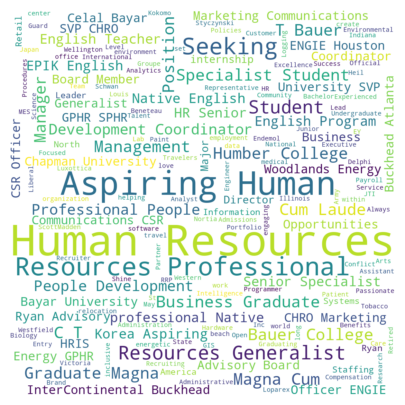

In [ ]:
wordcloud_job_titles = WordCloud(width=1200, height=1200, max_font_size=1000, background_color='white').generate(all_job_titles)  # Generate a word cloud from 'all_job_titles'
plt.figure(figsize=(10, 5))  # Set the figure size for the plot
plt.imshow(wordcloud_job_titles, interpolation='bilinear')  # Display the word cloud with bilinear interpolation
plt.axis('off')  # Remove the axes from the plot
plt.show()  # Show the plot

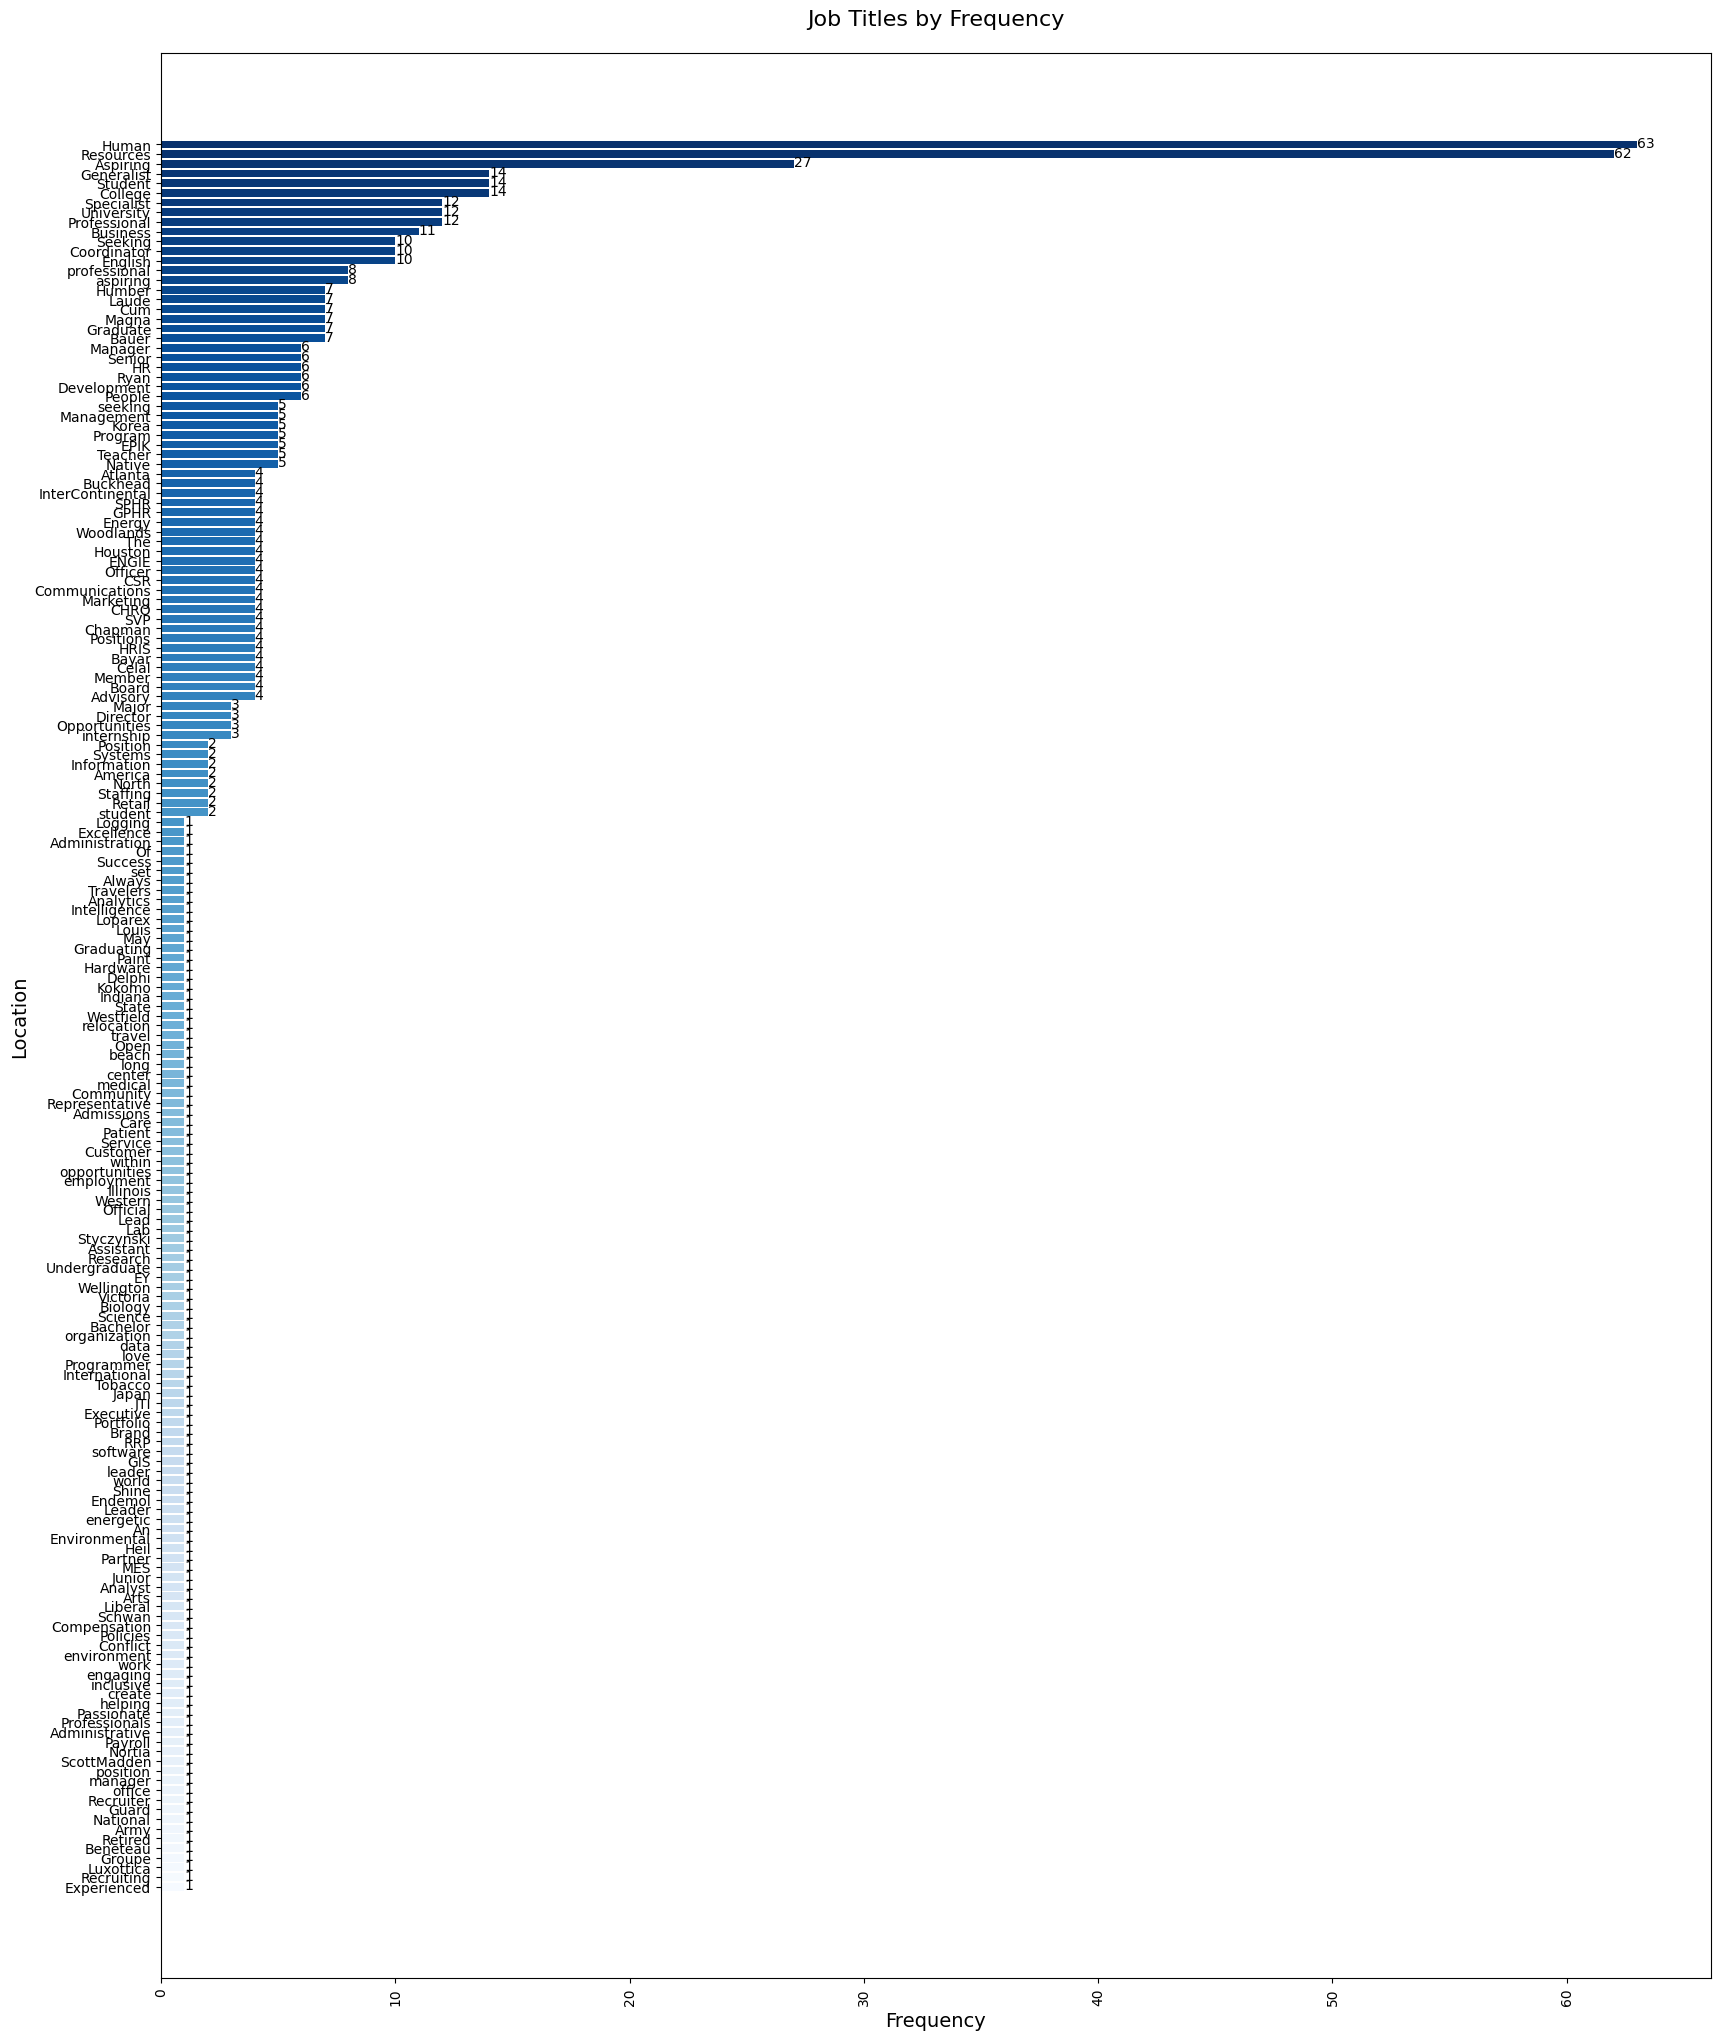

In [ ]:
job_list = [e.strip().strip('"') for e in all_job_titles.split(', ')]  # Clean and split the 'all_job_titles' string into a list of job titles
job_token = word_tokenize(all_job_titles)  # Tokenize the combined job titles into individual words
filtered_job_token = [word for word in job_token if word.isalpha() and word not in stop_words]  # Filter out stopwords and non-alphabetic tokens
job_freq = Counter(filtered_job_token)  # Count the frequency of each word
job_freq_sorted = dict(sorted(job_freq.items(), key=lambda x: x[1], reverse=False))  # Sort the word frequencies in ascending order

plt.figure(figsize=(20, 25))  # Set the figure size for the plot
colors = sns.color_palette('Blues', len(job_freq_sorted))  # Define a color palette for the bars
bars = plt.barh(list(job_freq_sorted.keys()), list(job_freq_sorted.values()), color=colors)  # Create a horizontal bar plot
for i, v in enumerate(list(job_freq_sorted.values())):  # Annotate each bar with its value
    plt.text(v + 0, i - 0.3, str(v), color='black')  # Add text labels to the bars
plt.title('Job Titles by Frequency', fontsize=16, pad=20)  # Add a title to the plot
plt.xlabel('Frequency', fontsize=14)  # Label the x-axis
plt.ylabel('Location', fontsize=14)  # Label the y-axis
plt.xticks(rotation=90)  # Rotate the x-axis labels for better readability
plt.show()  # Display the plot


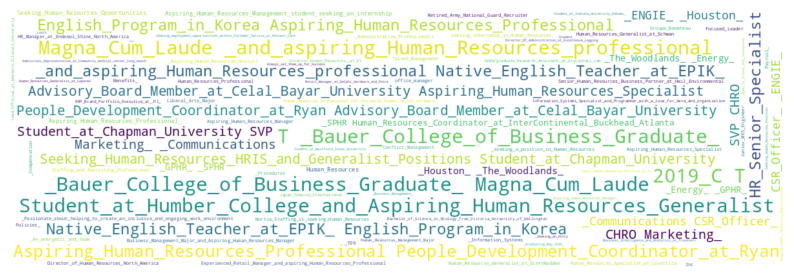

In [ ]:
processed_job_title = all_job_titles.split(', ')  # Split the combined job titles into a list of individual titles
processed_job_title = [loc.replace(" ", "_") for loc in processed_job_title]  # Replace spaces with underscores in each job title
processed_job_title_str = ' '.join(processed_job_title)  # Join the processed job titles into a single string separated by spaces
wordcloud_job_titles = WordCloud(width=1200, height=400, max_font_size=300, background_color='white').generate(processed_job_title_str)  # Generate a word cloud from the processed job titles
plt.figure(figsize=(10, 5))  # Set the figure size for the plot
plt.imshow(wordcloud_job_titles, interpolation='bilinear')  # Display the word cloud with bilinear interpolation
plt.axis('off')  # Remove the axes from the plot
plt.show()  # Show the plot

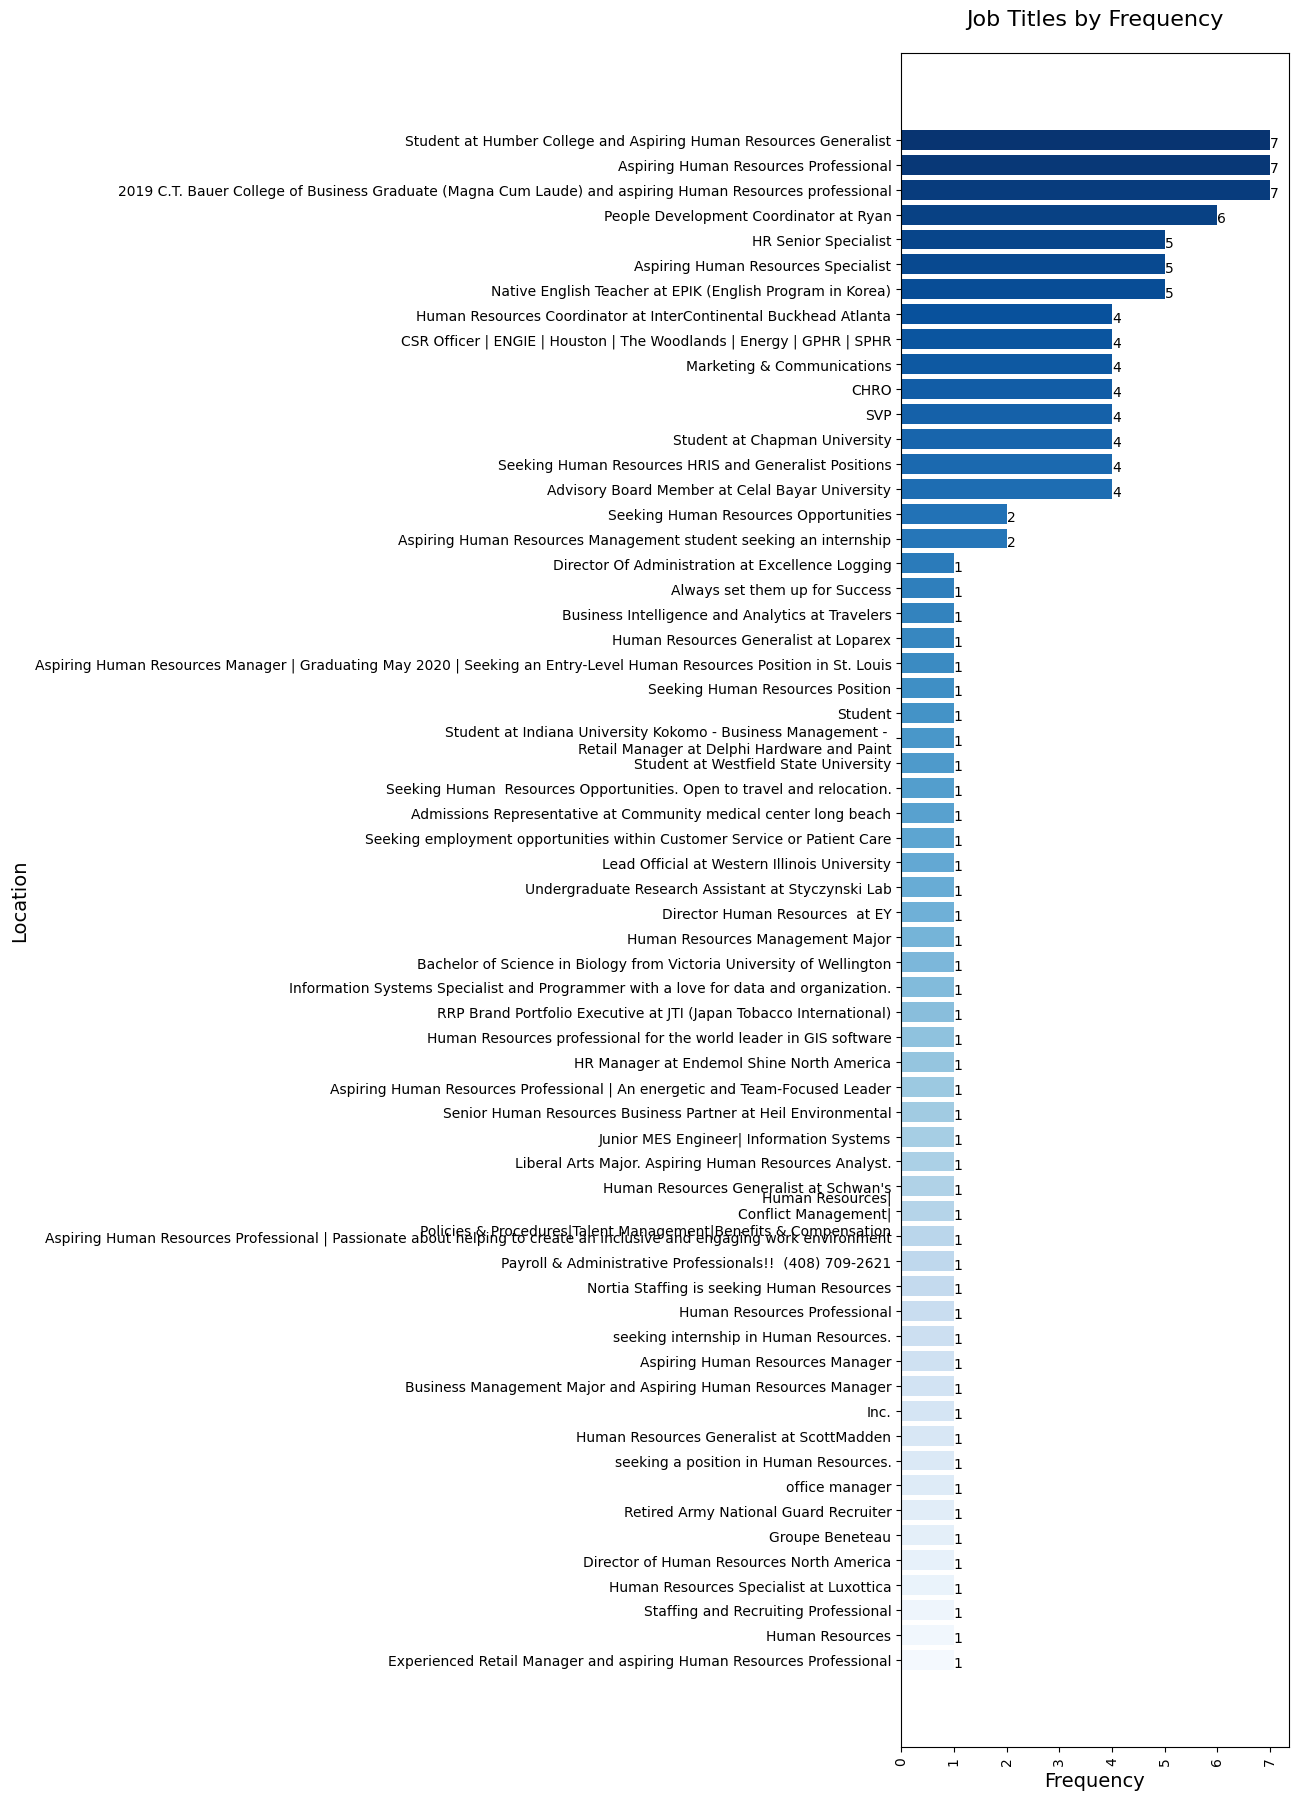

In [ ]:
job_list = [e.strip().strip('"') for e in all_job_titles.split(', ')]  # Clean and split the 'all_job_titles' string into a list of job titles
job_freq = Counter(job_list)  # Count the frequency of each job title
job_freq_sorted = dict(sorted(job_freq.items(), key=lambda x: x[1], reverse=False))  # Sort the job title frequencies in ascending order
plt.figure(figsize=(5, 22))  # Set the figure size for the plot
colors = sns.color_palette('Blues', len(job_freq_sorted))  # Define a color palette for the bars
bars = plt.barh(list(job_freq_sorted.keys()), list(job_freq_sorted.values()), color=colors)  # Create a horizontal bar plot
for i, v in enumerate(list(job_freq_sorted.values())):  # Annotate each bar with its value
    plt.text(v + 0, i - 0.3, str(v), color='black')  # Add text labels to the bars
plt.title('Job Titles by Frequency', fontsize=16, pad=20)  # Add a title to the plot
plt.xlabel('Frequency', fontsize=14)  # Label the x-axis
plt.ylabel('Location', fontsize=14)  # Label the y-axis
plt.xticks(rotation=90)  # Rotate the x-axis labels for better readability
plt.show()  # Display the plot

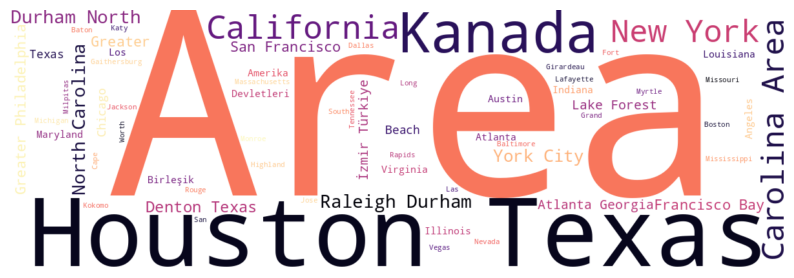

In [ ]:
wordcloud_locations = WordCloud(width=1200, height=400, max_font_size=400,  # Generate a word cloud with specified dimensions and font size
                                background_color='white', colormap='magma').generate(all_locations)  # Use the 'magma' colormap and the 'all_locations' string
plt.figure(figsize=(10, 5))  # Set the figure size for the plot
plt.imshow(wordcloud_locations, interpolation='bilinear')  # Display the word cloud with bilinear interpolation
plt.axis('off')  # Remove the axes from the plot
plt.show()  # Show the plot

In [ ]:
all_locations

'"Houston, Texas", "Kanada", "Raleigh-Durham, North Carolina Area", "Denton, Texas", "İzmir, Türkiye", "New York City Area", "Kanada", "San Francisco Bay Area", "Kanada", "Greater Philadelphia Area", "Lake Forest, California", "Houston, Texas Area", "Atlanta, Georgia", "Houston, Texas", "Houston, Texas", "Kanada", "Raleigh-Durham, North Carolina Area", "Denton, Texas", "Houston, Texas", "Kanada", "Raleigh-Durham, North Carolina Area", "Denton, Texas", "İzmir, Türkiye", "New York City Area", "Kanada", "San Francisco Bay Area", "Houston, Texas Area", "Chicago, Illinois", "Houston, Texas Area", "Chicago, Illinois", "Houston, Texas", "Kanada", "Raleigh-Durham, North Carolina Area", "Denton, Texas", "İzmir, Türkiye", "New York City Area", "Kanada", "San Francisco Bay Area", "Kanada", "Greater Philadelphia Area", "Lake Forest, California", "Houston, Texas Area", "Atlanta, Georgia", "Houston, Texas", "Kanada", "Raleigh-Durham, North Carolina Area", "Denton, Texas", "İzmir, Türkiye", "New York

In [ ]:
import re  # Import the regular expressions module for pattern matching and text substitution

def replace_inside_quotes(text):  # Define a function to process text and replace specific patterns inside quotation marks
    pattern = r'"([^"]*)"'  # Define a regex pattern to match content inside quotation marks

    def replace_in_match(match):  # Define a helper function to replace content inside matched quotation marks
        content = match.group(1)  # Extract the content inside the quotation marks
        replaced_content = content.replace(', ', '_').replace(' ', '_')  # Replace ", " and spaces with underscores
        return f'"{replaced_content}"'  # Return the updated content enclosed in quotation marks

    result = re.sub(pattern, replace_in_match, text)  # Apply the substitution to the input text
    return result  # Return the processed text


In [ ]:
location_list = replace_inside_quotes(all_locations)  # Apply the function to replace commas and spaces inside quotes in 'all_locations'
location_list  # Display the processed 'location_list' with replaced content

'"Houston_Texas", "Kanada", "Raleigh-Durham_North_Carolina_Area", "Denton_Texas", "İzmir_Türkiye", "New_York_City_Area", "Kanada", "San_Francisco_Bay_Area", "Kanada", "Greater_Philadelphia_Area", "Lake_Forest_California", "Houston_Texas_Area", "Atlanta_Georgia", "Houston_Texas", "Houston_Texas", "Kanada", "Raleigh-Durham_North_Carolina_Area", "Denton_Texas", "Houston_Texas", "Kanada", "Raleigh-Durham_North_Carolina_Area", "Denton_Texas", "İzmir_Türkiye", "New_York_City_Area", "Kanada", "San_Francisco_Bay_Area", "Houston_Texas_Area", "Chicago_Illinois", "Houston_Texas_Area", "Chicago_Illinois", "Houston_Texas", "Kanada", "Raleigh-Durham_North_Carolina_Area", "Denton_Texas", "İzmir_Türkiye", "New_York_City_Area", "Kanada", "San_Francisco_Bay_Area", "Kanada", "Greater_Philadelphia_Area", "Lake_Forest_California", "Houston_Texas_Area", "Atlanta_Georgia", "Houston_Texas", "Kanada", "Raleigh-Durham_North_Carolina_Area", "Denton_Texas", "İzmir_Türkiye", "New_York_City_Area", "Kanada", "San_Fr

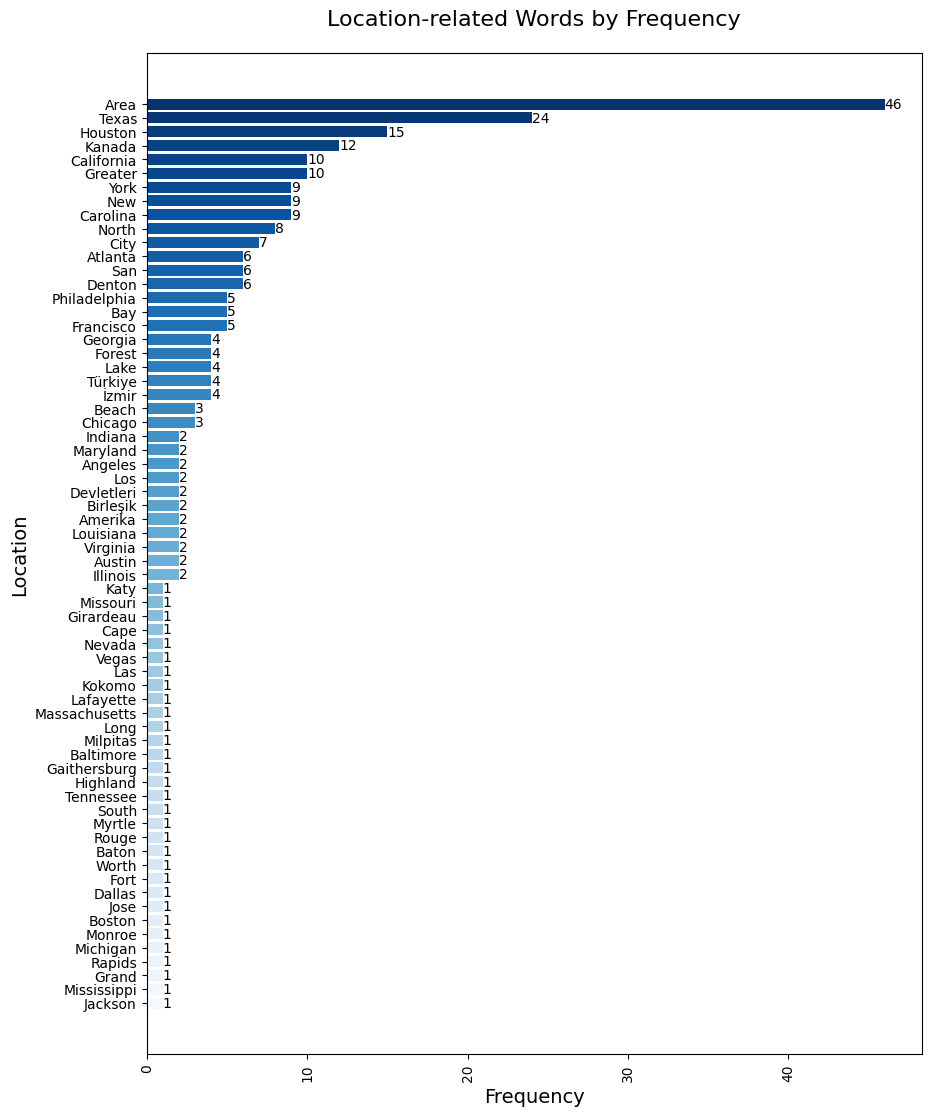

In [ ]:
location_token = word_tokenize(all_locations)  # Tokenize the 'all_locations' string into individual words
filtered_location_token = [word for word in location_token if word.isalpha() and word not in stop_words]  # Filter out non-alphabetic tokens and stopwords
location_freq = Counter(filtered_location_token)  # Count the frequency of each filtered word
location_freq_sorted = dict(sorted(location_freq.items(), key=lambda x: x[1], reverse=False))  # Sort the word frequencies in ascending order

plt.figure(figsize=(10, 13))  # Set the figure size for the plot
colors = sns.color_palette('Blues', len(location_freq_sorted))  # Define a color palette for the bars
bars = plt.barh(list(location_freq_sorted.keys()), list(location_freq_sorted.values()), color=colors)  # Create a horizontal bar plot
for i, v in enumerate(list(location_freq_sorted.values())):  # Annotate each bar with its value
    plt.text(v + 0, i - 0.3, str(v), color='black')  # Add text labels to the bars
plt.title('Location-related Words by Frequency', fontsize=16, pad=20)  # Add a title to the plot
plt.xlabel('Frequency', fontsize=14)  # Label the x-axis
plt.ylabel('Location', fontsize=14)  # Label the y-axis
plt.xticks(rotation=90)  # Rotate the x-axis labels for better readability
plt.show()  # Display the plot

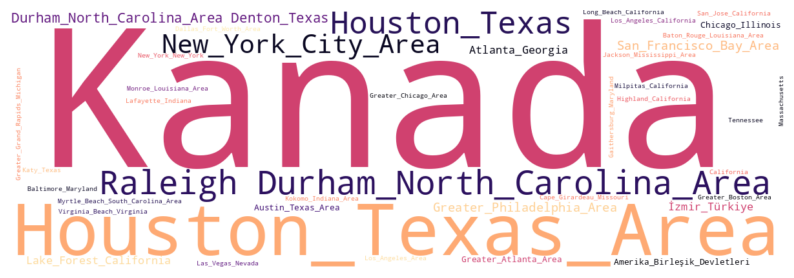

In [ ]:
# Create a WordCloud object with specified properties
wordcloud_locations = WordCloud(
    width=1200,              # Set the width of the word cloud image to 1200 pixels
    height=400,              # Set the height of the word cloud image to 400 pixels
    max_font_size=300,       # Set the maximum font size of words to 300 for better readability
    background_color='white', # Define the background color of the word cloud as white
    colormap='magma'         # Use the 'magma' color map for a warm-toned aesthetic
).generate(location_list)    # Generate the word cloud using the provided list of locations

# Create a figure for visualization
plt.figure(figsize=(10, 5))  # Set the figure size to 10 inches wide and 5 inches tall

# Render the word cloud image
plt.imshow(wordcloud_locations, interpolation='bilinear')  # Display the word cloud with smooth interpolation

# Remove axes for a cleaner visualization
plt.axis('off')             # Turn off the axis display for a minimalist look

# Show the word cloud plot
plt.show()                  # Render the plot on the screen

In [ ]:
locations_list2 = [e.strip().strip('"') for e in location_list.split(', ')]  # Split the `location_list` into individual location entries and clean them
# Use list comprehension to:
# 1. Split the `location_list` by commas and spaces into a list of locations.
# 2. Strip leading/trailing whitespace from each location.
# 3. Remove any double quotes from the location strings.
location_freq = Counter(locations_list2)  # Count the occurrences of each unique location

# Create a frequency dictionary where the keys are locations and the values are their counts.

location_freq_sorted = dict(sorted(location_freq.items(), key=lambda x: x[1], reverse=False))  # Sort the frequency dictionary by the counts in ascending order
# Convert the sorted items back into a dictionary.
# Use `sorted()` to sort the items by the frequency values (x[1]) in ascending order (reverse=False).


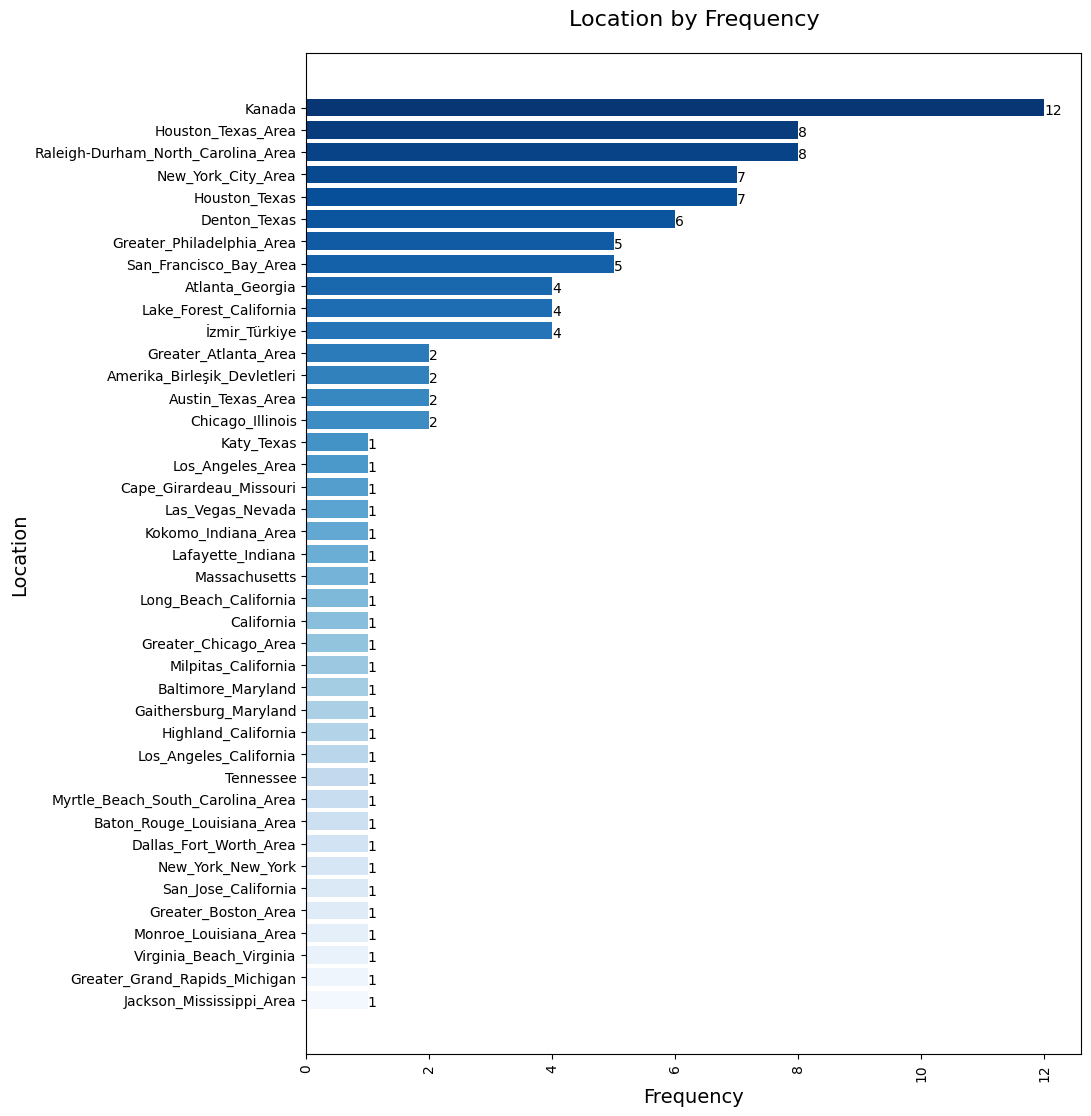

In [ ]:
plt.figure(figsize=(10, 13))  # Define the figure size; taller to better fit all bars vertically
colors = sns.color_palette('Blues', len(location_freq_sorted))  # Use a 'Blues' color palette, scaling it to match the number of bars
bars = plt.barh(list(location_freq_sorted.keys()), list(location_freq_sorted.values()), color=colors)  # Create a horizontal bar chart with the sorted location frequencies

for i, v in enumerate(list(location_freq_sorted.values())):  # Loop through each bar's index and value
    plt.text(v + 0, i - 0.3, str(v), color='black')  # Add labels for each bar to show the exact frequency values

plt.title('Location by Frequency', fontsize=16, pad=20)  # Set the chart title with a larger font size and some padding
plt.xlabel('Frequency', fontsize=14)  # Label the x-axis
plt.ylabel('Location', fontsize=14)  # Label the y-axis
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability if needed

plt.show()  # Display the final plot


In [ ]:
location_list

'"Houston_Texas", "Kanada", "Raleigh-Durham_North_Carolina_Area", "Denton_Texas", "İzmir_Türkiye", "New_York_City_Area", "Kanada", "San_Francisco_Bay_Area", "Kanada", "Greater_Philadelphia_Area", "Lake_Forest_California", "Houston_Texas_Area", "Atlanta_Georgia", "Houston_Texas", "Houston_Texas", "Kanada", "Raleigh-Durham_North_Carolina_Area", "Denton_Texas", "Houston_Texas", "Kanada", "Raleigh-Durham_North_Carolina_Area", "Denton_Texas", "İzmir_Türkiye", "New_York_City_Area", "Kanada", "San_Francisco_Bay_Area", "Houston_Texas_Area", "Chicago_Illinois", "Houston_Texas_Area", "Chicago_Illinois", "Houston_Texas", "Kanada", "Raleigh-Durham_North_Carolina_Area", "Denton_Texas", "İzmir_Türkiye", "New_York_City_Area", "Kanada", "San_Francisco_Bay_Area", "Kanada", "Greater_Philadelphia_Area", "Lake_Forest_California", "Houston_Texas_Area", "Atlanta_Georgia", "Houston_Texas", "Kanada", "Raleigh-Durham_North_Carolina_Area", "Denton_Texas", "İzmir_Türkiye", "New_York_City_Area", "Kanada", "San_Fr

In [ ]:
df.head()

id  \
0   1   
1   2   
2   3   
3   4   
4   5   

                                                                                                  job_title  \
0  2019 C.T. Bauer College of Business Graduate (Magna Cum Laude) and aspiring Human Resources professional   
1                                                 Native English Teacher at EPIK (English Program in Korea)   
2                                                                     Aspiring Human Resources Professional   
3                                                                    People Development Coordinator at Ryan   
4                                                           Advisory Board Member at Celal Bayar University   

                              location connection  fit  \
0                       Houston, Texas         85  NaN   
1                               Kanada      500+   NaN   
2  Raleigh-Durham, North Carolina Area         44  NaN   
3                        Denton, Texas      500+   NaN   
4                       İzmir, Türkiye      500+   NaN   

                       location_entities  \
0                       "Houston, Texas"   
1                               "Kanada"   
2  "Raleigh-Durham, North Carolina Area"   
3                        "Denton, Texas"   
4                       "İzmir, Türkiye"   

                                                                                           job_title_entities  
0  "2019 C.T. Bauer College of Business Graduate (Magna Cum Laude) and aspiring Human Resources professional"  
1                                                 "Native English Teacher at EPIK (English Program in Korea)"  
2                                                                     "Aspiring Human Resources Professional"  
3                                                                    "People Development Coordinator at Ryan"  
4                                                           "Advisory Board Member at Celal Bayar University"

## **Part 1: Ranking on similarity**

In [ ]:
search = input("Please enter the job search: ")  # Prompt the user to input the desired job search term
# The entered term will be stored in the `search` variable for further use

Please enter the job search: aspiring human resources specialist


### **TFIDFVectorizer**

In this section, we prepare and transform the job title data using the TF-IDF Vectorizer. TF-IDF (Term Frequency-Inverse Document Frequency) is a statistical measure that helps to identify the importance of a word within a collection of documents. Here, we use it to analyze job titles and create a feature representation that can be used for further analysis.

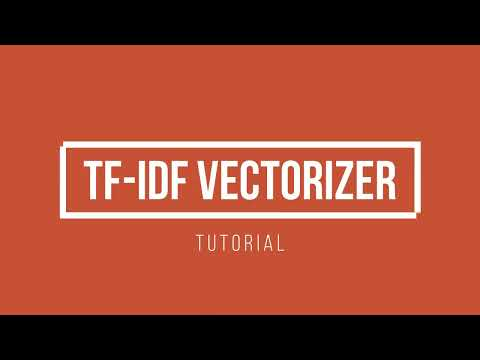

In [ ]:
video_id = "wdyAxGA66kY"
YouTubeVideo(video_id, width=800, height=450)  # Customize width and height as needed


The first step involves displaying the first few rows of the DataFrame to inspect the structure of the data. This provides a quick overview of the columns, data types, and sample values in the dataset.

In [ ]:
df.head()  # Display the first 5 rows of the DataFrame to quickly inspect the structure and content
# Useful for checking column names, data types, and the initial data entries in the dataset

id  \
0   1   
1   2   
2   3   
3   4   
4   5   

                                                                                                  job_title  \
0  2019 C.T. Bauer College of Business Graduate (Magna Cum Laude) and aspiring Human Resources professional   
1                                                 Native English Teacher at EPIK (English Program in Korea)   
2                                                                     Aspiring Human Resources Professional   
3                                                                    People Development Coordinator at Ryan   
4                                                           Advisory Board Member at Celal Bayar University   

                              location connection  fit  
0                       Houston, Texas         85  NaN  
1                               Kanada      500+   NaN  
2  Raleigh-Durham, North Carolina Area         44  NaN  
3                        Denton, Texas      500+   NaN  
4                       İzmir, Türkiye      500+   NaN

This helps ensure the dataset is loaded correctly and that the columns are as expected.

Next, we create a new row in the DataFrame, which will contain the job title provided by the user, as well as placeholder values for the other columns. This is important to integrate the new job title into the analysis, ensuring it matches the structure of the existing dataset.

In [ ]:
new_row = pd.DataFrame({'id': [0], 'job_title': [search], 'location': ['NA'], 'fit': [0]})  # Create a new DataFrame row with predefined values
# The `id` is set to 0, `job_title` uses the input stored in `search`, `location` is set to 'NA', and `fit` is initialized as 0

We then initialize the TF-IDF Vectorizer and fit it to the 'job_title' column of the DataFrame. This step analyzes the job titles, learns the vocabulary, and calculates the TF-IDF scores for each term. The transformation produces a sparse matrix where each row corresponds to a job title, and each column represents a unique token (word) in the vocabulary.

In [ ]:
vectorizer = TfidfVectorizer()  # Initialize a TF-IDF Vectorizer object for text data processing
X = vectorizer.fit_transform(df['job_title'])  # Fit the vectorizer to the job titles in the DataFrame and transform them into TF-IDF vectors


Subsequently, we transform the new job title (from the new_row DataFrame) using the same vectorizer to ensure it aligns with the feature space of the original dataset.

In [ ]:
# Vocabulary learning: extracts unique tokens from `df['job_title']` and computes their TF-IDF scores
Y = vectorizer.transform(new_row['job_title'])  # Transform the new row's job title using the learned vocabulary from `fit_transform`


We retrieve the feature names (tokens) learned by the vectorizer to get an understanding of the vocabulary it has created. This is helpful for checking which words are represented in the resulting TF-IDF matrix.

In [ ]:
# Ensures the new input aligns with the feature space of the original data
vectorizer.get_feature_names_out()  # Get the list of unique tokens (features) learned by the vectorizer

array(['2019', '2020', '2621', '408', '709', 'about', 'administration',
       'administrative', 'admissions', 'advisory', 'always', 'america',
       'an', 'analyst', 'analytics', 'and', 'army', 'arts', 'aspiring',
       'assistant', 'at', 'atlanta', 'bachelor', 'bauer', 'bayar',
       'beach', 'benefits', 'beneteau', 'biology', 'board', 'brand',
       'buckhead', 'business', 'care', 'celal', 'center', 'chapman',
       'chro', 'college', 'communications', 'community', 'compensation',
       'conflict', 'coordinator', 'create', 'csr', 'cum', 'customer',
       'data', 'delphi', 'development', 'director', 'employment',
       'endemol', 'energetic', 'energy', 'engaging', 'engie', 'engineer',
       'english', 'entry', 'environment', 'environmental', 'epik',
       'excellence', 'executive', 'experienced', 'ey', 'focused', 'for',
       'from', 'generalist', 'gis', 'gphr', 'graduate', 'graduating',
       'groupe', 'guard', 'hardware', 'heil', 'helping', 'houston', 'hr',
       'hris

Finally, we print the shape of both matrices X and Y to verify their dimensions. X represents the original job titles, while Y corresponds to the transformed new job title. This helps confirm that both matrices have been correctly processed and match the expected structure.

In [ ]:
# Each token corresponds to a column in the resulting TF-IDF matrix
print(X.shape)  # Print the dimensions of the TF-IDF matrix `X`
# Useful to understand the size of the dataset in terms of rows (samples) and columns (features)
print(Y.shape)  # Print the dimensions of the transformed TF-IDF vector for the new input `Y`
# Ensures the new job title fits within the existing feature space

(104, 200)
(1, 200)


#### **Cosine Similarity**

Cosine similarity is used to measure the similarity between the new job title and the existing job titles in the dataset. This method computes the cosine of the angle between two vectors: the closer the angle is to 0 degrees, the more similar the two vectors are.

First, we calculate the cosine similarity matrix between the new job title (Y) and the original dataset (X). The resulting matrix provides a measure of similarity for each job title in the dataset, relative to the new input.

In [ ]:
# Compute and print the Cosine Similarity Matrix
cosine_sim = cosine_similarity(Y, X)

We print the cosine similarity matrix to visualize the similarity scores. Each entry represents the similarity between the new job title and one of the original job titles in the dataset.

In [ ]:
#np.set_printoptions(threshold = np.inf)
print(cosine_sim)

[[0.1845721  0.         0.52425722 0.         0.         1.
  0.2786953  0.36459819 0.2786953  0.14026805 0.         0.
  0.13180365 0.1845721  0.1845721  0.         0.52425722 0.
  0.1845721  0.         0.52425722 0.         0.         1.
  0.2786953  0.36459819 0.24511492 0.20022781 0.24511492 0.20022781
  0.1845721  0.         0.52425722 0.         0.         1.
  0.2786953  0.36459819 0.2786953  0.14026805 0.         0.
  0.13180365 0.1845721  0.         0.52425722 0.         0.
  1.         0.2786953  0.36459819 0.2786953  0.14026805 0.
  0.         0.13180365 0.1845721  0.52425722 0.         1.
  0.36459819 0.14026805 0.         0.         0.13180365 0.23372129
  0.13745235 0.50881925 0.09729005 0.0762467  0.1335708  0.2503166
  0.3709093  0.32012257 0.071401   0.13066037 0.07530227 0.16875084
  0.20708918 0.         0.10550263 0.1820755  0.         0.08859228
  0.         0.15173459 0.         0.17915904 0.1520981  0.
  0.         0.         0.         0.09535403 0.         0.
 

We also check the dimensions of the cosine similarity matrix to ensure that it has the expected shape. The number of rows corresponds to the new job title, and the number of columns corresponds to the existing job titles.

In [ ]:
cosine_sim.shape  # Check the dimensions of the cosine similarity matrix
# Useful for verifying that the similarity matrix has the correct shape:
# Rows correspond to the new input (Y), and columns correspond to the dataset (X)

(1, 104)

#### **Recommendation Function**

In this section, we define a function that will use the cosine similarity matrix to recommend the most similar job titles based on the user's search query.

The function begins by creating a mapping of job titles to their indices in the original dataset. This is crucial for ensuring that, when we identify the most similar job titles, we can retrieve the correct job information from the DataFrame.

In [ ]:
indices = pd.Series(df.index, index=df['job_title']).drop_duplicates()  # Create a mapping of job titles to their indices in the DataFrame
# This ensures that duplicate job titles are handled by keeping the first occurrence only

We define the get_recommendations function, which takes the search query, cosine similarity matrix, and job title index mapping as inputs. The function sorts the similarity scores in descending order and selects the top 10 most similar job titles, excluding the input job title itself.

The function then extracts the indices and similarity scores for the top 10 most similar job titles, and uses these indices to retrieve the relevant job information from the DataFrame. The resulting DataFrame contains the job title, location, connection, and fit for each of the recommended jobs, along with their respective similarity scores.

Finally, the function returns the DataFrame containing the top job recommendations, which can be used for further display or analysis.

In [ ]:
def get_recommendations(title, cosine_sim, indices):  # Define a function to generate job recommendations based on cosine similarity
    sim_scores = sorted(enumerate(cosine_sim), key=lambda x: x[1], reverse=True)  # Sort similarity scores in descending order
    # Enumerate adds indices to the similarity scores, allowing us to keep track of the original positions

    sim_scores = sim_scores[1:11]  # Get the top 10 most similar job titles, excluding the first (the job itself)
    job_indices = [i[0] for i in sim_scores]  # Extract the indices of the top 10 most similar jobs
    similarity_scores = [i[1] for i in sim_scores]  # Extract the similarity scores for the top jobs

    similar_jobs = df[['job_title', 'location', 'connection', 'fit']].iloc[job_indices]  # Fetch the corresponding job details from the DataFrame
    similar_jobs['similarity_score'] = similarity_scores  # Add the similarity scores as a new column
    return similar_jobs  # Return the DataFrame containing the top recommendations

#### **Generate recommendations**

Finally, we generate the job recommendations by calling the get_recommendations function with the user’s search input. We display the search query for context and use the cosine similarity matrix and job title indices to retrieve the recommended jobs. The resulting recommendations include the job titles, their locations, and the calculated similarity scores, providing the user with the most relevant job suggestions.

In [ ]:
print(f"Search: {search}")  # Display the user's search query for context
pd.DataFrame(get_recommendations(search, cosine_sim.T, indices))
# Include cosine score, include the rest of features.

Search: aspiring human resources specialist


job_title  \
23    Aspiring Human Resources Specialist   
35    Aspiring Human Resources Specialist   
48    Aspiring Human Resources Specialist   
59    Aspiring Human Resources Specialist   
2   Aspiring Human Resources Professional   
16  Aspiring Human Resources Professional   
20  Aspiring Human Resources Professional   
32  Aspiring Human Resources Professional   
45  Aspiring Human Resources Professional   
57  Aspiring Human Resources Professional   

                               location connection  fit      similarity_score  
23           Greater New York City Area          1  NaN                 [1.0]  
35           Greater New York City Area          1  NaN                 [1.0]  
48           Greater New York City Area          1  NaN                 [1.0]  
59           Greater New York City Area          1  NaN                 [1.0]  
2   Raleigh-Durham, North Carolina Area         44  NaN  [0.5242572235446596]  
16  Raleigh-Durham, North Carolina Area         44  NaN  [0.5242572235446596]  
20  Raleigh-Durham, North Carolina Area         44  NaN  [0.5242572235446596]  
32  Raleigh-Durham, North Carolina Area         44  NaN  [0.5242572235446596]  
45  Raleigh-Durham, North Carolina Area         44  NaN  [0.5242572235446596]  
57  Raleigh-Durham, North Carolina Area         44  NaN  [0.5242572235446596]

This final output provides a tailored list of job recommendations based on the similarity of the job title entered by the user to those already in the dataset.

### **Word2Vec**

In this script, we aim to train a Word2Vec model on a dataset of job titles and use the learned embeddings to recommend job titles based on a search query. The process involves tokenizing job titles, training the model, calculating embeddings for each job title, and using cosine similarity to identify the most similar titles.

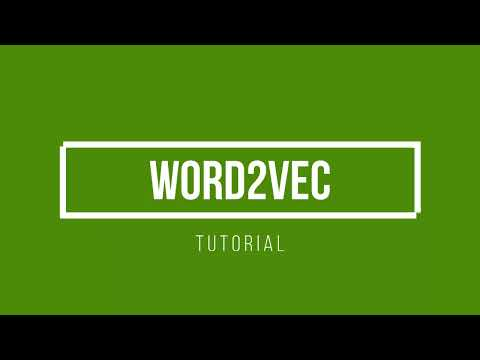

In [ ]:
video_id = "7McpGFap7uk"
YouTubeVideo(video_id, width=800, height=450)  # Customize width and height as needed

#### **Tokenizing Job Titles**

The first step in preparing the dataset for Word2Vec is to tokenize the job titles. Tokenization breaks each job title into individual words, which are essential for training the Word2Vec model. The *.apply(lambda x: x.split())* method is used to split each job title string into a list of words.

In [ ]:
# Tokenizing the job titles by splitting them into individual words
df['job_title_tokens'] = df['job_title'].apply(lambda x: x.split())  # Break job titles into word tokens

This operation adds a new column, job_title_tokens, to the DataFrame. Each entry in this column contains a list of words that make up the corresponding job title.

#### **Training the Word2Vec Model**

With the tokenized job titles prepared, we train a Word2Vec model. The sentences parameter specifies the tokenized job titles, while the vector_size determines the dimensions of the resulting embeddings. Other parameters include:

* window: the context window size for words.
* min_count: the minimum frequency for a word to be included in the vocabulary.
* workers: the number of CPU threads for parallel processing.

In [ ]:
# Training a Word2Vec model using the tokenized job titles
model = Word2Vec(
    sentences=df['job_title_tokens'],  # Provide tokenized job titles as input sentences
    vector_size=100,  # Set the dimensionality of the word vectors
    window=5,  # Specify the window size for context words
    min_count=1,  # Include words that appear at least once
    workers=4  # Use 4 threads for parallel processing
)

# Word2Vec is typically trained on millions of records for better quality embeddings...
# It is recommended to use pre-trained Word2Vec embeddings for better results in most applications.


This will generate a Word2Vec model where each word in the vocabulary is represented by a 100-dimensional vector. The model captures semantic and contextual relationships between words based on their co-occurrence in job titles.

#### **Calculating average Embeddings for Job Titles**

Next, we calculate the average embedding for each job title. This is done by averaging the embeddings of the words that make up the job title. The function filters out words not found in the Word2Vec model vocabulary and calculates the mean of the valid word vectors.

In [ ]:
# Function to calculate the average of the embeddings for each word in a job title
def get_average_embedding(job_title_tokens):
    embeddings = [model.wv[word] for word in job_title_tokens if word in model.wv]  # Get embeddings for words found in the model
    if len(embeddings) > 0:  # Check if there are any valid embeddings
        return sum(embeddings) / len(embeddings)  # Return the average embedding
    else:
        return None  # Return None if no embeddings are found

Applying this function to the job_title_tokens column computes an average vector for each job title.

A new column, *job_title_embedding*, is added to the DataFrame. Each entry contains a vector representing the average embedding of the job title. Job titles with no valid embeddings (e.g., words not in the vocabulary) will have *None* as their value.

In [ ]:
# Apply the function to the tokenized job titles to compute the average embedding vectors
df['job_title_embedding'] = df['job_title_tokens'].apply(get_average_embedding)  # Calculate embeddings for each job title


#### **Inspecting Job Titles and Embeddings**

To verify the embedding calculation, we can inspect a few rows of the DataFrame, including the original job titles and their corresponding embeddings.

In [ ]:
# Display the job titles alongside their corresponding average embedding vectors
df[['job_title', 'job_title_embedding']].head()  # Show the first few rows with job titles and embeddings

job_title  \
0  2019 C.T. Bauer College of Business Graduate (Magna Cum Laude) and aspiring Human Resources professional   
1                                                 Native English Teacher at EPIK (English Program in Korea)   
2                                                                     Aspiring Human Resources Professional   
3                                                                    People Development Coordinator at Ryan   
4                                                           Advisory Board Member at Celal Bayar University   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                     job_title_embedding  
0           [-0.0020150642, 0.0029246542, 0.0018518363, 0.0012745626, 0.001166505, -0.0025500671, 0.0018834831, 0.0032682023, -0.0015004247, -0.0021891247, -0.0009337713, -0.0013875031, 0.00081174605, 0.0011701606, 0.0013427892, -6.830607e-05, 0.003983243, 0.00020978438, -0.00081891316, -0.0025364268, 0.0015434677, 0.0005346687, 0.001375973, -0.00048228668, -0.00036535726, 0.0014372723, -0.0048999833, 0.00059845264, 0.00094155513, 0.00094092713, 0.0036498338, -4.084798e-05, -0.0009512854, -0.002859815, 0.00067370204, 0.00013154087, 0.0013606083, 0.0004402449, 0.0011372794, -0.0010156229, 0.0004629993, -0.0014603193, 0.00080287893, -0.0015237613, -0.001434698, -0.0033148413, -0.00034361324, -0.0012209887, 0.0013071133, 0.00022930795, 0.002734559, -0.0005373124, -0.0018179476, -0.0006998113, 0.0012867355, 0.0019393496, 0.0024081895, 0.0014520567, 0.0001200238, 0.0014358492, -0.002205034, -0.00010012127, 0.0016241121, 0.0021017978, -1.4326566e-05, 0.0020965794, 0.0025512306, 0.00064114085, -0.0021138494, 0.0016909355, -0.00021247026, -0.0011949749, 0.0008688716, -0.00034894483, 0.0017212984, -0.0017437419, -0.00082190044, 0.0018016935, -0.0011962525, 0.0004774489, -0.0030863085, 0.0018630695, 0.0027438444, 0.0034565479, 0.0007183106, 0.00024091196, 0.0029240325, 0.0019463708, 0.00056121516, 0.000576216, 0.0032354584, -0.0018758933, 0.0019229209, -0.0029423859, 0.00236577, 3.7354308e-05, 0.0027238494, 0.0004779917, -0.00058170897, 0.0016807147]  
1  [-0.0005830062, 0.00074866635, -0.004661155, -0.0048170676, 0.001894846, -0.002002135, -0.0013288801, 0.0007323656, 0.0020252762, -0.0018649078, 0.0014527389, -0.0017162937, -0.0023163427, 0.0014305887, -0.00028227214, -0.003943639, 0.0010558334, 0.0002709383, 0.00023258834, 0.0023503741, 0.0018204018, 0.00021790294, 0.00073425885, -0.0017208661, 0.0025203903, -0.00097124814, 0.0047568507, -0.0021632304, -0.0002769205, -0.00031211707, 0.0009106197, -0.0021962884, -0.00022135758, -0.0029022

#### **Calculating Embeddings for Search Queries**

To enable job recommendations based on a search query, we need a function to compute the embedding for the query. This function splits the query into words, retrieves their embeddings from the Word2Vec model, and calculates the mean embedding.

The function returns a vector representing the search query. If none of the words in the query are in the vocabulary, the function returns None.

In [ ]:
# Function to calculate the average embedding vector for a search query
def get_search_embedding(search_text, model):
    search_tokens = search_text.split()  # Tokenize the search query into individual words
    search_embeddings = [model.wv[word] for word in search_tokens if word in model.wv]  # Get embeddings for valid words in the model
    if len(search_embeddings) > 0:  # Check if there are any embeddings for the query words
        return np.mean(search_embeddings, axis=0)  # Return the mean vector of the embeddings
    else:
        return None  # Return None if no embeddings are found for the query


#### **Generating Job Recommendations**

With embeddings for both job titles and the search query, we use cosine similarity to rank job titles based on their similarity to the query. This function identifies the top n most similar job titles and compiles their details into a DataFrame.
The function outputs a DataFrame containing the most similar job titles, their locations, connections, and similarity scores. These recommendations are ranked in descending order of similarity.

In [ ]:
# Function to get job recommendations based on a search query
def get_recommendations(search_text, model, job_title_embeddings, job_titles, top_n=10):  # Define the number of top recommendations
    search_embedding = get_search_embedding(search_text, model)  # Get the embedding for the search query
    # Check why exact matches are not appearing
    if search_embedding is None:  # If no embedding can be created for the search query
        return ["Not enough data"]  # Return a message indicating insufficient data

    similarities = cosine_similarity([search_embedding], job_title_embeddings)[0]  # Calculate cosine similarities
    # Rank candidates by similarity
    sim_scores = list(enumerate(similarities))  # Pair index with similarity score
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)  # Sort scores in descending order
    top_indices = [i[0] for i in sim_scores[:top_n]]  # Extract indices of the top matches
    top_sim_scores = [i[1] for i in sim_scores[:top_n]]  # Extract similarity scores for the top matches

    # Get details for the recommended job titles
    recommended_titles = [job_titles[i] for i in top_indices]  # Fetch recommended job titles
    recommended_locations = df['location'].iloc[top_indices].tolist()  # Fetch recommended locations
    recommended_connections = df['connection'].iloc[top_indices].tolist()  # Fetch recommended connections
    recommended_fit = df['fit'].iloc[top_indices].tolist()  # Fetch fit scores (if available)

    # Create a DataFrame for recommendations
    recommendations_df = pd.DataFrame({
        "job_title": recommended_titles,  # Recommended job titles
        "location": recommended_locations,  # Corresponding locations
        "connection": recommended_connections,  # Corresponding connection scores
        "similarity_score": top_sim_scores,  # Corresponding similarity scores
    })
    return recommendations_df  # Return the DataFrame with recommendations

#### **Preparing Data for Recommendations**

Before generating recommendations, prepare the data by extracting job title embeddings and titles into separate lists.

The lists job_title_embeddings and job_titles contain all job title embeddings and their corresponding titles, respectively, in the same order as in the DataFrame.

In [ ]:
# Prepare job title embeddings and titles for recommendations
job_title_embeddings = df['job_title_embedding'].tolist()  # Convert job title embeddings to a list
job_titles = df['job_title'].tolist()  # Convert job titles to a list

#### **Fetching Recommendations**

Finally, generate recommendations for a specific search query using the function defined earlier.

The script outputs a DataFrame with the top recommended job titles, their similarity scores, and additional details such as location and connections. If the query cannot be processed (e.g., all words are out of vocabulary), it will return an appropriate message.

In [ ]:
# Get recommendations based on a search query
recommendations = get_recommendations(search, model, job_title_embeddings, job_titles)  # Fetch recommendations
print(f"Search: {search}")  # Print the search query
recommendations  # Display the recommendations

Search: aspiring human resources specialist


job_title  \
0                                      Experienced Retail Manager and aspiring Human Resources Professional   
1  2019 C.T. Bauer College of Business Graduate (Magna Cum Laude) and aspiring Human Resources professional   
2  2019 C.T. Bauer College of Business Graduate (Magna Cum Laude) and aspiring Human Resources professional   
3  2019 C.T. Bauer College of Business Graduate (Magna Cum Laude) and aspiring Human Resources professional   
4  2019 C.T. Bauer College of Business Graduate (Magna Cum Laude) and aspiring Human Resources professional   
5  2019 C.T. Bauer College of Business Graduate (Magna Cum Laude) and aspiring Human Resources professional   
6  2019 C.T. Bauer College of Business Graduate (Magna Cum Laude) and aspiring Human Resources professional   
7  2019 C.T. Bauer College of Business Graduate (Magna Cum Laude) and aspiring Human Resources professional   
8                                     Bachelor of Science in Biology from Victoria University of Wellington   
9            Retired Army National Guard Recruiter, office manager,  seeking a position in Human Resources.   

                   location connection  similarity_score  
0        Austin, Texas Area         57          0.377103  
1            Houston, Texas         85          0.357871  
2            Houston, Texas         85          0.357871  
3            Houston, Texas         85          0.357871  
4            Houston, Texas         85          0.357871  
5            Houston, Texas         85          0.357871  
6            Houston, Texas         85          0.357871  
7            Houston, Texas         85          0.357871  
8       Baltimore, Maryland         40          0.275460  
9  Virginia Beach, Virginia         82          0.250348

This code demonstrates how to use Word2Vec to train a custom embedding model for job titles and generate job recommendations based on semantic similarity. While the model trained here is small and specific to the dataset, pre-trained Word2Vec embeddings can significantly improve the quality of the results for larger and more diverse datasets.

### **GloVe**

We will use GloVe (Global Vectors for Word Representation) to analyze and compare job titles by converting them into numerical embeddings. GloVe is a pre-trained model designed to capture the semantic meaning of words, making it an excellent choice for applications where understanding the context of words is essential. We will break down the process step by step, including how to load GloVe embeddings, create average vectors for job titles, and find similar titles using cosine similarity.

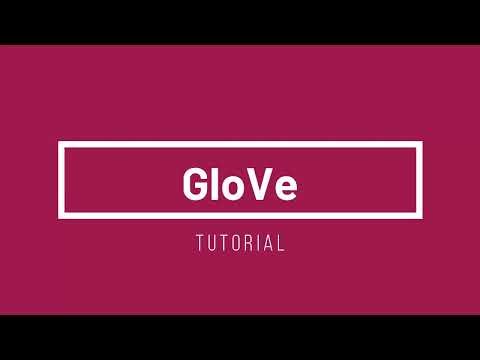

In [ ]:
video_id = "GyZgPnGpsXw"
YouTubeVideo(video_id, width=800, height=450)  # Customize width and height as needed

#### **Loading GloVe Embeddings**

The first step is to load the GloVe pre-trained word embeddings. These embeddings are stored in a text file, where each line contains a word and its corresponding vector. The code reads this file, splits each line into a word and its vector, and stores them in a dictionary for easy access.

You will load thousands of pre-trained word vectors into embeddings_index. These vectors represent semantic relationships between words and will be used to compute job title embeddings.

In [ ]:
# Route of GloVe file (I will use 100D for vectors)
glove_file = 'glove.6B.100d.txt'   # Include source of trainin  g

# Create a dictionary to store the vectors.
embeddings_index = {}

# Read the GloVe file and load the vectors.
with open(glove_file, 'r', encoding = 'utf-8') as f:
  for line in f:
    values = line.split()
    word = values[0]
    vector = np.asarray(values[1:], dtype = 'float32')
    embeddings_index[word] = vector

print(f'Number of loaded words: {len(embeddings_index)}')

Number of loaded words: 400000


#### **Preprocessing Job Titles**

To ensure consistency in matching words to GloVe vectors, all job titles are converted to lowercase. This avoids issues where "Consultant" and "consultant" are treated differently.

This step normalizes the job_title column, making it easier to map words to their embeddings in GloVe.

In [ ]:
# Let's ensure every word is lowercase.
df_glove = df.copy()
df_glove['job_title'] = df_glove['job_title'].str.lower()

#### **Calculating Average Vectors for Job Titles**

Here, we define a function to compute the average embedding for each job title. The function tokenizes the job title into words, retrieves the vector for each word from the GloVe dictionary, and calculates their mean. If no words in the title have corresponding vectors, the function returns a zero vector.

##### **Handling Out-of-Vocabulary (OOV) Words**


OOV words are terms not found in the GloVe vocabulary. This issue often arises with domain-specific jargon or rare terms. The function gracefully handles such cases by returning a zero vector. Future improvements could involve using pre-trained embeddings like FastText, which handle OOV words better.

In [ ]:
def get_average_vector(title, embeddings_index):
  words = word_tokenize(title)
  word_vectors = [embeddings_index[word] for word in words if word in embeddings_index]
  if len(word_vectors) > 0:
    # Calculate mean of vectors in job_title
    return np.mean(word_vectors, axis = 0)
  else:
    # If there are no words with available vectors in GloVe, return zero vector
    return np.zeros(100) # calculate the mean of entire embeddings (vocabulary) , as an option to zero vector. It can also be done for word2vec for OOVs

The function is applied to all job titles to generate average embeddings.

A new column, job_title_vector, is added to the DataFrame. Each entry contains a numerical vector representing the job title. Titles without known words will have a vector of zeros.

In [ ]:
# Apply function to column 'job_title' and create a new column with the vectors.
df_glove['job_title_vector'] = df_glove['job_title'].apply(lambda x: get_average_vector(x, embeddings_index))
df_glove[['job_title', 'job_title_vector']].head()
# OOV out of vocabulary  it's a problem in NLP
# that is why fasttext was purposed

job_title  \
0  2019 c.t. bauer college of business graduate (magna cum laude) and aspiring human resources professional   
1                                                 native english teacher at epik (english program in korea)   
2                                                                     aspiring human resources professional   
3                                                                    people development coordinator at ryan   
4                                                           advisory board member at celal bayar university   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                         job_title_vector  
0  [0.27729377, 0.21446079, 0.16229536, -0.1714263, 0.003739422, -0.013915709, 0.11538423, 0.050441056, -0.15080927, 0.26863202, 0.18707734, -0.3382899, 0.28778604, 0.5437556, -0.0342778, -0.3348687, 0.62508166, 0.18653604, -0.20962453, 0.32785034, -0.28404826, 0.148303, 0.2260247, 0.10740601, 0.28088164, -0.027263647, 0.060717598, -0.4765606, 0.028548641, -0.16904545, -0.49945903, 0.63391817, -0.30673146, -0.042749874, -0.18927352, 0.07958727, 0.05001852, 0.39140913, -0.24861743, 0.10940653, -0.36240086, -0.1383674, -0.31648445, -0.22547795, -0.09677465, -0.10189588, 0.079272404, -0.124823414, -0.07334188, -0.0152880475, -0.13282679, -0.2038741, 0.034009594, 0.4570718, -0.14119273, -1.5915765, 0.05926194, -0.3966028, 1.038907, 0.26310053, -0.03657676, 0.34042242, -0.3280352, 0.0055434713, 0.46845746, -0.06196013, 0.32240734, 0.21284129, 0.6979823, 0.28335392, 0.049480587, -0.011398317, -0.11263572, -0.045262765, -0.24474873, 0.0021973297, -0.07781417, -0.052996416, -0.6812325, -0.4489409, 0.31311372, 0.037285995, -0.14309414, -0.04353969, -0.70072705, 0.090568766, -0.0715136, -0.28985384, 0.19141611, -0.58959115, -0.06771741, -0.14620507, -0.01291335, 0.30953714, -0.4165406, 0.22822778, -0.10523601, -0.21561325, 0.48384985, -0.08736164]  
1            [0.16605064, 0.35794464, 0.35130736, -0.05092509, -0.15357454, 0.18548092, 0.07927529, 0.15357456, -0.27160138, 0.28993183, 0.1300469, -0.32857463, 0.11563108, 0.5263018, 0.042751003, -0.16589244, 0.47296342, -0.32520762, -0.4012473, 0.28846624, 0.10408818, 0.006137732, 0.49846822, 0.20929092, 0.22213455, -0.21763755, -0.15236956, -0.40847108, 0.0016578193, 0.20900598, -0.7833264, 0.66018546, -0.002669547, -0.101917356, 0.11273956, 0.033098508, -0.062293638, 0.32366544, -0.14731818, -0.08305181, -0.60399246, -0.2231481, -0.36174464, -0.076439634, 0.33531472, -0.27088872, 0.14379817, -0.23724328, 0.005606909, -0.42189637, -0.046385452, -0.08650524, 0.3558537, 0.57743454, -0.2738259, -2.0688384, -0.3187455, -0.4490731, 1.1434709, 0.28764564, 0.10436881, 0.43120995, -0.2999829, -0.17391182, 0.3916088, -0.13893081, 0.122390695, 0.2138669, 0.4809741, 0.25875527, -0.16489235, 0.17279907, -0.

#### **Embedding the Search Query**

To compare the search query with job titles, we define a function that calculates its embedding. The function tokenizes the query, retrieves vectors for each word, and calculates their mean. Queries with no known words return None.

The search query is converted into a numerical vector, enabling comparison with job title vectors.



In [ ]:
def get_search_embedding(search_text, embeddings_index):
  search_tokens = search_text.split()
  #print("Search tokens: " , search_tokens)
  search_embeddings = [embeddings_index[word] for word in search_tokens if word in embeddings_index]
  #print("Search embeddings: ", search_embeddings)
  if len(search_embeddings) > 0:
    return np.mean(search_embeddings, axis = 0)
  else:
    return None

#### **Finding Similar Job Titles**

The next step is to compute the similarity between the search query and job titles using cosine similarity. The function ranks job titles based on their similarity to the query and returns the top matches.
The function returns a DataFrame with the most similar job titles, their locations, connections, and similarity scores.

In [ ]:
def get_recommendations(search_text, embeddings_index, job_title_embeddings, job_titles, df, top_n = 10):
  search_embedding = get_search_embedding(search_text, embeddings_index)

  if search_embedding is None:
    return ["Not enough data"]

  # Calculate cosine similarity between search embedding and job_titles embeddings
  similarities_glove = cosine_similarity([search_embedding], job_title_embeddings)[0]

  # Enumerate and sort by similarity
  sim_scores_glove = list(enumerate(similarities_glove))
  sim_scores_glove = sorted(sim_scores_glove, key = lambda x: x[1], reverse = True)

  # Get indices of best matches
  top_indices_glove = [i[0] for i in sim_scores_glove[:top_n]]
  top_sim_scores_glove = [i[1] for i in sim_scores_glove[:top_n]]

  # Get recommended job_titles
  recommended_job_titles_glove = [job_titles[i] for i in top_indices_glove]
  recommended_locations_glove = df['location'].iloc[top_indices_glove].tolist()
  recommended_connections_glove = df['connection'].iloc[top_indices_glove].tolist()

  recommendations_df_glove = pd.DataFrame({
      'job_title' : recommended_job_titles_glove,
      'location' : recommended_locations_glove,
      'connection' : recommended_connections_glove,
      'similarity_score' : top_sim_scores_glove
  })

  return recommendations_df_glove

#### **Generating Results**

Finally, the search query is normalized, and the recommendation function is called. The results are displayed for the user.

The script outputs the job titles most similar to the search query, ranked by their cosine similarity.



In [ ]:
search_glove = search.lower()

job_title_embeddings = df_glove['job_title_vector'].tolist()
job_titles = df_glove['job_title'].tolist()

recommendations_glove = get_recommendations(search_glove, embeddings_index, job_title_embeddings, job_titles, df_glove)
print(f"Search: {search}")
recommendations_glove

#use only one function and pass the model, as an improvement. With that we might eliminate some bugs and get it to be consistent
# Glove can capture semantics better (meaning of words), compared to TFIDF,

Search: aspiring human resources specialist


job_title                             location  \
0    aspiring human resources specialist           Greater New York City Area   
1    aspiring human resources specialist           Greater New York City Area   
2    aspiring human resources specialist           Greater New York City Area   
3    aspiring human resources specialist           Greater New York City Area   
4    aspiring human resources specialist           Greater New York City Area   
5  aspiring human resources professional  Raleigh-Durham, North Carolina Area   
6  aspiring human resources professional  Raleigh-Durham, North Carolina Area   
7  aspiring human resources professional  Raleigh-Durham, North Carolina Area   
8  aspiring human resources professional  Raleigh-Durham, North Carolina Area   
9  aspiring human resources professional  Raleigh-Durham, North Carolina Area   

  connection  similarity_score  
0          1           1.00000  
1          1           1.00000  
2          1           1.00000  
3          1           1.00000  
4          1           1.00000  
5         44           0.93613  
6         44           0.93613  
7         44           0.93613  
8         44           0.93613  
9         44           0.93613

### **FastText**

FastText is a word embedding model developed by Facebook, which we will be using for analyzing job titles and calculating their semantic similarity. FastText is a robust extension of traditional word embedding techniques like *Word2Vec* and *GloVe*, offering significant improvements by incorporating subword information.

Unlike *Word2Vec* and *GloVe*, which rely solely on word-level embeddings, **FastText** breaks each word into smaller subunits, such as character n-grams. These subword embeddings allow FastText to generate vectors for words it hasn’t encountered during training, solving the common problem of out-of-vocabulary (OOV) words. For example, while Word2Vec or GloVe might fail to represent domain-specific jargon, typos, or newly coined terms, FastText can still generate meaningful embeddings by analyzing the structure of the word. This capability makes FastText particularly valuable for tasks where language variability or specialized terminology is prevalent, such as job title analysis.

In this project, we’ll demonstrate how to prepare and preprocess the data, train a FastText model using job titles, and use it to compute semantic similarities between text inputs. By the end of this walkthrough, you’ll understand how FastText leverages character-level information to provide a more flexible and comprehensive solution for text analysis, especially when working with diverse datasets.

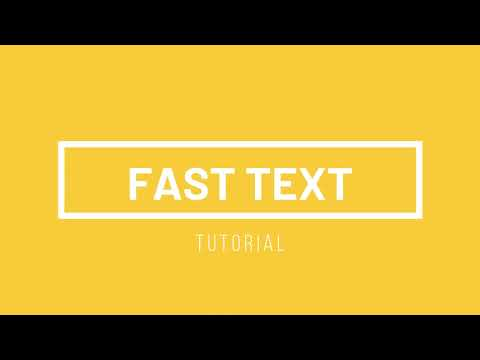

In [ ]:
video_id = "HvoGuRISWdI"
YouTubeVideo(video_id, width=800, height=450)  # Customize width and height as needed

#### **Prepare the Text Data**

First, the script creates a text file containing all job titles from the dataset. The titles are joined into a single string with each title on a new line, which serves as the training data for the FastText model.
This step ensures that the FastText model has access to all job titles in the dataset, enabling it to learn meaningful subword patterns during training. The output is a temporary text file that FastText will use as input.

In [ ]:
df_fasttext = df.copy()

In [ ]:
text_data = '\n'.join(df_fasttext['job_title'].tolist())  # Combine all job titles into a single string with each title separated by a newline
with open('temp_job_titles.txt', 'w') as f:  # Open a temporary text file in write mode
    f.write(text_data)  # Write the combined job titles string to the file

#### **Train the FastText Model**

The FastText model is trained using the unsupervised learning mode with the skip-gram architecture, which is designed to predict the surrounding words for a given input word. Key parameters include:
* dim: The dimensionality of the word vectors.
* epoch: The number of training iterations.
* lr: The learning rate.
* minCount: Minimum number of occurrences for a word to be included.
* ws: The size of the context window.
* neg: Number of negative samples used in training.

This step generates word embeddings for the job titles in the dataset. The skipgram model is particularly effective for capturing semantic relationships, especially with smaller datasets.

In [ ]:
model = fasttext.train_unsupervised(  # Train a FastText model using unsupervised learning on the provided text file
    'temp_job_titles.txt',  # Input text file containing job titles, with one title per line
    model='skipgram',  # Use the skip-gram architecture to predict context words for a given target word
    dim=100,  # Set the dimensionality of the word vectors to 100
    epoch=25,  # Train the model for 25 full passes through the training data
    lr=0.05,  # Set the learning rate to 0.05
    minCount=1,  # Include words that appear at least once in the training data
    ws=5,  # Use a context window size of 5 (number of surrounding words considered)
    neg=10  # Use 10 negative samples during training for better optimization
)

#### **Compute Average Embeddings for Job Titles**

The function *get_average_embedding* calculates the average vector for a given text. It tokenizes the text, retrieves vectors for each word using the FastText model, and calculates their mean. If no valid words are found, it returns a zero vector.

In [ ]:
def get_average_embedding(text, model):  # Define a function to compute the average embedding for a given text.
    words = text.split()  # Split the input text into individual words (tokens).

    embeddings = [model.get_word_vector(word) for word in words if word in model.words]  # Retrieve embeddings for each word in the text if it exists in the model's vocabulary.

    if len(embeddings) > 0:  # If there are valid embeddings, calculate their mean along the specified axis.
        return np.mean(embeddings, axis=0)
    else:  # If no embeddings are found, return a zero vector of the same dimensionality.
        return np.zeros(100)


Apply this function to compute embeddings for all job titles. This step creates a new column, *job_title_embedding*, containing the average vector representation of each job title. These vectors encapsulate the semantic meaning of the titles, enabling similarity calculations.

In [ ]:
df_fasttext['job_title_embedding'] = df_fasttext['job_title'].apply(lambda x: get_average_embedding(x, model))  # Apply the function to each job title in the DataFrame to compute their average embeddings.
df_fasttext[['job_title', 'job_title_embedding']].head()  # Display the first few rows of the DataFrame, including job titles and their calculated embeddings.

job_title  \
0  2019 C.T. Bauer College of Business Graduate (Magna Cum Laude) and aspiring Human Resources professional   
1                                                 Native English Teacher at EPIK (English Program in Korea)   
2                                                                     Aspiring Human Resources Professional   
3                                                                    People Development Coordinator at Ryan   
4                                                           Advisory Board Member at Celal Bayar University   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                            job_title_embedding  
0                         [-0.03411521, 0.01618592, -0.035704177, 0.0034161112, 0.021571357, -0.012899178, -0.0009201592, 0.017535992, 0.015126808, 0.020635815, 0.003011365, 0.01776603, 0.025404096, 0.0018864945, -0.01679138, 0.011916919, 0.0027878357, 0.013452233, -0.009918088, -0.01821124, 0.0019965835, -0.0034672932, 0.010006057, -0.043812416, 0.00056114985, -0.0021493228, 0.02875187, 0.009923162, 0.0061202645, 0.023363236, 0.0011372627, -0.012731873, -0.025904546, -0.014985551, -0.0086893, -0.0066560325, 0.028618254, -0.0039598183, -0.01459137, -0.009582068, 0.012105164, 0.0037664005, 0.011476616, 0.004771175, -0.0024893286, -0.0098995445, 0.007976926, -0.0032570863, -0.0076955156, 0.028938258, -0.051102433, 0.0037308116, 0.005687267, 0.0024179805, 0.0010437339, -0.008546957, 0.00074762874, -0.0016996101, 0.008066927, 0.0080153225, 0.003648865, 0.013876423, 0.016179176, 0.004533098, -3.562468e-05, 0.011881417, -0.00033365557, 0.010551559, 0.0043679713, 0.014932265, -0.003985401, 0.018898439, -0.007228628, 0.01499834, -0.025572589, 0.0053797644, 0.012848603, 0.0057110596, -0.009373734, -0.016553514, -0.019833649, 0.024809413, 0.0172232, -0.016823497, -0.010080055, -0.027151354, 0.005841532, 0.012922229, 0.0008301626, -0.0072546345, 0.009083427, 0.011907058, 0.0058190604, -0.029264903, -0.0127296345, 0.004349515, 0.004219296, 0.013509471, -0.018646203, -0.0049867462]  
1                  [-0.030495683, 0.015246104, -0.032225445, 0.0022929835, 0.019869423, -0.010030199, -0.00038850436, 0.014711898, 0.01366153, 0.018313346, 0.0023620806, 0.01652245, 0.022039682, 0.0016282141, -0.013844024, 0.010080173, 0.0010158564, 0.012043631, -0.008075457, -0.016232485, 0.0019411403, -0.002785367, 0.009137275, -0.038650185, 0.0007971424, -0.0020491583, 0.02572523, 0.008535061, 0.005526847, 0.020616319, 0.001516105, -0.010859399, -0.023803895, -0.012992848, -0.007960599, -0.0054080975, 0.026267787, -0.0037761559, -0.012911198, -0.010061599, 0.010493997, 0.0033383863, 0.008775234, 0.0035990486, -0.0029721644, -0.00861

#### **Retrieve Recommendations**

Here we define the *get_recommendations_fasttext* function to calculate similarities between a search query and the job titles. It computes the cosine similarity between the query's vector and the vectors of all job titles, sorts the results, and returns the top matches along with their associated data.

This function returns a DataFrame with the most similar job titles to the search query, ranked by their similarity scores. The output also includes additional details such as locations and connections.

In [ ]:
def get_recommendations_fasttext(search_text, model, job_title_embeddings, job_titles, df_fasttext, top_n=10):
    search_embedding = get_average_embedding(search_text, model)
    if search_embedding is None:
        return ["Not enough data"]

    # Calculate similarity
    similarities = cosine_similarity([search_embedding], job_title_embeddings)[0]
    #original_indices = job_title_embeddings.index.tolist()
    #print(similarities)

    # List and order similarities
    sim_scores = list(enumerate(similarities))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    indices_fasttext = [i[0] for i in sim_scores]
    # get indices and highest scores
    top_indices = [i[0] for i in sim_scores[:top_n]]
    top_sim_scores = [i[1] for i in sim_scores[:top_n]]

    # Get recommendations based on scores
    recommended_titles = [job_titles[i] for i in top_indices]
    recommended_locations = df_fasttext['location'].iloc[top_indices].tolist()
    recommended_connections = df_fasttext['connection'].iloc[top_indices].tolist()

    # Create dataframe with recommendations.
    recommendations_df = pd.DataFrame({
        "job_title": recommended_titles,
        "location": recommended_locations,
        "connection": recommended_connections,
        "similarity_score": top_sim_scores,

    }, index = indices_fasttext)

    return  recommendations_df

#### **Generate results**

To generate recommendations, we will use the normalized search query, prepare the job title embeddings, and call the recommendation function.

This final step outputs a ranked list of job titles most similar to the search query. Thanks to FastText’s subword-based embeddings, the model can generate meaningful results even for words not explicitly present in the training data.

In [ ]:
job_title_embeddings_fasttext = df_fasttext['job_title_embedding'].tolist()
job_titles = df_fasttext['job_title'].tolist()
recommendations_fasttext = get_recommendations_fasttext(search, model, job_title_embeddings_fasttext, job_titles, df_fasttext, top_n=len(job_titles))
print(f"Search: {search}")
recommendations_fasttext.head()

Search: aspiring human resources specialist


job_title  \
2   Aspiring Human Resources Professional   
16  Aspiring Human Resources Professional   
20  Aspiring Human Resources Professional   
32  Aspiring Human Resources Professional   
45  Aspiring Human Resources Professional   

                               location connection  similarity_score  
2   Raleigh-Durham, North Carolina Area         44          0.999447  
16  Raleigh-Durham, North Carolina Area         44          0.999447  
20  Raleigh-Durham, North Carolina Area         44          0.999447  
32  Raleigh-Durham, North Carolina Area         44          0.999447  
45  Raleigh-Durham, North Carolina Area         44          0.999447

This final step outputs a ranked list of job titles most similar to the search query. Thanks to FastText’s subword-based embeddings, the model can generate meaningful results even for words not explicitly present in the training data.

### **Sentence Transformers**

This part of the project demonstrates how to use Sentence Transformers, a state-of-the-art approach to generate high-quality embeddings for text data, to analyze job titles and compute their semantic similarity. Sentence Transformers go beyond traditional word embeddings by capturing contextual meaning at the sentence level, making them particularly powerful for comparing and ranking text inputs. The following steps include loading a pre-trained model, generating embeddings, calculating similarities, and visualizing the results.

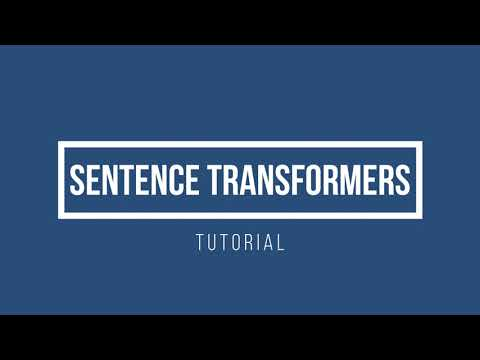

In [ ]:
video_id = "fKme-hcg2x4"
YouTubeVideo(video_id, width=800, height=450)  # Customize width and height as needed

#### **Load a pre-trained sentence Transformer Model**

We will start by loading a pre-trained Sentence Transformer model, *all-MiniLM-L6-v2*. This model is compact yet highly effective for general-purpose semantic similarity tasks.
By using a pre-trained model, we avoid the computational cost and time required to train embeddings from scratch. This particular model strikes a balance between efficiency and performance, making it well-suited for tasks like analyzing job titles.

In [ ]:
# Load a pretrained Sentence Transformer Model
model = SentenceTransformer('all-MiniLM-L6-v2')

#### **Calculate embeddings**

The embeddings for job titles in the dataset and the search query are generated using the loaded model.

The encode method converts text inputs into dense numerical vectors (embeddings) that represent their semantic meaning. The embeddings variable contains the vectors for all job titles, while search_embedding represents the query.

These embeddings allow us to compute the semantic similarity between the job titles and the search query.

In [ ]:
# Calculate embeddings
embeddings = model.encode(df['job_title'])
search_embedding = model.encode(search)

#### **Calculate similarities**

Semantic similarities between the job titles and the search query are computed using the model’s similarity function. The results are integrated into the dataset.

* *similarity* computes the cosine similarity between the *search_embedding* and the job title embeddings.
* The similarity scores are added to the dataset as a new column, *similarity_score*, which is then sorted in descending order to rank the most relevant job titles.

In [ ]:
# Calculate similarities
similarities = model.similarity(embeddings, search_embedding)
df_sentence_transformer = pd.concat([df.drop(columns = ['id']), pd.DataFrame(similarities, columns=['similarity_score'])], axis=1)
df_sentence_transformer.sort_values(by='similarity_score', ascending=False, inplace=True)

#### **Display recommendations**

The search query is displayed alongside the top-ranking job titles and their similarity scores.

In [ ]:
print(f"\nSearch: {search}")
indices_transformer = df_sentence_transformer.index
df_sentence_transformer.head()


Search: aspiring human resources specialist


job_title                    location  \
48  Aspiring Human Resources Specialist  Greater New York City Area   
35  Aspiring Human Resources Specialist  Greater New York City Area   
5   Aspiring Human Resources Specialist  Greater New York City Area   
23  Aspiring Human Resources Specialist  Greater New York City Area   
59  Aspiring Human Resources Specialist  Greater New York City Area   

   connection  fit                          job_title_tokens  \
48          1  NaN  [Aspiring, Human, Resources, Specialist]   
35          1  NaN  [Aspiring, Human, Resources, Specialist]   
5           1  NaN  [Aspiring, Human, Resources, Specialist]   
23          1  NaN  [Aspiring, Human, Resources, Specialist]   
59          1  NaN  [Aspiring, Human, Resources, Specialist]   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                       job_title_embedding  \
48  [-0.0020921852, 0.0040473705, 0.0027973852, 0.0026652245, -0.0019447521, -0.005989425, 0.0029002724, 0.0073241265, -0.004890063, -0.005830184, 0.001789548, -0.0028898069, -0.0051748795, 0.00063079473, 0.00061470264, -0.0022502937, 0.0004172754, -0.0011368473, -0.004987378, -0.005907831, -0.0009401351, -0.0020474843, 0.0064055617, -0.0026110716, -0.0011027169, -0.0029601478, -0.002827147, 0.0016346569, -0.0013939827, 0.00253465, 0.0017087444, -0.0054150843, 0.0013989516, -0.0060020625, 0.00016585963, 0.0032999287, 0.005721286, 0.0012428723, 0.0016713652, -0.0015954177, -6.953045e-05, -0.003145694, -0.005693531, 6.666593e-05, -0.0010195815, 0.0003283664, 0.0013520945, 0.0037454753, 0.0013030522, 0.0049322825, 0.0016323186, -0.0048226723, 0.0024903568, 0.0039040316, -0.002226077, 0.0016252978, 0.006343886, -0.00049483066, -0.0037519138, 0.0018149201, 4.0617306e-05, 0.0011026026, 0.0005215038, -0.005793709, -0.00035844475, 0.004854425, 0.004242922, 0.0031597437, -0.0033796579, 0.001128216, 5.0621864e-05, 0.0037927884, 0.004005323, 0.0017942756, 0.0020388192, 0.0020841733, -0.003723988, 0.0022972936, -0.00012620393, -0.0034515867, -0.0015885802, 0.0025283801, 0.0015114527, -0.0021495486, 0.00022892992, -0.002197573, -0.0006785801, -0.0024918045, 0.0020103373, 0.0027388628, 0.0048799943, 0.0011545286, -0.002534673, -0.001735125, 0.006834711, 0.0020811576, -0.0030821399, -0.005465798, -0.0029780902, 0.00034090522]   
35  [-0.0020921852, 0.0040473705, 0.0027973852, 0.0026652245, -0.0019447521, -0.005989425, 0.0029002724, 0.0073241265, -0.004890063, -0.005830184, 0.001789548, -0.0028898069, -0.0051748795, 0.00063079473, 0.00061470264, -0.0022502937, 0.0004172754, -0.0011368473, -0.004987378, -0.005907831, -0.0009401351, -0.0020474843, 0.0064055617, -0.002

We remove some columns for better inspection and latter manipulation of the dataset.

In [ ]:
df_recommendations_transformer = df_sentence_transformer.drop(columns = ['fit'])
df_recommendations_transformer.head()

job_title                    location  \
48  Aspiring Human Resources Specialist  Greater New York City Area   
35  Aspiring Human Resources Specialist  Greater New York City Area   
5   Aspiring Human Resources Specialist  Greater New York City Area   
23  Aspiring Human Resources Specialist  Greater New York City Area   
59  Aspiring Human Resources Specialist  Greater New York City Area   

   connection                          job_title_tokens  \
48          1  [Aspiring, Human, Resources, Specialist]   
35          1  [Aspiring, Human, Resources, Specialist]   
5           1  [Aspiring, Human, Resources, Specialist]   
23          1  [Aspiring, Human, Resources, Specialist]   
59          1  [Aspiring, Human, Resources, Specialist]   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                       job_title_embedding  \
48  [-0.0020921852, 0.0040473705, 0.0027973852, 0.0026652245, -0.0019447521, -0.005989425, 0.0029002724, 0.0073241265, -0.004890063, -0.005830184, 0.001789548, -0.0028898069, -0.0051748795, 0.00063079473, 0.00061470264, -0.0022502937, 0.0004172754, -0.0011368473, -0.004987378, -0.005907831, -0.0009401351, -0.0020474843, 0.0064055617, -0.0026110716, -0.0011027169, -0.0029601478, -0.002827147, 0.0016346569, -0.0013939827, 0.00253465, 0.0017087444, -0.0054150843, 0.0013989516, -0.0060020625, 0.00016585963, 0.0032999287, 0.005721286, 0.0012428723, 0.0016713652, -0.0015954177, -6.953045e-05, -0.003145694, -0.005693531, 6.666593e-05, -0.0010195815, 0.0003283664, 0.0013520945, 0.0037454753, 0.0013030522, 0.0049322825, 0.0016323186, -0.0048226723, 0.0024903568, 0.0039040316, -0.002226077, 0.0016252978, 0.006343886, -0.00049483066, -0.0037519138, 0.0018149201, 4.0617306e-05, 0.0011026026, 0.0005215038, -0.005793709, -0.00035844475, 0.004854425, 0.004242922, 0.0031597437, -0.0033796579, 0.001128216, 5.0621864e-05, 0.0037927884, 0.004005323, 0.0017942756, 0.0020388192, 0.0020841733, -0.003723988, 0.0022972936, -0.00012620393, -0.0034515867, -0.0015885802, 0.0025283801, 0.0015114527, -0.0021495486, 0.00022892992, -0.002197573, -0.0006785801, -0.0024918045, 0.0020103373, 0.0027388628, 0.0048799943, 0.0011545286, -0.002534673, -0.001735125, 0.006834711, 0.0020811576, -0.0030821399, -0.005465798, -0.0029780902, 0.00034090522]   
35  [-0.0020921852, 0.0040473705, 0.0027973852, 0.0026652245, -0.0019447521, -0.005989425, 0.0029002724, 0.0073241265, -0.004890063, -0.005830184, 0.001789548, -0.0028898069, -0.0051748795, 0.00063079473, 0.00061470264, -0.0022502937, 0.0004172754, -0.0011368473, -0.004987378, -0.005907831, -0.0009401351, -0.0020474843, 0.0064055617, -0.0026110716, -0.0011027169, -0.002

#### **Prepare Embeddings for Further Analysis**

The embeddings, job titles, and similarity scores are extracted into a structured DataFrame for further processing or export, to organize the embeddings, job titles, and similarity scores into a new DataFrame, making it easier to save, share, or use for subsequent analyses.

In [ ]:
df_job_embeddings_sentence_transformer = df_sentence_transformer['job_title_embedding'].tolist()
df_job_titles_sentence_transformer = df_sentence_transformer['job_title'].tolist()
df_job_titles_scores = df_sentence_transformer['similarity_score'].tolist()

df_job_embeddings_transformer = pd.DataFrame(pd.concat([pd.DataFrame(df_job_embeddings_sentence_transformer, index = indices_transformer), pd.DataFrame(df_job_titles_sentence_transformer, columns = ['job_title'], index = indices_transformer), pd.DataFrame(df_sentence_transformer['similarity_score'])], axis = 1 ))
df_job_embeddings_transformer.head()

0         1         2         3         4         5       6  \
48 -0.002092  0.004047  0.002797  0.002665 -0.001945 -0.005989  0.0029   
35 -0.002092  0.004047  0.002797  0.002665 -0.001945 -0.005989  0.0029   
5  -0.002092  0.004047  0.002797  0.002665 -0.001945 -0.005989  0.0029   
23 -0.002092  0.004047  0.002797  0.002665 -0.001945 -0.005989  0.0029   
59 -0.002092  0.004047  0.002797  0.002665 -0.001945 -0.005989  0.0029   

           7        8        9       10       11        12        13  \
48  0.007324 -0.00489 -0.00583  0.00179 -0.00289 -0.005175  0.000631   
35  0.007324 -0.00489 -0.00583  0.00179 -0.00289 -0.005175  0.000631   
5   0.007324 -0.00489 -0.00583  0.00179 -0.00289 -0.005175  0.000631   
23  0.007324 -0.00489 -0.00583  0.00179 -0.00289 -0.005175  0.000631   
59  0.007324 -0.00489 -0.00583  0.00179 -0.00289 -0.005175  0.000631   

          14       15        16        17        18        19       20  \
48  0.000615 -0.00225  0.000417 -0.001137 -0.004987 -0.005908 -0.00094   
35  0.000615 -0.00225  0.000417 -0.001137 -0.004987 -0.005908 -0.00094   
5   0.000615 -0.00225  0.000417 -0.001137 -0.004987 -0.005908 -0.00094   
23  0.000615 -0.00225  0.000417 -0.001137 -0.004987 -0.005908 -0.00094   
59  0.000615 -0.00225  0.000417 -0.001137 -0.004987 -0.005908 -0.00094   

          21        22        23        24       25        26        27  \
48 -0.002047  0.006406 -0.002611 -0.001103 -0.00296 -0.002827  0.001635   
35 -0.002047  0.006406 -0.002611 -0.001103 -0.00296 -0.002827  0.001635   
5  -0.002047  0.006406 -0.002611 -0.001103 -0.00296 -0.002827  0.001635   
23 -0.002047  0.006406 -0.002611 -0.001103 -0.00296 -0.002827  0.001635   
59 -0.002047  0.006406 -0.002611 -0.001103 -0.00296 -0.002827  0.001635   

          28        29        30        31        32        33        34  \
48 -0.001394  0.002535  0.001709 -0.005415  0.001399 -0.006002  0.000166   
35 -0.001394  0.002535  0.001709 -0.005415  0.001399 -0.006002  0.000166   
5  -0.001394  0.002535  0.001709 -0.005415  0.001399 -0.006002  0.000166   
23 -0.001394  0.002535  0.001709 -0.005415  0.001399 -0.006002  0.000166   
59 -0.001394  0.002535  0.001709 -0.005415  0.001399 -0.006002  0.000166   

        35        36        37        38        39       40        41  \
48  0.0033  0.005721  0.001243  0.001671 -0.001595 -0.00007 -0.003146   
35  0.0033  0.005721  0.001243  0.001671 -0.001595 -0.00007 -0.003146   
5   0.0033  0.005721  0.001243  0.001671 -0.001595 -0.00007 -0.003146   
23  0.0033  0.005721  0.001243  0.001671 -0.001595 -0.00007 -0.003146   
59  0.0033  0.005721  0.001243  0.001671 -0.001595 -0.00007 -0.003146   

          42        43       44        45        46        47        48  \
48 -0.005694  0.000067 -0.00102  0.000328  0.001352  0.003745  0.001303   
35 -0.005694  0.000067 -0.00102  0.000328  0.001352  0.003745  0.001303   
5  -0.005694  0.000067 -0.00102  0.000328  0.001352  0.003745  0.001303   
23 -0.005694  0.000067 -0.00102  0.000328  0.001352  0.003745  0.001303   
59 -0.005694  0.000067 -0.00102  0.000328  0.001352  0.003745  0.001303   

          49        50        51       52        53        54        55  \
48  0.004932  0.001632 -0.004823  0.00249  0.003904 -0.002226  0.001625   
35  0.004932  0.001632 -0.004823  0.00249  0.003904 -0.002226  0.001625   
5   0.004932  0.001632 -0.004823  0.00249  0.003904 -0.002226  0.001625   
23  0.004932  0.001632 -0.004823  0.00249  0.003904 -0.002226  0.001625   
59  0.004932  0.001632 -0.004823  0.00249  0.003904 -0.002226  0.001625   

          56        57        58        59        60        61        62  \
48  0.006344 -0.000495 -0.003752  0.001815  0.000041  0.001103  0.000522   
35  0.006344 -0.000495 -0.003752  0.001815  0.000041  0.001103  0.000522   
5   0.006344 -0.000495 -0.003752  0.001815  0.000041  0.001103  0.000522   
23  0.006344 -0.000495 -0.003752  0.001815  0.000041  0.001103  0.000522   
59  0.006344 -0.000495 -0.003752  0.001815  0.000041  0.001

### **Large Language Models**

#### **LlaMA 3.2**

In this section of the project we demonstrate the end-to-end process of fine-tuning Meta’s **LLaMA 3.2** model for calculating semantic similarity scores between sentences. It covers loading and configuring the model, fine-tuning on a dataset, generating predictions, and evaluating the results. This approach uses state-of-the-art techniques like **LoRA** (Low-Rank Adaptation) and **QLoRA** for efficient memory usage and fast training, leveraging tools such as Hugging Face and Weights & Biases for tracking and model management.

##### **Why use LLaMA 3.2**

**LLaMA(Large Language Model Meta AI) 3.2** is a highly optimized version of Meta’s state-of-the-art language models. It offers exceptional performance for natural language understanding and generation tasks, with improvements in efficiency, accuracy, and scalability compared to earlier versions. Here are the reasons why **LLaMA 3.2** is chosen in this code:

1. **Compactness and Performance:** LLaMA 3.2 provides a 1B parameter variant, which balances computational requirements and accuracy, making it ideal for tasks where hardware limitations are a concern.

2. **Fine-Tuning Potential:** LLaMA models are designed for fine-tuning with relatively small datasets. This aligns well with the need to adapt the model to a specialized task, such as predicting cosine similarity between sentences.

3. **Pre-Trained on Diverse Data:** Pre-training on large, diverse corpora ensures that LLaMA 3.2 captures a broad range of linguistic patterns, reducing the effort required to adapt it to specific domains.

4. **Efficiency Optimizations:**

  * **Low CPU Memory Usage:** The model can be loaded efficiently on systems with limited memory, thanks to the low_cpu_mem_usage=True configuration.
  * **16-bit Precision:** Using torch.float16 reduces memory usage and speeds up computations without significant loss in accuracy.
  * **Device Mapping:** The device_map="auto" feature intelligently assigns model components to available hardware (e.g., CPUs and GPUs), maximizing performance.
  * **Support for LoRA and QLoRA:** The LLaMA architecture is well-suited for Low-Rank Adaptation (LoRA) and Quantized LoRA (QLoRA), enabling efficient fine-tuning with minimal computational overhead.

In [ ]:
video_id = "S3ZI-CvNehQ"
YouTubeVideo(video_id, width=800, height=450)

##### **Loading the Pre-Trained LLaMA 3.2 Model and Tokenizer**

In [ ]:
import os
from huggingface_hub import login

###### **Explanation of configurations**

* **base_model:** Specifies the model name/path. In this case, it’s the *LLaMA 3.2 1B parameter model*.
* **return_dict=True:** Outputs a dictionary instead of a tuple, making it easier to access specific outputs like logits and hidden states.
* **low_cpu_mem_usage=True:** Optimizes memory usage during model loading, enabling it to run on systems with limited resources.
* **torch_dtype=torch.float16:** Uses 16-bit floating-point precision to reduce memory consumption and accelerate computations.
* **device_map="auto":** Automatically maps model components across available devices (e.g., GPUs and CPUs), maximizing hardware utilization.
* **trust_remote_code=True:** Enables the execution of custom code specific to the model, ensuring compatibility with its architecture.

In [ ]:
# Sets the base model to Meta's LLaMA 3.2 model with 1 billion parameters.
base_model = "meta-llama/Llama-3.2-1B"
# Loads the pre-trained causal language model (LLaMA 3.2) with specific configurations for memory and device usage.
model = AutoModelForCausalLM.from_pretrained(
        base_model,                   # Specifies the model name/path.
        return_dict=True,             # Enables dictionary output format for easy access to model outputs.
        low_cpu_mem_usage=True,       # Reduces memory usage on CPU, optimizing resource allocation.
        torch_dtype=torch.float16,    # Uses 16-bit floating point precision to lower memory usage and speed up computation.
        device_map="auto",            # Automatically maps model layers across available devices (like GPUs) for efficiency.
        trust_remote_code=True,       # Allows remote code to run if required by the model's implementation.
)

config.json:   0%|          | 0.00/843 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/2.47G [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/185 [00:00<?, ?B/s]

##### **Load the tokenizer**

The tokenizer processes input text into numerical tokens that the model can understand. It also helps convert model outputs back into human-readable text.

In [ ]:
# Loads the tokenizer associated with the specified base model, enabling it to process input text into tokens.
tokenizer = AutoTokenizer.from_pretrained(base_model)

tokenizer_config.json:   0%|          | 0.00/50.5k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/9.09M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/301 [00:00<?, ?B/s]

##### **Initialize the Text Generation Pipeline**

The pipeline simplifies the text generation process:

* **Automated Integration:** Combines the tokenizer and model into a single callable object.
* **Task Specification:** Setting task="text-generation" ensures the pipeline is optimized for text completion and generation tasks.
* **Precision and Device Mapping:** The same configurations for 16-bit precision and automatic device allocation are applied, ensuring efficient performance.

In [ ]:
# Sets up a text generation pipeline that handles end-to-end text generation with the loaded model and tokenizer.
pipe = pipeline(
    "text-generation",                # Specifies the task type as text generation.
    model=model,                      # Assigns the pre-loaded model for generation tasks.
    tokenizer=tokenizer,              # Assigns the pre-loaded tokenizer to process input text.
    torch_dtype=torch.float16,         # Maintains 16-bit floating point precision for memory efficiency.
    device_map="auto",                # Automatically assigns devices to maximize computational efficiency.
)

**LLaMA 3.2’s flexible architecture and optimizations** make it a strong choice for both research and production. It is particularly valuable in scenarios requiring:

* High-quality text generation or understanding.
* Efficient use of computational resources.
* Adaptation to domain-specific tasks through fine-tuning.

This setup ensures that the model can seamlessly transition from general-purpose text generation to task-specific applications with minimal additional effort.

**After these procedures:**,
* **The model is ready for predictions:** The loaded model and tokenizer can now be used to generate predictions for tasks like semantic similarity scoring or general text generation.
* **Efficiency is Maximized:** Through configurations like memory optimization and device mapping, the setup is resource-efficient, even on hardware with limited capacity.
* **Ease of Use:** The pipeline abstracts complexities, allowing users to focus on task-specific implementations without delving into low-level model operations.

##### **Setting up credentials**

Here we set up secure access to Hugging Face and Weights & Biases (WandB), two widely used platforms in machine learning workflows. Proper authentication ensures seamless integration with their services, enabling the use of pre-trained models, datasets, and experiment tracking tools.

* **Hugging Face** is a platform for sharing and accessing pre-trained models, datasets, and machine learning utilities.
  * Authentication with an API token allows the script to:
    * Access private models and datasets stored on the Hugging Face Hub.
    * Push fine-tuned models and custom tokenizers to the Hub for sharing or deployment.
    * Perform seamless integration with tools like transformers and datasets.

* **Weights & Biases (WandB)** is a platform for tracking and visualizing machine learning experiments. It logs metrics, tracks hyperparameters, and generates rich visualizations to analyze model performance.
  * Authentication with an API key ensures:
    * Experiments are logged to your personal or organizational WandB account.
    * Metrics such as loss, accuracy, and learning rate schedules are tracked in real-time.
    * Projects are organized and shared for collaborative analysis.

**Why Secure Authentication Matters**

* **Prevents Exposure:** Tokens stored in environment variables are not hard-coded in the script, reducing the risk of accidental exposure (e.g., through version control systems like Git).
* **Enables Customization:** Authentication allows access to personalized or private resources (e.g., private models, datasets, or projects).
* **Facilitates Collaboration:** Both platforms enable seamless sharing of models, datasets, and experiment logs with collaborators.

In [ ]:
import os
from getpass import getpass
from google.colab import userdata
HF_TOKEN = userdata.get('HF_TOKEN')
WANDB = userdata.get('WANDB')

In [ ]:
os.environ["HF_TOKEN"] = HF_TOKEN
os.environ["WANDB"] = WANDB

In [ ]:
# Logs into Hugging Face using the stored token, adding it to Git credentials.
login(token=os.environ["HF_TOKEN"], add_to_git_credential=True)

Note: Environment variable`HF_TOKEN` is set and is the current active token independently from the token you've just configured.


By configuring authentication:

1. **Hugging Face Integration:**

  * The script can load pre-trained models and datasets directly from the Hugging Face Hub.
  * It allows pushing fine-tuned models back to the Hub for deployment or sharing.

2. **Weights & Biases Tracking:**

  * Experiment metrics are automatically logged, enabling real-time monitoring and post-training analysis.
  * The integration facilitates reproducibility and debugging by keeping a detailed record of training configurations and results.

3. **Scalable and Secure Workflow:**

  *Secure handling of tokens ensures the workflow is production-ready and adheres to best practices for credential management.

##### **Log into Wandb**

* **Authentication:** The wandb.login() function uses the API key from environment variables to securely authenticate the script. This ensures that experiment logs and metrics are properly attributed to the specified WandB account.

* **Project Initialization:** The wandb.init() function creates a new run within the project, specifying details such as:

  * **Project Name:** A descriptive title for grouping related experiments.

  * **Job Type:** Identifies the task type, such as training or evaluation.

  * **Anonymous Logging:** Allows sharing experiment details publicly without exposing sensitive information.

In [ ]:
# Logs into Weights & Biases (Wandb) using the token stored in environment variables
wandb.login(key=os.environ["WANDB"])  # Authenticate using the WANDB key from environment variables

# Initializes a new Wandb run with specified project details
run = wandb.init(
    project="Fine-tune llama-3.1-1b-it on Similarity Score Dataset",  # Set the project name
    job_type="training",  # Define the type of job (e.g., training, evaluation)
    anonymous="allow"  # Allow anonymous logging (useful for public sharing or testing)
)

wandb: Using wandb-core as the SDK backend.  Please refer to https://wandb.me/wandb-core for more information.
wandb: W&B API key is configured. Use `wandb login --relogin` to force relogin
wandb: WARNING If you're specifying your api key in code, ensure this code is not shared publicly.
wandb: WARNING Consider setting the WANDB_API_KEY environment variable, or running `wandb login` from the command line.
wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc
wandb: Currently logged in as: japhet-hernandezv (japhet-hernandezv-upaep). Use `wandb login --relogin` to force relogin


##### **Loading dataset for Fine Tuning**

The dataset *stsb_multi_mt* is loaded using Hugging Face's datasets library. This dataset is a multi-lingual extension of the **Semantic Textual Similarity Benchmark (STS-B)** and is specifically designed for tasks involving sentence similarity. Only the English portion **("en")** of the dataset is used, and the train split is selected.

In [ ]:
# Loads the 'stsb_multi_mt' dataset in English using the 'train' split for tasks involving sentence similarity
dataset2 = load_dataset(
    "PhilipMay/stsb_multi_mt",  # Dataset identifier from the Hugging Face hub
    "en",  # Specify the language as English
    split="train"  # Load only the training split of the dataset
)

README.md:   0%|          | 0.00/11.4k [00:00<?, ?B/s]

train-00000-of-00001.parquet:   0%|          | 0.00/470k [00:00<?, ?B/s]

test-00000-of-00001.parquet:   0%|          | 0.00/108k [00:00<?, ?B/s]

dev-00000-of-00001.parquet:   0%|          | 0.00/142k [00:00<?, ?B/s]

Generating train split:   0%|          | 0/5749 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/1379 [00:00<?, ? examples/s]

Generating dev split:   0%|          | 0/1500 [00:00<?, ? examples/s]

In [ ]:
# Sets a name for the retrained model to identify or save it after fine-tuning
new_model = "llama_retrained"  # Define a name for the newly trained model

# Specifies the data type for PyTorch model operations to 16-bit floating point
torch_dtype = torch.float16  # Use half-precision (16-bit floats) for reduced memory usage and faster computation

# Sets the attention mechanism implementation to "eager"
attn_implementation = "eager"  # Use "eager" mode for immediate execution of operations, useful for debugging or compatibility

The dataset is converted into a Pandas DataFrame for easier manipulation and preprocessing.

In [ ]:
# Convert the loaded dataset (dataset2) into a pandas DataFrame for easier data manipulation and analysis
df = pd.DataFrame(dataset2)  # Transform the dataset into a tabular format

# Display the first few rows of the DataFrame to preview its structure and content
df.head()  # Show the first rows to understand the dataset's columns and values

sentence1  \
0                         A plane is taking off.   
1                A man is playing a large flute.   
2  A man is spreading shreded cheese on a pizza.   
3                   Three men are playing chess.   
4                    A man is playing the cello.   

                                                  sentence2  similarity_score  
0                               An air plane is taking off.              5.00  
1                                 A man is playing a flute.              3.80  
2  A man is spreading shredded cheese on an uncooked pizza.              3.80  
3                                Two men are playing chess.              2.60  
4                        A man seated is playing the cello.              4.25

##### **Normalizing the similarity scores**

The similarity scores in the dataset range from 0 to 5, indicating how semantically similar two sentences are. The scores are divided by 5 to bring them into a [0, 1] range. This standardization ensures consistency and compatibility with the cosine similarity scale, which is also bounded between 0 and 1.

Normalization simplifies model learning by ensuring input labels are scaled similarly to predicted outputs. From this process, a normalized similarity_score column with values between 0 and 1

In [ ]:
# Normalizes the 'similarity_score' column by dividing each value by 5 to bring scores to a new scale.
df['similarity_score'] = df['similarity_score'] / 5

# Displays the first few rows of the DataFrame to verify the updated 'similarity_score' values.
df.head()


sentence1  \
0                         A plane is taking off.   
1                A man is playing a large flute.   
2  A man is spreading shreded cheese on a pizza.   
3                   Three men are playing chess.   
4                    A man is playing the cello.   

                                                  sentence2  similarity_score  
0                               An air plane is taking off.              1.00  
1                                 A man is playing a flute.              0.76  
2  A man is spreading shredded cheese on an uncooked pizza.              0.76  
3                                Two men are playing chess.              0.52  
4                        A man seated is playing the cello.              0.85

##### **Shuffling and subsetting the Data**

We aim to get a randomly shuffled, smaller subset of the dataset with 5000 rows:
* **Shuffling:** The sample(frac=1) function randomly shuffles the rows of the DataFrame to eliminate any inherent order or bias in the dataset.
* **Reproducibility:** Setting a random_state ensures that the shuffling is consistent across runs, which is crucial for reproducibility.
* **Subset Selection:** The head(5000) function selects the first 5000 rows from the shuffled dataset. This reduces the dataset size for faster experimentation during development without overwhelming computational resources.

In [ ]:
# Randomly shuffle the DataFrame and select the first 5000 rows for processing
# seed = 85
df = df.sample(frac=1, random_state=seed).reset_index(drop=True).head(5000)  # Shuffle and reset the index for reproducibility

##### **Splitting the data**

* The dataset is divided into three subsets:

  * **Training Set (X_train):** 80% of the data is used for model training.
  * **Evaluation Set (X_eval):** 10% of the data is reserved for hyperparameter tuning and monitoring the model’s performance during training.
  * **Testing Set (X_test):** 10% of the data is held out for final evaluation to measure how well the model generalizes to unseen data.

* **Indices Calculation:**

  * **train_end** determines the row index where the training data ends.
  * **eval_end** determines where the evaluation data ends.

* **Subsetting:**
  * The .copy() method ensures that the subsets are independent copies of the original DataFrame, preventing unintended modifications.

In [ ]:
# Define proportions for splitting the data into training, evaluation, and testing sets
train_size = 0.8  # 80% of the data will be used for training
eval_size = 0.1  # 10% of the data will be used for evaluation

# Calculate row indices to split the DataFrame
train_end = int(train_size * len(df))  # Calculate the end index for the training set
eval_end = train_end + int(eval_size * len(df))  # Calculate the end index for the evaluation set

# Create separate subsets for training, evaluation, and testing
X_train = df[:train_end].copy()  # First portion is the training set
X_eval = df[train_end:eval_end].copy()  # Middle portion is the evaluation set
X_test = df[eval_end:].copy()  # Remaining portion is the test set

##### **Fine-tuning prompts**

This step focuses on creating structured prompts for supervised fine-tuning of the LLaMA model. The prompts act as inputs for the model, embedding the relevant data (sentence pairs and their similarity scores) in a consistent format. By generating these prompts dynamically, the training and evaluation datasets are tailored for the fine-tuning process.

* The function *generate_prompt* creates a formatted string (prompt) for each data point.
* The prompt specifies the task to the model: calculating the cosine similarity score between two sentences.

* **Key Features:**

  * **Instructional Context:** The prompt provides clear instructions for the model, ensuring it understands the task.
    * **Example:** "Return the cosine similarity score between the following sentences on a scale from 0 to 1."
  * **Dynamic Variables:**
    * The *data_point* argument contains:
      * *sentence1:* The first sentence in the pair.
      * *sentence2:* The second sentence in the pair.
      * *similarity_score:* The precomputed similarity score, which serves as the expected output during training.

The model is instructed to respond with only a numeric similarity score, maintaining consistency in outputs.

In [ ]:
# Define a function to generate a training prompt with a similarity score
def generate_prompt(data_point):
    return f"""
    Return the cosine similarity score between the following sentences on a scale from 0 to 1.
    Respond only with a number that reflects the similarity between the two sentences.

    Phrase 1: '{data_point["sentence1"]}'
    Phrase 2: '{data_point["sentence2"]}'

    Cosine similarity score: {data_point["similarity_score"]}""".strip()

##### **Generating prompts for Training and Evaluation**

In [ ]:
# Define a function to generate a test prompt without a similarity score for evaluation purposes
def generate_test_prompt(data_point):
    return f"""
    Return the cosine similarity score between the following sentences on a scale from 0 to 1.
    Respond only with a number that reflects the similarity between the two sentences.

    Phrase 1: '{data_point["sentence1"]}'
    Phrase 2: '{data_point["sentence2"]}'

    Cosine similarity score: """.strip()

The *apply()* function generates a unique prompt for each row in the training *(X_train)* and evaluation *(X_eval)* datasets.
The generated prompt is stored in a new column, *text*, within the respective DataFrame.

axis=1 ensures that the generate_prompt function is applied to each row (*data point*) individually.
Each row’s values (*sentence1*, *sentence2*, and *similarity_score*) are dynamically inserted into the prompt template.

The advantages of generating prompts dynamically are:

* **Task-Specific Customization:** The prompts are tailored to the specific task of predicting sentence similarity, ensuring the model receives the necessary context for accurate learning.
* **Efficient Scaling:** Dynamic generation allows seamless adaptation to different datasets or tasks without manually creating prompts for each data point.

* **Role of Prompts in Fine-Tuning:**

  * Prompts convert structured data (sentence pairs and scores) into a format compatible with LLMs, which are trained to process and respond to textual instructions.
  * By embedding the task instructions directly in the input, the model is conditioned to focus on the specific task during fine-tuning.

The rationale of including the similarity score is:

* **Supervised Learning:** During training, the similarity score serves as the ground truth. The model learns to associate the textual inputs with the correct numerical outputs.

* **Feedback for Evaluation:** Including the score in the evaluation prompts ensures the model’s predictions can be compared directly against the expected values.

In [ ]:
# Generate text prompts for supervised training and evaluation datasets
X_train.loc[:, 'text'] = X_train.apply(generate_prompt, axis=1)  # Apply prompt generation to the training set
X_eval.loc[:, 'text'] = X_eval.apply(generate_prompt, axis=1)  # Apply prompt generation to the evaluation set

# Store the true similarity scores and generate prompts for the test dataset
y_true = X_test['similarity_score']  # Store true similarity scores for evaluation
X_test.loc[:, 'text'] = X_test.apply(generate_test_prompt, axis=1)  # Generate prompts for the test set


In [ ]:
# Sets the display option in pandas to show the full content of each cell in the DataFrame,
# removing any truncation of long text (helpful for viewing large text fields).
pd.set_option('display.max_colwidth', None)

# Displays the first few rows of the X_train DataFrame, allowing inspection of the data structure and content,
# especially useful to check the generated 'text' column for prompt formatting.
X_train.head()


sentence1  \
0                     Egypt protesters 'to be dispersed'   
1         What makes India vote? Jaipur Lit Fest debates   
2    US believes Syrian government used chemical weapons   
3  That is not direct responsibilty to the constituents.   
4                                A woman is frying fish.   

                                                     sentence2  \
0                            Abduction teacher to be sentenced   
1  What makes India vote? Debate at Jaipur Literature Festival   
2                      US suspects Syria used chemical weapons   
3          Aye but they ARE responsible to their constituents.   
4                                     A woman is cooking fish.   

   similarity_score  \
0              0.00   
1              1.00   
2              1.00   
3              0.52   
4              0.80   

                                                                                                                                                                                                                                                                                                                                                                                  text  
0                                                      Return the cosine similarity score between the following sentences on a scale from 0 to 1.\n    Respond only with a number that reflects the similarity between the two sentences.\n\n    Phrase 1: 'Egypt protesters 'to be dispersed''\n    Phrase 2: 'Abduction teacher to be sentenced'\n\n    Cosine similarity score: 0.0  
1                Return the cosine similarity score between the following sentences on a scale from 0 to 1.\n    Respond only with a number that reflects the similarity between the two sentences.\n\n    Phrase 1: 'What makes India vote? Jaipur Lit Fest debates'\n    Phrase 2: 'What makes India vote? Debate at Jaipur Literature Festival'\n\n    Cosine similarity score: 1.0  
2                               Return the cosine similarity score between the following sentences on a scale from 0 to 1.\n    Respond only with a number that reflects the similarity between the two sentences.\n\n    Phrase 1: 'US believes Syrian government used chemical weapons'\n    Phrase 2: 'US suspects Syria used chemical weapons'\n\n    Cosine similarity score: 1.0  
3  Return the cosine similarity score between the following sentences on a scale from 0 to 1.\n    Respond only with a number that reflects the similarity between the two sentences.\n\n    Phrase 1: 'That is not direct responsibilty to the constituents.'\n    Phrase 2: 'Aye but they ARE responsible to their constituents.'\n\n    Cosine similarity score: 0.5199999809265137  
4                                                                          Return the cosine similarity score between the following sentences on a scale from 0 to 1.\n    Respond only with a number that reflects the similarity between the two sentences.\n\n    Phrase 1: 'A woman is frying fish.'\n    Phrase 2: 'A woman is cooking fish.'\n\n    Cosine similarity score: 0.8

The following function, *predict_similarity_scores*, is designed to evaluate a fine-tuned language model by predicting cosine similarity scores for sentence pairs in a test dataset. The process is iterative and involves generating predictions for each prompt in the dataset. For every row in the test DataFrame, the function extracts the text prompt and passes it to a text generation pipeline configured with the model and tokenizer.

The pipeline generates a response containing the predicted similarity score. To ensure compatibility, the score is extracted from the generated text, cleaned of any extraneous characters, and converted to a numeric format. If the conversion fails, a default score of 0.0 is assigned. This approach ensures robustness against unexpected outputs from the model. By limiting the number of generated tokens (*max_new_tokens=5*) and setting a moderate randomness level (*temperature=0.8*), the function strikes a balance between efficient inference and diverse predictions. The result is a list of predicted similarity scores (*y_pred*), which can be used for further evaluation or analysis.

In [ ]:
# Defines a function to predict similarity scores for each prompt in the test DataFrame using the specified model and tokenizer.
def predict_similarity_scores(test_df, model, tokenizer):
    y_pred = []  # Initializes an empty list to store predicted similarity scores.

    # Iterates through each row in the test DataFrame, with tqdm to show progress.
    for i in tqdm(range(len(test_df)), disable=True):
        prompt = test_df.iloc[i]["text"]  # Retrieves the prompt text from the current row.

        # Initializes the text generation pipeline with specified model and tokenizer settings.
        pipe = pipeline(task="text-generation",
                        model=model,           # Uses the provided model for generating responses.
                        tokenizer=tokenizer,   # Applies the tokenizer to process input and output text.
                        max_new_tokens=5,      # Limits the number of tokens generated to avoid lengthy responses.
                        temperature=0.8)       # Sets the randomness of generation for more diverse output.

        # Generates text based on the prompt using the model.
        result = pipe(prompt)

        # Extracts the generated similarity score from the model's output text.
        answer = result[0]['generated_text'].split("Cosine similarity score:")[-1].strip()

        # Attempts to clean and convert the extracted answer to a float value.
        try:
            # Remove any non-numeric characters (except a decimal point).
            answer = ''.join(char for char in answer if char.isdigit() or char == '.')
            score = float(answer) if answer else 0.0  # Convert to float if answer is valid; else 0.0
            y_pred.append(score)  # Appends the score to the prediction list if conversion is successful.
        except ValueError:
            y_pred.append(0.0)  # Adds a placeholder score of 0.0 if conversion fails.

    return y_pred  # Returns the list of predicted similarity scores.

This line of code invokes the *predict_similarity_scores* function to generate cosine similarity score predictions for each sentence pair in the test dataset (*X_test*). The function utilizes the specified model and tokenizer to process the prompts in the text column of the test DataFrame. For each row, the model predicts a similarity score based on the provided sentences, and these predictions are collected into a list named y_pred. This list contains the model's numerical outputs, which can later be compared to the true similarity scores for evaluation. By centralizing the prediction process in a reusable function, this approach ensures consistency and clarity in generating model outputs while making the workflow modular and scalable for similar tasks.

In [ ]:
# Calls the predict_similarity_scores function on the test DataFrame (X_test) to generate similarity score predictions,
# using the specified model and tokenizer, and stores the results in the y_pred list.
y_pred = predict_similarity_scores(X_test, model, tokenizer)

The following code organizes the predicted similarity scores (*y_pred*) and the true similarity scores (*y_true*) into a structured DataFrame for detailed evaluation. First, the y_pred list, which contains the model's predictions, is converted into a DataFrame with a single column named "y_pred" and aligned to the index of y_true for consistent comparison. Next, the true scores (*y_true*) and the predicted scores (*y_pred*) are concatenated into a new DataFrame (*y_comparison*), allowing side-by-side evaluation. To provide more context, the *sentence1* and *sentence2* columns from the test dataset (*X_test*) are merged into y_comparison, creating a comprehensive view that includes both the input sentences and their respective true and predicted scores. This setup is essential for evaluating the model's performance, as it facilitates inspection of individual predictions and their alignment with the ground truth. Finally, the configuration ensures that all rows can be displayed for a thorough examination, making it easier to identify patterns or errors in the model's outputs.

In [ ]:
# Convert the list of predicted similarity scores (y_pred) into a DataFrame with a single column
y_pred = pd.DataFrame(
    y_pred,  # List of predicted scores
    columns=["y_pred"],  # Name the column as "y_pred"
    index=y_true.index  # Align the index with y_true for easy comparison
)

# Concatenate the true similarity scores (y_true) and predicted scores (y_pred) into a single DataFrame
y_comparison = pd.concat(
    [y_true, y_pred],  # Combine true and predicted scores
    axis=1  # Concatenate along columns
)

# Merge the comparison DataFrame with the test sentences for a clearer context of predictions
y_comparison = pd.merge(
    left=X_test[['sentence1', 'sentence2']],  # Select test sentences
    right=y_comparison,  # Merge with true and predicted scores
    how='left',  # Perform a left join to preserve the test sentences
    left_index=True,  # Merge on the index from X_test
    right_index=True  # Merge on the index from y_comparison
)

# Display the first few rows of the comparison DataFrame to verify true vs. predicted scores
pd.set_option('display.max_rows', None)  # Configure pandas to display all rows for detailed inspection
y_comparison.head()  # Show the structure and content of the comparison DataFrame

sentence1  \
4500               A black dog jumps through the water.   
4501                         A person is stirring rice.   
4502   A black and white cow looking through the fence.   
4503  Both are being held in the Armstrong County Jail.   
4504                    UK vote rejects military action   

                                                                sentence2  \
4500                                        A dog walks through the snow.   
4501                                          A woman is cracking an egg.   
4502               A black and white cat laying on the ground in the sun.   
4503  Tatar was being held without bail in Armstrong County Prison today.   
4504                                Britain rejects Syria military action   

      similarity_score  y_pred  
4500              0.48     0.8  
4501              0.20     0.4  
4502              0.12     0.5  
4503              0.50     0.9  
4504              0.68     0.7

In [ ]:
# Displays a summary of the y_comparison DataFrame
y_comparison.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 4500 to 4999
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   sentence1         500 non-null    object 
 1   sentence2         500 non-null    object 
 2   similarity_score  500 non-null    float64
 3   y_pred            500 non-null    float64
dtypes: float64(2), object(2)
memory usage: 15.8+ KB


We will evaluate the performance of a regression model by comparing the true similarity scores (*y_true*) with the predicted scores (*y_pred*) using common metrics from the scikit-learn library. First, the required libraries—NumPy and scikit-learn metrics—are imported for numerical computations and performance evaluation. The function evaluate_regression calculates two key metrics:

1. **Mean Squared Error (MSE):** This measures the average squared difference between the true and predicted values, emphasizing larger errors by penalizing them more heavily. A lower MSE indicates better model performance.
2. **Mean Absolute Error (MAE):** This computes the average absolute difference between true and predicted values, providing a straightforward measure of prediction accuracy.

Each metric is printed with three decimal places for clarity and precision. Finally, the function is called with the *y_true* and *y_pred* datasets to compute and display the evaluation results. These metrics offer critical insights into the model's predictive accuracy and error patterns, making them essential for assessing the quality of the fine-tuning process.

In [ ]:
# Import numpy for numerical operations and evaluation metrics from scikit-learn
import numpy as np
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Define a function to evaluate regression model performance using common metrics
def evaluate_regression(y_true, y_pred):
    # Calculate Mean Squared Error (MSE), a measure of the average squared difference between true and predicted values
    mse = mean_squared_error(y_true, y_pred)
    print(f'Mean Squared Error (MSE): {mse:.3f}')  # Print the MSE rounded to three decimal places

    # Calculate Mean Absolute Error (MAE), the average of absolute differences between true and predicted values
    mae = mean_absolute_error(y_true, y_pred)
    print(f'Mean Absolute Error (MAE): {mae:.3f}')  # Print the MAE rounded to three decimal places

# Run the regression evaluation function with the true and predicted values
evaluate_regression(y_true, y_pred)  # Pass the true and predicted scores for evaluation

Mean Squared Error (MSE): 0.145
Mean Absolute Error (MAE): 0.301


**Observations**: It’s important to evaluate how well the model is working, and using metrics like Mean Squared Error (MSE) and Mean Absolute Error (MAE) is a great way to do this. MSE helps us catch big errors by penalizing them more, while MAE gives a clearer picture of the average difference between predicted and actual results. By using these metrics, we can make sure the model is not only getting the ranking right but also minimizing prediction errors.

##### **Converting training and evaluation datasets into Hugging Face objects**

We will prepare the training and evaluation datasets for fine-tuning by converting them into **Hugging Face Dataset objects**, a format specifically designed for seamless integration with **Hugging Face** tools. The *X_train* and *X_eval* DataFrames contain multiple columns, but only the sentence1 and sentence2 columns are selected, as they represent the input text pairs needed for the task. These selected columns are then passed to the Dataset.from_pandas method, which transforms the Pandas DataFrames into Hugging Face Dataset objects. This conversion is crucial because Hugging Face's Trainer and other utilities work natively with Dataset objects, allowing for efficient batching, tokenization, and processing. By structuring the data in this compatible format, the model can be fine-tuned and evaluated effectively, ensuring a streamlined workflow for sentence similarity tasks.

In [ ]:
# Convert the 'sentence1' and 'sentence2' columns from X_train and X_eval DataFrames into Hugging Face Dataset objects
# This prepares the data for model training by organizing it in a compatible format

train_data = Dataset.from_pandas(
    X_train[["sentence1", "sentence2"]]  # Select only 'sentence1' and 'sentence2' columns from the training set
)  # Create a Hugging Face Dataset object from the training data

eval_data = Dataset.from_pandas(
    X_eval[["sentence1", "sentence2"]]  # Select only 'sentence1' and 'sentence2' columns from the evaluation set
)  # Create a Hugging Face Dataset object from the evaluation data

##### **Optimizing memory use**

Now we will leverage the *bitsandbytes* library, which provides memory-efficient implementations for deep learning, particularly through 4-bit quantization. It defines a function, *find_all_linear_names*, to identify all linear layers in a model that can be optimized using 4-bit precision, a technique that drastically reduces memory usage without significantly affecting performance.

The function iterates over all submodules in the given model (*model*) using *model.named_modules()*, checking if each submodule is an instance of *torch.nn.Linear*, which represents standard linear layers. If a linear layer is found, its name is split by periods, and the relevant portion (usually the last part) is added to a set, ensuring uniqueness. As a precaution, the layer *lm_head* is excluded, as it may not be compatible with certain quantization techniques. Finally, the function returns the set of identified layer names as a list.

The identified modules are printed for verification, providing a clear understanding of which parts of the model can benefit from the memory-efficient 4-bit operations offered by *bitsandbytes*. In this way we can optimize large models, enabling their deployment on hardware with limited memory, such as consumer-grade GPUs.

In [ ]:
# Imports the bitsandbytes library as bnb, which provides memory-efficient implementations for deep learning layers.
import bitsandbytes as bnb
import torch

# Defines a function to find all linear 4-bit modules in a model by name.
def find_all_linear_names(model):
    cls = torch.nn.Linear  # Sets the target class as Linear4bit from bitsandbytes, representing 4-bit linear layers.
    lora_module_names = set()  # Initializes an empty set to store unique module names.

    # Iterates over all named submodules in the model, enabling inspection of each module's name and type.
    for name, module in model.named_modules():
        # Checks if the module is an instance of the Linear4bit class.
        if isinstance(module, cls):
            names = name.split('.')  # Splits the module's full name into parts by periods.
            lora_module_names.add(names[0] if len(names) == 1 else names[-1])  # Adds the relevant name part to the set.

    # Removes 'lm_head' from the set if present, as it may not be suitable for certain bit precision operations.
    if 'lm_head' in lora_module_names:
        lora_module_names.remove('lm_head')

    # Converts the set of module names to a list and returns it.
    return list(lora_module_names)

# Calls the function to identify all Linear4bit module names in the model, storing them in 'modules'.
modules = find_all_linear_names(model)
print("Identified modules:", modules)  # Prints the final list of identified modules for verification.


Identified modules: ['q_proj', 'k_proj', 'v_proj', 'gate_proj', 'o_proj', 'down_proj', 'up_proj']


##### **Loading and configuring QLoRA**

The following code block configures and loads a language model using **QLoRA** (**Quantized LoRA**) with 4-bit precision to optimize memory usage and computational efficiency during training and inference. The *BitsAndBytesConfig* object specifies the quantization settings, including the use of normalized float 4-bit (*nf4*), a technique that maintains higher accuracy compared to standard quantization methods. The configuration also enables *double quantization*, further reducing memory overhead while retaining precision. The data type for computation (*torch.float16*) is specified to ensure compatibility with modern GPUs.

The *AutoModelForCausalLM.from_pretrained* method loads the pre-trained base model with these quantization settings, automatically mapping layers across available devices for optimal utilization. To save memory during operations, the model's caching of intermediate computations is disabled (use_cache = False), and a tensor parallelism factor is set to ensure compatibility with quantized layers. The corresponding tokenizer is also loaded and configured to handle text preprocessing, aligning its padding token ID with the end-of-sequence token ID to ensure consistent token handling.

This setup makes it possible to fine-tune or infer from large models like LLaMA on hardware with limited memory, such as consumer-grade GPUs, without significant performance trade-offs. By combining quantization with efficient layer management, the process maximizes resource utilization while preserving model quality.

In [ ]:
# QLoRA configuration for loading the model with 4-bit quantization settings
# This configuration optimizes memory usage and computation for efficient training and inference

bnb_config = BitsAndBytesConfig(
    load_in_4bit=True,                        # Enable loading the model in 4-bit precision for reduced memory usage
    bnb_4bit_quant_type="nf4",                # Set quantization type to "nf4" (normalized float 4-bit) for better accuracy
    bnb_4bit_compute_dtype=torch_dtype,       # Specify the data type for computation (e.g., torch.float16)
    bnb_4bit_use_double_quant=True,           # Enable double quantization to further reduce memory usage
)

# Load the model with the specified quantization and device configuration
model = AutoModelForCausalLM.from_pretrained(
    base_model,                               # Specify the base model to load
    quantization_config=bnb_config,           # Apply the 4-bit quantization settings from bnb_config
    device_map="auto",                        # Automatically map model layers across available devices
    attn_implementation=attn_implementation  # Specify the attention mechanism implementation type
)

# Disable caching of intermediate computations to save memory during inference or training
model.config.use_cache = False

# Set the tensor parallelism factor for pretraining, ensuring compatibility with quantization
model.config.pretraining_tp = 1

# Load the tokenizer associated with the base model to handle text preprocessing
tokenizer = AutoTokenizer.from_pretrained(base_model)

# Set the padding token ID to match the end-of-sequence token ID
# This is useful for models that do not have a dedicated pad token
tokenizer.pad_token_id = tokenizer.eos_token_id

##### **Preparing and executing fine-tuning of Model using Low-Rank Adaptation (LoRA)**

We will prepare and execute fine-tuning of the LLaMA model using **LoRA** (**Low-Rank Adaptation**) for efficient adaptation to the task of predicting cosine similarity scores. The *output_dir* specifies where the fine-tuned model will be saved, ensuring the results are persistently stored for later use. The *peft_config* defines key LoRA parameters, including scaling factors (*lora_alpha*), rank (*r*), and dropout configurations, targeting specific modules in the model for lightweight fine-tuning.

The training_arguments define the hyperparameters for training, such as the *number of epochs*, *batch size*, *gradient accumulation steps*, and *learning rate*. These configurations aim to optimize training while maintaining efficiency through techniques like *gradient checkpointing* and *16-bit precision*. A *cosine learning rate scheduler* ensures gradual adjustments to the learning rate, improving convergence.

Prompts for training and evaluation datasets are dynamically generated using the generate_prompt function, embedding sentence pairs and task instructions into a consistent text format. The *SFTTrainer* is then initialized, integrating the model, datasets, *LoRA* configurations, and tokenizer into a streamlined training pipeline. The *trainer.train()* method would execute the fine-tuning, adapting the model to predict similarity scores effectively while leveraging LoRA for resource efficiency.

In [ ]:
# Specifies the directory to save the fine-tuned model after training.
output_dir = "llama-3.1-fine-tuned-model"

# LoRA (Low-Rank Adaptation) configuration for fine-tuning with specific hyperparameters.
peft_config = LoraConfig(
    lora_alpha=16,                  # Scaling factor for the LoRA layers.
    lora_dropout=0,                 # No dropout applied to LoRA layers.
    r=64,                           # Rank for low-rank adaptation.
    bias="none",                    # Specifies no additional bias terms in LoRA layers.
    task_type="CAUSAL_LM",          # Indicates this is a causal language modeling task.
    target_modules=modules,         # List of target modules to apply LoRA adaptation.
)

# Defines training arguments for model fine-tuning.
training_arguments = TrainingArguments(
    output_dir=output_dir,                  # Directory to save the trained model.
    num_train_epochs=1,                     # Number of training epochs.
    per_device_train_batch_size=1,          # Batch size per device during training.
    gradient_accumulation_steps=8,          # Number of steps to accumulate gradients before updating.
    gradient_checkpointing=True,            # Enables gradient checkpointing to reduce memory usage.
    optim="paged_adamw_32bit",              # Optimizer for memory efficiency and stability.
    logging_steps=1,                        # Log training progress every step.
    learning_rate=2e-4,                     # Initial learning rate for the optimizer.
    weight_decay=0.001,                     # Weight decay to prevent overfitting.
    fp16=True,                              # Use 16-bit floating point precision for memory savings.
    bf16=False,                             # Disable bfloat16 precision.
    max_grad_norm=0.3,                      # Clamps the gradient norm for stability.
    max_steps=-1,                           # Default to training for all specified epochs.
    warmup_ratio=0.03,                      # Fraction of steps for learning rate warmup.
    group_by_length=False,                  # Avoids grouping by sequence length.
    lr_scheduler_type="cosine",             # Uses a cosine schedule for learning rate decay.
    report_to="wandb",                      # Reports training metrics to Weights & Biases.
    eval_strategy="steps",                  # Evaluates at fixed steps during training.
    eval_steps=0.2                          # Evaluation frequency (percentage of steps per epoch).
)




In [ ]:
# Generates prompts in the training and evaluation datasets by applying the `generate_prompt` function to each data point.
train_data = train_data.map(lambda x: {'text': generate_test_prompt(x)})
eval_data = eval_data.map(lambda x: {'text': generate_test_prompt(x)})

# Initializes the SFTTrainer with the model, training arguments, datasets, LoRA configuration, and tokenizer.
trainer = SFTTrainer(
    model=model,                    # The model to be fine-tuned.
    args=training_arguments,        # Training arguments configuration.
    train_dataset=train_data,       # Training dataset with generated prompts.
    eval_dataset=eval_data,         # Evaluation dataset with generated prompts.
    peft_config=peft_config,        # LoRA configuration for fine-tuning.
    tokenizer=tokenizer,            # Tokenizer for processing input data.
    packing=False,                  # Disables input packing in training batches.
)

Map:   0%|          | 0/4000 [00:00<?, ? examples/s]

Map:   0%|          | 0/500 [00:00<?, ? examples/s]

/usr/local/lib/python3.10/dist-packages/trl/trainer/sft_trainer.py:309: UserWarning: You didn't pass a `max_seq_length` argument to the SFTTrainer, this will default to 1024
  warnings.warn(


Map:   0%|          | 0/4000 [00:00<?, ? examples/s]

Map:   0%|          | 0/500 [00:00<?, ? examples/s]

With the following code block, we will enable gradient checkpointing for the model and initiate the fine-tuning process using the *trainer.train()* method.

Gradient checkpointing is a memory optimization technique that reduces GPU memory usage during training by storing fewer intermediate activations. Instead of keeping all activations in memory, it recomputes them during the backward pass, trading computational overhead for significantly reduced memory consumption. This is particularly useful when fine-tuning large models like LLaMA, allowing training on hardware with limited memory capacity. Once gradient checkpointing is activated, the *trainer.train()* function begins the training process, fine-tuning the model on the prepared dataset. By leveraging this setup, the training pipeline becomes both resource-efficient and scalable, enabling the adaptation of large models to specific tasks.

In [ ]:
# Enable gradient checkpointing directly on the model
model.gradient_checkpointing_enable()

# Start training
trainer.train()


wandb: WARNING The `run_name` is currently set to the same value as `TrainingArguments.output_dir`. If this was not intended, please specify a different run name by setting the `TrainingArguments.run_name` parameter.


{'loss': 2.8318, 'grad_norm': 0.7794244289398193, 'learning_rate': 1.3333333333333333e-05, 'epoch': 0.002}
{'loss': 2.7476, 'grad_norm': 0.8168838024139404, 'learning_rate': 2.6666666666666667e-05, 'epoch': 0.004}
{'loss': 2.6601, 'grad_norm': 0.7995976805686951, 'learning_rate': 4e-05, 'epoch': 0.006}
{'loss': 2.5563, 'grad_norm': 0.7121813297271729, 'learning_rate': 5.333333333333333e-05, 'epoch': 0.008}
{'loss': 2.5233, 'grad_norm': 0.7496762871742249, 'learning_rate': 6.666666666666667e-05, 'epoch': 0.01}
{'loss': 2.5364, 'grad_norm': 0.7750390768051147, 'learning_rate': 8e-05, 'epoch': 0.012}
{'loss': 2.46, 'grad_norm': 0.6248149871826172, 'learning_rate': 9.333333333333334e-05, 'epoch': 0.014}
{'loss': 2.2608, 'grad_norm': 0.6843129992485046, 'learning_rate': 0.00010666666666666667, 'epoch': 0.016}
{'loss': 2.1485, 'grad_norm': 0.6674625277519226, 'learning_rate': 0.00012, 'epoch': 0.018}
{'loss': 2.0348, 'grad_norm': 0.697149932384491, 'learning_rate': 0.00013333333333333334, 'e

TrainOutput(global_step=500, training_loss=0.8700645459890366, metrics={'train_runtime': 1376.197, 'train_samples_per_second': 2.907, 'train_steps_per_second': 0.363, 'train_loss': 0.8700645459890366, 'epoch': 1.0})

##### **Finalizing WANDB session**

Next, we finalize the current session with *Weights & Biases (Wandb)* by calling *wandb.finish()*, ensuring that all tracked metrics, logs, and visualizations from the training process are saved and accessible for review. This marks the end of experiment tracking.

After training is complete, caching of intermediate computations (*use_cache*) is re-enabled in the model configuration. This adjustment optimizes the model for inference by reducing computational overhead during text generation. Caching intermediate results allows the model to reuse previously computed outputs, significantly improving inference speed. Together, these steps transition the workflow from the training phase to an optimized state for deployment or evaluation.

In [ ]:
# Signals Weights & Biases to complete the current logging session, ensuring that all tracked metrics are saved.
wandb.finish()

# Re-enables caching for model outputs to improve inference speed after training, as caching intermediate results can reduce computation.
model.config.use_cache = True


##### **Save the fine-tuned model**

Now we will save the fine-tuned model and its tokenizer to the specified output_dir, ensuring they can be reused or deployed in the future. The *trainer.save_model()* method stores the updated model weights and configurations, preserving the results of the fine-tuning process.

Similarly, *tokenizer.save_pretrained()* saves the tokenizer in the same directory, ensuring compatibility with the model. This is crucial because the tokenizer is responsible for preprocessing input text into tokens that the model can interpret and postprocessing outputs back into readable text. By saving both components together, the code ensures that the fine-tuned model is ready for deployment, evaluation, or further training without requiring additional configuration. This practice makes the workflow reproducible and portable across different environments or use cases.

In [ ]:
# Save the fine-tuned model to the specified output directory
# This allows the model to be reused or deployed later
trainer.save_model(
    output_dir  # Directory where the fine-tuned model will be stored
)

# Save the tokenizer to the same output directory
# Ensures that the tokenizer remains compatible with the saved model
tokenizer.save_pretrained(
    output_dir  # Directory where the tokenizer will be stored
)

('llama-3.1-fine-tuned-model/tokenizer_config.json',
 'llama-3.1-fine-tuned-model/special_tokens_map.json',
 'llama-3.1-fine-tuned-model/tokenizer.json')

##### **Reloading Fine-Tuned Model and Tokenizer**


This code block reloads the fine-tuned model and tokenizer from the specified directory, ensuring they are ready for inference and evaluation. The AutoModelForCausalLM.from_pretrained method loads the model, while the *.to('cuda')* method transfers it to the GPU for faster computations during inference. Similarly, the tokenizer is reloaded using *AutoTokenizer.from_pretrained* from the same directory to maintain compatibility with the model.

In [ ]:
# Load the fine-tuned model from the specified directory and move it to the GPU for faster inference
model = AutoModelForCausalLM.from_pretrained(
    "/content/llama-3.1-fine-tuned-model"  # Directory containing the fine-tuned model
).to('cuda')  # Transfer the model to the GPU for faster computation during inference

# Load the tokenizer from the same directory to ensure compatibility with the fine-tuned model
tokenizer = AutoTokenizer.from_pretrained(
    "/content/llama-3.1-fine-tuned-model"  # Directory containing the tokenizer associated with the model
)

##### **Generate predictions for the test dataset**

Once the model and tokenizer are ready, the predict_similarity_scores function is used to generate similarity score predictions for the test dataset (*X_test*). This function processes each prompt in the test dataset and returns a list of predicted scores (*y_pred*). These predictions are then compared against the ground truth scores (*y_true*) using the evaluate_regression function. Evaluation metrics, such as *Mean Squared Error* (*MSE*) and *Mean Absolute Error* (*MAE*), provide insights into the model's accuracy and performance, enabling a thorough assessment of how well the fine-tuning process has adapted the model to the task.

In [ ]:
# Generate similarity score predictions for the test dataset
# Use the defined `predict_similarity_scores` function to process the test dataset (X_test)
y_pred = predict_similarity_scores(
    X_test,  # Test dataset containing input sentences for evaluation
    model,  # The fine-tuned model used to predict similarity scores
    tokenizer  # Tokenizer for processing text inputs before passing them to the model
)

# Evaluate the model's predictions against the true similarity scores
# The `evaluate_regression` function calculates metrics such as MSE and MAE to assess performance
evaluate_regression(
    y_true,  # Ground truth similarity scores from the test dataset
    y_pred  # Predicted similarity scores from the model
)


Mean Squared Error (MSE): 0.121
Mean Absolute Error (MAE): 0.268


In [ ]:
X_test.head()

sentence1  \
4500               A black dog jumps through the water.   
4501                         A person is stirring rice.   
4502   A black and white cow looking through the fence.   
4503  Both are being held in the Armstrong County Jail.   
4504                    UK vote rejects military action   

                                                                sentence2  \
4500                                        A dog walks through the snow.   
4501                                          A woman is cracking an egg.   
4502               A black and white cat laying on the ground in the sun.   
4503  Tatar was being held without bail in Armstrong County Prison today.   
4504                                Britain rejects Syria military action   

      similarity_score  \
4500              0.48   
4501              0.20   
4502              0.12   
4503              0.50   
4504              0.68   

                                                                                                                                                                                                                                                                                                                                                                              text  
4500                                                     Return the cosine similarity score between the following sentences on a scale from 0 to 1.\n    Respond only with a number that reflects the similarity between the two sentences.\n\n    Phrase 1: 'A black dog jumps through the water.'\n    Phrase 2: 'A dog walks through the snow.'\n\n    Cosine similarity score:  
4501                                                                 Return the cosine similarity score between the following sentences on a scale from 0 to 1.\n    Respond only with a number that reflects the similarity between the two sentences.\n\n    Phrase 1: 'A person is stirring rice.'\n    Phrase 2: 'A woman is cracking an egg.'\n\n    Cosine similarity score:  
4502                Return the cosine similarity score between the following sentences on a scale from 0 to 1.\n    Respond only with a number that reflects the similarity between the two sentences.\n\n    Phrase 1: 'A black and white cow looking through the fence.'\n    Phrase 2: 'A black and white cat laying on the ground in the sun.'\n\n    Cosine similarity score:  
4503  Return the cosine similarity score between the following sentences on a scale from 0 to 1.\n    Respond only with a number that reflects the similarity between the two sentences.\n\n    Phrase 1: 'Both are being held in the Armstrong County Jail.'\n    Phrase 2: 'Tatar was being held without bail in Armstrong County Prison today.'\n\n    Cosine similarity score:  
4504                                                  Return the cosine similarity score between the following sentences on a scale from 0 to 1.\n    Respond only with a number that reflects the similarity between the two sentences.\n\n    Phrase 1: 'UK vote rejects military action'\n    Phrase 2: 'Britain rejects Syria military action'\n\n    Cosine similarity score:

Let's create a comprehensive DataFrame comparing true similarity scores (*y_true*) and predicted scores (*y_pred*) side-by-side. It merges this comparison with the original test dataset (*X_test*) to include the sentence pairs for context. Finally, the DataFrame is sorted by predicted scores in descending order, providing a clear and structured view of the model’s performance for analysis and inspection.

In [ ]:
# Create a DataFrame by concatenating the true values (y_true) and the predicted values (y_pred) after tuning
y_comparison_after_tuning = pd.concat(
    [
        pd.DataFrame(y_true),  # Convert the true values (y_true) into a DataFrame
        pd.DataFrame(y_pred, columns=['pred'], index=y_true.index)  # Convert the predicted values into a DataFrame, aligning with y_true's index
    ],
    axis=1  # Concatenate along columns for side-by-side comparison
)

# Merge the comparison DataFrame with the test dataset to include sentence pairs for context
y_comparison_after_tuning = pd.merge(
    left=X_test[['sentence1', 'sentence2']],  # Include test sentences for context
    right=y_comparison_after_tuning,  # Merge with true and predicted scores
    how='left',  # Perform a left join to retain all test sentences
    left_index=True,  # Use the index of X_test for merging
    right_index=True  # Use the index of y_comparison_after_tuning for merging
)

# Sort the combined DataFrame by the predicted values ('pred') in descending order
y_comparison_after_tuning.sort_values(
    by='pred',  # Sort by predicted scores
    ascending=False,  # Arrange in descending order
    inplace=True  # Modify the DataFrame in place
)

# Display the first few rows of the sorted DataFrame to preview true vs. predicted values
y_comparison_after_tuning.head()  # Show the top rows for inspection


sentence1  \
4505                                                             This eclipses the old record of  set in .   
4874                                                                Five cows are grazing beside the road.   
4873                                                             Three cows are grazing in a grassy field.   
4537  The shooting victim was taken to Kings County Hospital Center, where he later died, the police said.   
4621                                 A man on skis on a snow-covered hill with mountains in the background   

                                                                                                 sentence2  \
4505                                                             This breaks the daily record of  set in .   
4874                                                                   Several sheep grazing in the field.   
4873                                                                        Three cows grazing in a field.   
4537  The victim, who was not identified, was taken to Kings County Hospital where he was pronounced dead.   
4621                           A dog enjoys a romp in the water with mountains and sand in the background.   

      similarity_score  pred  
4505            0.9600  0.99  
4874            0.2000  0.98  
4873            0.9200  0.98  
4537            0.8666  0.97  
4621            0.1200  0.97

Here we define the path where the fine-tuned model is stored. The fine_tuned_model variable points to the directory containing the model files, ensuring easy access for loading or deployment. It allows subsequent operations, like inference or evaluation, to reference the model without manually specifying the path each time.

In [ ]:
# Specifies the path to the directory where the fine-tuned model is saved.
fine_tuned_model = "/content/llama-3.1-fine-tuned-model"

We will prepare the tokenizer and base model for consistent and efficient inference:
* First, the tokenizer is reloaded using the base model (*base_model*) to ensure it is aligned with the model's vocabulary and configuration.
* Next, the base model is reloaded using AutoModelForCausalLM with specific settings optimized for inference or further processing. These settings include returning outputs as a dictionary (*return_dict=True*), reducing memory usage with low_cpu_mem_usage=True, enabling 16-bit precision (*torch_dtype=torch.float16*) for faster computation on compatible hardware, and using device_map="auto" to automatically allocate model layers across available devices, such as GPUs.
* Additionally, *trust_remote_code=True* allows the loading of models that rely on custom or external code, ensuring compatibility with specialized model implementations.

In [ ]:
# Reloads the tokenizer using the base model to ensure it is configured consistently for inference.
tokenizer = AutoTokenizer.from_pretrained(base_model)

# Reloads the base model with specified configurations for inference or further processing.
base_model_reload = AutoModelForCausalLM.from_pretrained(
        base_model,                      # Specifies the path or name of the base model.
        return_dict=True,                # Ensures the model returns outputs in a dictionary format.
        low_cpu_mem_usage=True,          # Optimizes memory usage, especially helpful when loading large models.
        torch_dtype=torch.float16,       # Sets the model to use 16-bit precision for efficiency on compatible hardware.
        device_map="auto",               # Automatically maps model layers to available devices (e.g., GPU).
        trust_remote_code=True,          # Allows usage of remote code if required by the model.
)

Now the **fine-tuned adapter model** (*fine_tuned_model*) is merged with the **base pretrained model** (*base_model_reload*) using the **PeftModel** (**Parameter-Efficient Fine-Tuning**) framework. This process loads the fine-tuned adapter into the base model to integrate them into a unified structure for efficient inference. The method *model.merge_and_unload()* merges the adapter weights directly into the base model, removing the need to keep separate adapter components during inference. This step not only reduces the size of the consolidated model but also enhances computational efficiency by simplifying the final architecture for production use.

In [ ]:
# Merge the fine-tuned adapter with the base model to create a single model for efficient inference
model = PeftModel.from_pretrained(
    base_model_reload,  # Load the base model
    fine_tuned_model  # Load the fine-tuned adapter model
)

# Finalize the model by merging the adapter weights into the base model
# This step removes the need for separate adapter components during inference
model = model.merge_and_unload()  # Merge and unload any extraneous components, resulting in a consolidated model

Now we will use the new merged model with a single comparison example to compute cosine similarity on it.

In [ ]:
# Example input sentences to calculate similarity between two job titles or phrases.
sentence1 = "aspiring human resources specialist"
sentence2 = "senior hr consultant"


# Prompt to instruct the model to calculate and return the cosine similarity score between the two sentences.
prompt = f"""
Return the cosine similarity score between the following sentences on a scale from 0 to 1.
Respond only with a number that reflects the similarity between the two sentences.

Phrase 1: '{sentence1}'
Phrase 2: '{sentence2}'

Cosine similarity score: """.strip()

# Defines the text generation pipeline, using the fine-tuned model and tokenizer, optimized for inference.
pipe = pipeline(
    "text-generation",
    model=model,                        # The merged model with base and fine-tuned weights.
    tokenizer=tokenizer,                # Tokenizer to preprocess and postprocess text.
    torch_dtype=torch.float16,           # Uses 16-bit precision for faster inference.
    device_map="auto",                  # Automatically assigns the model to available devices (e.g., GPU).
)

# Generates a prediction for the cosine similarity score using the defined pipeline and the prompt.
outputs = pipe(prompt, max_new_tokens=5, do_sample=True, temperature=0.1)

# Extracts and displays the predicted similarity score from the model's generated text.
similarity_score = outputs[0]["generated_text"].split("Cosine similarity score: ")[-1].strip()
print(f"Predicted Similarity Score: {similarity_score}")


Predicted Similarity Score: 0.73


##### **Saving the fine-tuned model**

In [ ]:
# Specify the directory to save the final model and tokenizer after merging and tuning
model_dir = "Llama-3.1-8B-Instruct-Similarity-Score"  # Directory where the model and tokenizer will be stored

# Save the fine-tuned and merged model to the specified directory for future use or deployment
model.save_pretrained(model_dir)  # Store the model in the specified directory

# Save the tokenizer to the same directory, ensuring compatibility with the saved model
tokenizer.save_pretrained(model_dir)  # Store the tokenizer in the same directory


('Llama-3.1-8B-Instruct-Similarity-Score/tokenizer_config.json',
 'Llama-3.1-8B-Instruct-Similarity-Score/special_tokens_map.json',
 'Llama-3.1-8B-Instruct-Similarity-Score/tokenizer.json')

We are now ready to upload the **fine-tuned model** and its **tokenizer** to the **Hugging Face Hub**, making them accessible for sharing, deployment, or future use. The *model.push_to_hub()* method pushes the model to a repository specified by model_dir, which will serve as the repository name on the Hub. The parameter use_temp_dir=False ensures that the uploaded data is permanently stored rather than temporary. Similarly, *tokenizer.push_to_hub()* uploads the tokenizer to the same repository to maintain compatibility with the model. This ensures that both the model and tokenizer are readily available and correctly aligned for inference or fine-tuning when accessed by other users or applications.

##### **Pushing the model and Tokenizer to Hugging Face Hub** **texto en negrita**

In [ ]:
# Push the model to the Hugging Face Hub, making it accessible for sharing or deployment
# The specified `model_dir` will be the repository name on the Hub, and `use_temp_dir=False` ensures the data persists
model.push_to_hub(
    model_dir,  # The name of the repository on the Hugging Face Hub
    use_temp_dir=False  # Set to False to ensure the data is not temporary and is permanently stored
)

# Push the tokenizer to the same Hugging Face Hub repository to ensure compatibility with the model
tokenizer.push_to_hub(
    model_dir,  # The same repository name as the model
    use_temp_dir=False  # Ensure the tokenizer is permanently stored in the repository
)

##### **Let's put the fine-tuned model to the test!**

Let's set up a text generation pipeline using the model and tokenizer that we just uploaded to the Hugging Face Hub.

The model and tokenizer paths, *"JaphetHernandez/Llama-3.1-8B-Instruct-Similarity-Score"*, point to a custom model and tokenizer hosted on the Hugging Face Hub.

The *pipeline* function is then used to define a text generation task, loading the specified model and tokenizer, setting 16-bit precision (*torch_dtype=torch.float16*) for computational efficiency, and using *device_map="auto"* to allocate the model across available hardware (e.g., GPUs). This setup enables efficient and accessible text generation using the specified resources.

In [ ]:
# Define the model and tokenizer
model = "JaphetHernandez/Llama-3.1-8B-Instruct-Similarity-Score"  # Specifies the model path in Hugging Face Hub
tokenizer = "JaphetHernandez/Llama-3.1-8B-Instruct-Similarity-Score"  # Specifies the tokenizer path in Hugging Face Hub

# Create the text generation pipeline using the specified model and tokenizer
pipe = pipeline(
    "text-generation",                  # Defines the task as text generation
    model=model,                        # Loads the specified model for text generation
    tokenizer=tokenizer,                # Loads the specified tokenizer for text preprocessing
    torch_dtype=torch.float16,           # Sets the model's precision to 16-bit for efficiency
    device_map="auto",                  # Automatically maps the model to available devices (e.g., GPU)
)

config.json:   0%|          | 0.00/883 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/2.47G [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/180 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/50.5k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/17.2M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/301 [00:00<?, ?B/s]

In [ ]:
# Step 1: Ask the user for a query to compare with the job titles in the CSV
query = input("Enter job title query to compare with: ")  # User input for job title query

# Step 2: Load the CSV file containing job titles
print("Please upload a CSV.")  # Prompt the user to upload a CSV file
uploaded = files.upload()  # Use the file upload tool to allow file selection

# Read the uploaded CSV file as a pandas DataFrame
file_name = list(uploaded.keys())[0]  # Extract the file name from the uploaded file
df = pd.read_csv(file_name)  # Read the CSV file into a DataFrame

# Ensure that 'job_title' is an actual column in the DataFrame
if 'job_title' not in df.columns:  # Check if 'job_title' exists as a column
    raise ValueError("El archivo CSV debe contener una columna 'job_title'.")  # Raise error if column is missing

# Define a function to calculate the cosine similarity score between two sentences
def get_cosine_similarity_score(sentence1, sentence2):
    prompt = f"""
    Return the cosine similarity score between the following sentences on a scale from 0 to 1.
    Respond only with a number that reflects the similarity between the two sentences.

    Phrase 1: '{sentence1}'
    Phrase 2: '{sentence2}'

    Cosine similarity score: """.strip()  # Format the prompt for similarity calculation

    # Generate prediction for similarity_score using the model pipeline
    outputs = pipe(prompt, max_new_tokens=5, do_sample=True, temperature=0.9)  # Generate output from the model

    # Extract and return the similarity score from the generated text
    similarity_score = outputs[0]["generated_text"].split("Cosine similarity score: ")[-1].strip()  # Extract score
    return float(similarity_score)  # Return the similarity score as a float

# Step 3 and 4: Calculate the cosine similarity score for each 'job_title' and add it as a new column
df['Fine-Tuned-Cosine_Similarity_Score'] = df['job_title'].apply(lambda x: get_cosine_similarity_score(query, x))  # Apply similarity function

# Display the first 5 records of the DataFrame to verify the new column
print(df.head())  # Show the first few rows of the DataFrame

# Save the DataFrame with the added similarity scores to a new CSV file
df.to_csv("resultados_con_similitud.csv", index=False)  # Save to CSV without index column
print("File saved as 'resultados_con_similitud.csv'")  # Confirm file save


Enter job title query to compare with: aspiring human resources specialist
Please upload a CSV.


Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


Saving potential-talents - Aspiring human resources - seeking human resources.csv to potential-talents - Aspiring human resources - seeking human resources (1).csv


Setting `pad_token_id` to `eos_token_id`:None for open-end generation.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.
You seem to be using the pipelines sequentially on GPU. In order to maximize efficiency please use a dataset
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.
Setting `pad_token_id` to `eos_token_id

   id                                          job_title  \
0   1  2019 C.T. Bauer College of Business Graduate (...   
1   2  Native English Teacher at EPIK (English Progra...   
2   3              Aspiring Human Resources Professional   
3   4             People Development Coordinator at Ryan   
4   5    Advisory Board Member at Celal Bayar University   

                              location connection  fit  \
0                       Houston, Texas         85  NaN   
1                               Kanada      500+   NaN   
2  Raleigh-Durham, North Carolina Area         44  NaN   
3                        Denton, Texas      500+   NaN   
4                       İzmir, Türkiye      500+   NaN   

   Fine-Tuned-Cosine_Similarity_Score  
0                                0.57  
1                                0.68  
2                                0.44  
3                                0.85  
4                                0.63  
File saved as 'resultados_con_similitud.csv'


Let's explore the output of this fine-tuned calculation! The resulting similarity score is shown in the newly created *'Fine-Tuned-Cosine_Similarity_Score'* column.

In [ ]:
df.sort_values(by='Fine-Tuned-Cosine_Similarity_Score', ascending=False, inplace=True)
pd.set_option('display.max_colwidth', None)
df.head(10)

id  \
41  42   
14  15   
63  64   
30  31   
82  83   
96  97   
84  85   
43  44   
67  68   
68  69   

                                                                                                      job_title  \
41  SVP, CHRO, Marketing & Communications, CSR Officer | ENGIE | Houston | The Woodlands | Energy | GPHR | SPHR   
14     2019 C.T. Bauer College of Business Graduate (Magna Cum Laude) and aspiring Human Resources professional   
63  SVP, CHRO, Marketing & Communications, CSR Officer | ENGIE | Houston | The Woodlands | Energy | GPHR | SPHR   
30     2019 C.T. Bauer College of Business Graduate (Magna Cum Laude) and aspiring Human Resources professional   
82                                                                    HR Manager at Endemol Shine North America   
96                                                                        Aspiring Human Resources Professional   
84                                           RRP Brand Portfolio Executive at JTI (Japan Tobacco International)   
43     2019 C.T. Bauer College of Business Graduate (Magna Cum Laude) and aspiring Human Resources professional   
67                                                                      Human Resources Specialist at Luxottica   
68                                                   Director of Human Resources North America, Groupe Beneteau   

                               location connection  fit  \
41                  Houston, Texas Area      500+   NaN   
14                       Houston, Texas         85  NaN   
63                  Houston, Texas Area      500+   NaN   
30                       Houston, Texas         85  NaN   
82              Los Angeles, California        268  NaN   
96                 Kokomo, Indiana Area         71  NaN   
84            Greater Philadelphia Area      500+   NaN   
43                       Houston, Texas         85  NaN   
67           Greater New York City Area      500+   NaN   
68  Greater Grand Rapids, Michigan Area      500+   NaN   

    Fine-Tuned-Cosine_Similarity_Score  
41                                0.96  
14                                0.93  
63                                0.91  
30                                0.90  
82                                0.89  
96                                0.88  
84                                0.88  
43                                0.87  
67                                0.87  
68                                0.87

#### **Mistral**

In this code, we'll delve into implementing Retrieval Augmented Generation (RAG) using LangChain and Hugging Face's Mistral model. Our goal is to create a RAG chain that can retrieve relevant documents from a vector store, generate text based on those documents, and calculate the cosine similarity between the generated text and a given query. To achieve this, we'll leverage various libraries, including LangChain, Hugging Face, and OpenAI, to perform tasks such as document loading, embedding generation, vector storage, and text generation. Ultimately, our code will calculate the cosine similarity between a given query and job titles in a DataFrame, harnessing the power of RAG and large language models.

Let's retrieve the environment variables needed to interact with LangChain and other APIs. These variables are crucial for ensuring a smooth and secure integration. In this step, we're retrieving environment variables for LangChain, including tracing configuration, endpoint URL, API key, project name, OpenAI API key, Hugging Face token, and Mistral API key.

In [ ]:
import os

langchain_tracing_v2 = os.environ.get("LANGCHAIN_TRACING_V2")
langchain_endpoint = os.environ.get("https://api.smith.langchain.com")
langchain_api_key = os.environ.get("LANGSMITH")
langchain_project = os.environ.get("llama-RAG")
openai_api_key = os.environ.get("OPENAI_SCT")
hf_token = os.environ.get("HF_TOKEN")
mistral_api_key = os.environ.get("MISTRALAI_KEY")
os.environ.update(env_vars)  # Update the operating system environment variables

In this section, we'll utilize the Hugging Face Inference API to calculate the cosine similarity between two sentences. We start by creating an instance of the InferenceClient class, which allows us to interact with the specified Hugging Face model, in this case, mistralai/Mistral-7B-Instruct-v0.3. We then define a prompt that asks the model to calculate the cosine similarity score between two given sentences. The prompt is carefully crafted to ensure that the model responds with a numerical value representing the similarity score. Finally, we use the InferenceClient instance to generate a response based on the provided prompt, and print the resulting cosine similarity score.

In [ ]:
# Create an instance of the InferenceClient to interact with the specified Hugging Face model
client = InferenceClient(
    token='HF_TOKEN',  # Hugging Face API token for authentication
    model='mistralai/Mistral-7B-Instruct-v0.3'  # Specify the model (Mistral-7B-Instruct) for inference
)

# Define a prompt to calculate the cosine similarity between two sentences
prompt = f"""
    Return the cosine similarity score between the following sentences on a scale from 0 to 1. Assume that you have all vector information about the sentences.
    Respond only with a number that reflects the similarity between the two sentences.

    Phrase 1: 'aspiring human resources specialist'
    Phrase 2: 'senior hr consultant'

    Don't show any explanation.

    Cosine similarity score: """.strip()  # Strip any unnecessary leading or trailing spaces

# Use the client to generate a response based on the provided prompt
response = client.text_generation(prompt)  # Generate the similarity score using the specified model

# Print the response from the model (cosine similarity score)
print(response)  # Display the generated similarity score

 0.54


We engage the user in the process by asking them to provide a query to compare with the job titles stored in a CSV file. The user's input is captured using the input() function, allowing them to enter a job title query. Next, we prompt the user to upload a CSV file containing job titles, utilizing the file upload tool from Google Colab to facilitate the process. Once the file is uploaded, we read it into a pandas DataFrame, which provides a convenient data structure for further processing and analysis.

In [ ]:
# Step 1: Ask the user for a query to compare with the job titles in the CSV
query = input("Enter job title query to compare with: ")  # Prompt the user for a job title query

# Step 2: Load the CSV file containing job titles
print("Please upload a csv.")  # Prompt the user to upload a CSV file
uploaded = files.upload()  # Use the file upload tool from Google Colab to enable file selection

# Read the uploaded CSV file as a pandas DataFrame
file_name = list(uploaded.keys())[0]  # Extract the file name from the uploaded file
df = pd.read_csv(file_name)  # Read the CSV file into a pandas DataFrame for further processing


Enter job title query to compare with: aspiring human resources specialist
Please upload a csv.


Saving potential-talents - Aspiring human resources - seeking human resources.csv to potential-talents - Aspiring human resources - seeking human resources (2).csv


In this section, we define a function called *calculate_cosine_similarity_mistral* that calculates the cosine similarity score between a user-input query and a job title using the Mistral model. The function constructs a prompt for the model, which includes the query and job title, and then uses the client.text_generation method to generate a response from the model. The response is then parsed using a regular expression to extract the cosine similarity score, which is returned along with the full model response. This function is designed to facilitate the comparison of job titles and queries, enabling the calculation of similarity scores that can inform decision-making processes.

In [ ]:
# Define a function to calculate the cosine similarity score between a query and a job title using the Mistral model
def calculate_cosine_similarity_mistral(query, job_title):
    # Construct the prompt for the model to calculate cosine similarity
    prompt = f"""
    Convert Phrase 1 and Phrase 2 to lowercase. Return the cosine similarity score between the following sentences on a scale from 0 to 1. Assume that you have all vector information about the sentences.
    Respond only with a number that reflects the similarity between the two sentences.

    Phrase 1: {query}  # The job title query input by the user
    Phrase 2: {job_title}  # The job title from the dataset being compared to the query

    Don't show any explanation. You must only return the cosine similarity score as a numeric value from zero to one. It is not acceptable not to provide a numeric value.

    Cosine similarity score: """.strip()  # Clean up the prompt by stripping unnecessary whitespace

    print(f"query: {query}, job_title: {job_title}")  # Print the query and job title for debugging
    response = client.text_generation(prompt)  # Generate the response from the model based on the prompt
    print(response)  # Print the response for inspection

    # Use a regular expression to extract all decimal numbers (cosine similarity score) from the response text
    matches = re.findall(r"\b0\.\d+\b|\b1\.0\b", response)  # Match numbers in the range of 0 to 1, including 1.0

    if matches:
        score = float(matches[0])  # Take the first match (the cosine similarity score) and convert it to float
    else:
        print("No se encontró un puntaje en la respuesta, asignando valor predeterminado.")  # Inform if no score was found
        score = 0.00  # Default value if no cosine similarity score is found

    return score, response  # Return the cosine similarity score and the full model response

Now that we have defined the calculate_cosine_similarity_mistral function, we can apply it to each job title in the DataFrame to calculate the cosine similarity scores. We use the apply method to apply the function to each job title, and the resulting cosine similarity scores and model responses are assigned to two new columns in the DataFrame. Finally, we save the updated DataFrame with the calculated cosine similarity scores to a CSV file named 'Mistral_Similarity.csv', which can be easily imported and analyzed further.

In [ ]:
# Apply the 'calculate_cosine_similarity_mistral' function to each 'job_title' in the DataFrame
# The function returns the cosine similarity score and the model response, which are assigned to two new columns
df[['Cosine_Similarity_Score_Mistral', 'Response_Mistral']] = df['job_title'].apply(
    lambda x: pd.Series(calculate_cosine_similarity_mistral(query, x))  # Apply the function to each job title and unpack the result
)

# Save the updated DataFrame with the calculated cosine similarity scores to a CSV file
df.to_csv("Mistral_Similarity.csv", index=False)  # Save the DataFrame to 'Mistral_Similarity.csv' without the index column



query: aspiring human resources specialist, job_title: Aspiring Human Resources Specialist
 1.0
query: aspiring human resources specialist, job_title: Aspiring Human Resources Specialist
 1.0
query: aspiring human resources specialist, job_title: Aspiring Human Resources Specialist
 1.0
query: aspiring human resources specialist, job_title: Aspiring Human Resources Specialist
 1.0
query: aspiring human resources specialist, job_title: Aspiring Human Resources Specialist
 1.0
query: aspiring human resources specialist, job_title: Aspiring Human Resources Professional
 0.85
query: aspiring human resources specialist, job_title: Aspiring Human Resources Professional
 0.85
query: aspiring human resources specialist, job_title: Aspiring Human Resources Professional
 0.85
query: aspiring human resources specialist, job_title: Aspiring Human Resources Professional
 0.85
query: aspiring human resources specialist, job_title: Liberal Arts Major. Aspiring Human Resources Analyst.
 0.85
query: as

Next, we sort the DataFrame based on the 'Response' column in descending order. This means that the rows with the highest values in the 'Response' column will appear first in the DataFrame. We use the sort_values method to perform the sorting, and set inplace=True to modify the original DataFrame. Finally, we display the first few rows of the sorted DataFrame using the head method, allowing us to inspect the results and verify that the sorting was performed correctly.

In [ ]:
# Sort the DataFrame by the 'Response' column in descending order
# This will arrange the rows so that the highest values in 'Response' appear first
df.sort_values(by='Response', ascending=False, inplace=True)  # Sort in-place to modify the original DataFrame

# Display the first few rows of the sorted DataFrame to inspect the results
df.head()  # Show the top rows of the DataFrame after sorting

#### **Retrieval Augmented Generation with Mistral**

Retrieval Augmented Generation (RAG) with Mistral represents a cutting-edge approach to natural language processing (NLP) that combines the strengths of large language models with the efficiency of retrieval-based systems. By leveraging the Mistral model, a powerful language model trained on a massive dataset, RAG enables the generation of highly relevant and accurate text responses to user queries. This innovative approach has far-reaching implications for applications such as question answering, text summarization, and chatbots, offering unparalleled performance and efficiency in generating human-like text responses

In this step, we instantiate the ChatMistralAI class, which enables us to interact with the Mistral-Large-Instruct-2407 language model for inference. The instance is configured with the model identifier and the Hugging Face API endpoint, allowing us to access the model and leverage its natural language processing capabilities. The created llm instance represents the configured language model, ready for use in natural language processing applications.

In [ ]:
# Instantiate the ChatMistralAI class with specified model and endpoint for inference
llm = ChatMistralAI(
    model="mistralai/Mistral-Large-Instruct-2407",  # Model identifier for the Mistral-based large model
    endpoint="https://api-inference.huggingface.co/models/mistralai/Mistral-Large-Instruct-2407"  # API endpoint for inference
)

# Display the instantiated LLM (Language Model) to check its properties and readiness
llm  # The `llm` object holds the configured model ready for use


ChatMistralAI(client=<httpx.Client object at 0x78830ab1d2d0>, async_client=<httpx.AsyncClient object at 0x78830ab1f3d0>, mistral_api_key=SecretStr('**********'), endpoint='https://api-inference.huggingface.co/models/mistralai/Mistral-Large-Instruct-2407', model='mistralai/Mistral-Large-Instruct-2407')

In this step, we utilize the WebBaseLoader class to load, chunk, and index the contents of a list of specified web pages. We provide the URLs of the web pages to be processed and loaded, along with optional additional arguments for BeautifulSoup (bs4) if needed for parsing HTML. The loader.load() method is then used to retrieve the web pages and process their content, storing the resulting documents in the docs variable. This step enables us to collect and preprocess the text data from the specified web pages, which can be used for further analysis or processing.

In [ ]:
# Load, chunk, and index the contents of the specified web pages using WebBaseLoader
loader = WebBaseLoader(
    web_paths=(  # List of URLs to be processed and loaded
               "https://builtin.com/machine-learning/cosine-similarity#:~:text=What%20Is%20a%20Good%20Cosine,the%20images%20are%20more%20similar",
               "https://turbolab.in/text-similarity-using-fasttext-word-embeddings-in-python/",
               "https://datastax.medium.com/how-to-implement-cosine-similarity-in-python-505e8ec1d823",
               "https://memgraph.com/blog/cosine-similarity-python-scikit-learn",
               "https://medium.com/@h_bushroh/text-similarity-with-fasttext-word-embeddings-c765d97df682",
               "https://www.learndatasci.com/glossary/cosine-similarity/",
               ),
    bs_kwargs=dict(  # Optional additional arguments for BeautifulSoup (bs4) if needed for parsing HTML
    ),
)

# Load the documents from the URLs into the 'docs' variable
docs = loader.load()  # Retrieve the web pages and process their content


Now we initialize the RecursiveCharacterTextSplitter to divide the loaded documents into smaller, manageable chunks. We specify a maximum chunk size of 200 characters and an overlap of 50 characters between chunks, allowing for context preservation and reducing the risk of information loss. The split_documents method is then applied to the loaded documents, resulting in a collection of smaller text chunks stored in the splits variable. This step enables efficient processing and analysis of large documents by breaking them down into more manageable pieces."

In [ ]:
# Initialize the RecursiveCharacterTextSplitter to split the document into smaller chunks
# The chunk_size specifies the maximum size of each chunk (200 characters), and chunk_overlap defines the overlap between chunks (50 characters)
text_splitter = RecursiveCharacterTextSplitter(chunk_size=200, chunk_overlap=50)

# Split the loaded documents into smaller chunks using the defined text splitter
splits = text_splitter.split_documents(docs)  # Process the documents and split them into smaller parts


Then, we initialize a pre-trained model for generating sentence embeddings using HuggingFaceEmbeddings, specifically the 'sentence-transformers/all-MiniLM-L6-v2' model, which is well-suited for text similarity tasks. We then create a FAISS vector store index using the generated embeddings, enabling fast similarity searches on the document chunks. The FAISS index is saved locally for future use. Next, we perform a similarity search on the FAISS index using a query, retrieving the top 5 most relevant documents. Finally, we display the retrieved documents and their content, demonstrating the effectiveness of the FAISS index in identifying similar documents based on the query.

In [ ]:
# Initialize HuggingFaceEmbeddings with a pre-trained model for generating sentence embeddings
# The model "sentence-transformers/all-MiniLM-L6-v2" is used for generating embeddings suitable for text similarity tasks
embeddings = HuggingFaceEmbeddings(model_name="sentence-transformers/all-MiniLM-L6-v2")

# Step 3: Create a FAISS vector store index using the generated embeddings
# The FAISS index will enable fast similarity searches on the document chunks (splits)
vectorstore = FAISS.from_documents(splits, embeddings)  # Build the vector store from the document chunks and embeddings

# Step 4: Save the FAISS index to the local directory for future use
# The index will be stored under the name "faiss_index" for future retrieval and queries
vectorstore.save_local("faiss_index")  # Store the index locally for efficient future querying

# Step 5: Perform a similarity search on the FAISS index using a query
query = "How is cosine similarity calculated?"  # Define the query to search for similar documents
retrieved_docs = vectorstore.similarity_search(query, k=5)  # Retrieve the top 5 most relevant documents

# Display the retrieved documents and their content
for doc in retrieved_docs:
    print(doc.page_content)  # Print the content of each retrieved document

How to calculate cosine similarity
As explained in the previous chapter, cosine similarity can be easily calculated using the mathematical formula. But what if the data you have becomes too large and you want to calculate the
So the cosine similarity formula is equivalent to:
In this article, I will explain the basics of cosine similarity. I’ll also provide several applications and domains where cosine similarity is leveraged, and finally, there will be a code snippet of
its flexibility is partly due to its extensive range of libraries. For calculating cosine similarity, the most popular ones are:


we create a vector store using Chroma, which utilizes OpenAI's embeddings to index our document chunks (splits). This will enable us to perform efficient and effective searches on our data.

In [ ]:
# Create a vector store using Chroma, utilizing OpenAI's embeddings to index the document chunks (splits)
vectorstore = Chroma.from_documents(
    documents=splits,  # List of document chunks to be indexed
    embedding=OpenAIEmbeddings()  # Use OpenAI embeddings to transform the documents into vector space
)


#### **Setting Up a Retrieval-Augmented Generation (RAG) Chain**

We'll set up a RAG chain to retrieve and generate text using relevant snippets from our vector store. We'll start by converting our vector store into a retriever, which will allow us to fetch relevant documents based on our query.

In [ ]:
# Retrieve and generate using the relevant snippets by setting up a retrieval-augmented generation (RAG) chain

# Retrieve documents from the vector store using the retriever
retriever = vectorstore.as_retriever()  # Convert the vector store into a retriever for fetching relevant documents

Next, we'll retrieve a pre-defined prompt from the Hugging Face hub repository. This prompt will serve as a template for our RAG chain.

In [ ]:
# Pull the pre-defined prompt from the Hugging Face hub repository
prompt = hub.pull("rlm/rag-prompt")  # Retrieve a prompt template for RAG from the Hugging Face hub

We'll set up the client for Hugging Face inference, specifying the model to use and the API token for authentication.

In [ ]:
# Set up the client for Hugging Face inference, specifying the model to use and the API token for authentication
client = HuggingFaceHub(
    repo_id='mistralai/Mistral-7B-Instruct-v0.3',  # Model identifier for the Mistral-7B model
    huggingfacehub_api_token='HF_TOKEN'  # Authentication token for Hugging Face Hub
)

We'll define a function to format the retrieved documents into a string format suitable for model input.

In [ ]:
# Define a function to format the retrieved documents into a string format for model input
def format_docs(docs):
    return "\n\n".join(doc.page_content for doc in docs)  # Join all document contents into a single string separated by newlines

Finally, we'll build the RAG chain by combining the retriever, formatted documents, prompt, client, and output parser.

In [ ]:
# Build the RAG chain that combines the retriever, formatted documents, prompt, client, and output parser
rag_chain = (
    {"context": retriever | format_docs, "question": RunnablePassthrough()}  # Set up context and pass-through question
    | prompt  # Apply the prompt to the chain
    | client  # Use the client for model inference
    | StrOutputParser()  # Parse the generated output into a string format
)


##### **Invoking the RAG Chain to Calculate Cosine Similarity**

Now that we have our RAG chain set up, we can invoke it to calculate the cosine similarity score between two sentences. The response from the RAG chain will contain the calculated cosine similarity score.


In [ ]:
response = rag_chain.invoke("""
    Convert Phrase 1 and Phrase 2 to lowercase. Return the cosine similarity score between the following sentences on a scale from 0 to 1. Assume that you have all vector information about the sentences.
    Respond only with a number that reflects the similarity between the two sentences.

    Phrase 1: aspiring human resources specialist
    Phrase 2: senior hr consultant

    Don't show any explanation. You must only return the cosine similarity score as a numeric value from zero to one. It is not acceptable not to provide a numeric value.

    Cosine similarity score: """.strip()
)
response

"Human: You are an assistant for question-answering tasks. Use the following pieces of retrieved context to answer the question. If you don't know the answer, just say that you don't know. Use three sentences maximum and keep the answer concise.\nQuestion: Convert Phrase 1 and Phrase 2 to lowercase. Return the cosine similarity score between the following sentences on a scale from 0 to 1. Assume that you have all vector information about the sentences.\n    Respond only with a number that reflects the similarity between the two sentences.\n\n    Phrase 1: aspiring human resources specialist\n    Phrase 2: senior hr consultant\n\n    Don't show any explanation. You must only return the cosine similarity score as a numeric value from zero to one. It is not acceptable not to provide a numeric value.\n\n    Cosine similarity score: \nContext: Calculate the cosine similarity: (4) / (2.2360679775*2.2360679775) = 0.80 (80 percent similarity between the sentences in both document).\n\nPerform 

Before proceeding, we verify that the 'job_title' column exists in the DataFrame. If it does not exist, an exception is raised with an error message.

In [ ]:
# Ensure 'job_title' is an actual column in the DataFrame
# This step checks if the 'job_title' column exists and raises an error if it is missing
if 'job_title' not in df.columns:
    raise ValueError("The CSV file must contain a 'job_title' column.")  # Error message in case 'job_title' is not found

##### **Creating the 'RAG_cosine_similarity_score' Column**

We create a new column in the DataFrame to store the calculated cosine similarity scores.


In [ ]:
# Create the 'RAG_cosine_similarity_score' column in the DataFrame to store the similarity scores
df['RAG_cosine_similarity_score'] = None  # Initialize the column with None values

##### **Looping to Calculate Cosine Similarity between Query and Job Titles**

We iterate through each row in the DataFrame, extract the job title, and create a customized prompt to calculate the cosine similarity between the query and job title.

In [ ]:
# Loop to get the cosine similarity using prompts for each job title
for i, row in df.iterrows():
    job_title = row['job_title']  # Extract the job title from the current row

    # Simplified prompt for calculating cosine similarity between the query and job title
    prompt = f"""
    Convert Phrase 1 and Phrase 2 to lowercase. Return the cosine similarity score between the following sentences on a scale from 0 to 1. Assume that you have all vector information about the sentences.
    Respond only with a number that reflects the similarity between the two sentences.

    Phrase 1: {query}  # The query provided by the user
    Phrase 2: {job_title}  # The job title from the DataFrame

    Don't show any explanation. You must only return the cosine similarity score as a numeric value from zero to one. It is not acceptable not to provide a numeric value.

    Cosine similarity score: """.strip()  # Ensure no extra spaces or lines are included

    print(f"Query: {query} job_title: {job_title}")  # Display the query and job title for debugging

    # Invoke the RAG model to get the similarity score based on the prompt
    response = rag_chain.invoke(prompt)  # Get the response from the RAG chain
    print(response)  # Print the response for inspection

    # Use a regular expression to filter the response and extract the decimal number (cosine similarity score)
    match = re.search(r"\d+\.\d+", response)  # Look for a decimal number in the response
    if match:
        score = float(match.group())  # Convert the matched score to a float
        df.at[i, 'RAG_cosine_similarity_score'] = score  # Assign the score to the DataFrame
    else:
        print(f"No valid score found for '{job_title}' in the response: {response}")  # Print a message if no score is found


Query: aspiring human resources specialist job_title: Aspiring Human Resources Specialist
Human: You are an assistant for question-answering tasks. Use the following pieces of retrieved context to answer the question. If you don't know the answer, just say that you don't know. Use three sentences maximum and keep the answer concise.
Question: Convert Phrase 1 and Phrase 2 to lowercase. Return the cosine similarity score between the following sentences on a scale from 0 to 1. Assume that you have all vector information about the sentences.
    Respond only with a number that reflects the similarity between the two sentences.

    Phrase 1: aspiring human resources specialist
    Phrase 2: Aspiring Human Resources Specialist

    Don't show any explanation. You must only return the cosine similarity score as a numeric value from zero to one. It is not acceptable not to provide a numeric value.

    Cosine similarity score: 
Context: Perform cosine similarity using both vectors to obtain 

Human: You are an assistant for question-answering tasks. Use the following pieces of retrieved context to answer the question. If you don't know the answer, just say that you don't know. Use three sentences maximum and keep the answer concise.
Question: Convert Phrase 1 and Phrase 2 to lowercase. Return the cosine similarity score between the following sentences on a scale from 0 to 1. Assume that you have all vector information about the sentences.
    Respond only with a number that reflects the similarity between the two sentences.

    Phrase 1: aspiring human resources specialist
    Phrase 2: Student at Humber College and Aspiring Human Resources Generalist

    Don't show any explanation. You must only return the cosine similarity score as a numeric value from zero to one. It is not acceptable not to provide a numeric value.

    Cosine similarity score: 
Context: Perform cosine similarity using both vectors to obtain a number between 0 and 1.

How to calculate cosine similarit

Human: You are an assistant for question-answering tasks. Use the following pieces of retrieved context to answer the question. If you don't know the answer, just say that you don't know. Use three sentences maximum and keep the answer concise.
Question: Convert Phrase 1 and Phrase 2 to lowercase. Return the cosine similarity score between the following sentences on a scale from 0 to 1. Assume that you have all vector information about the sentences.
    Respond only with a number that reflects the similarity between the two sentences.

    Phrase 1: aspiring human resources specialist
    Phrase 2: Student at Humber College and Aspiring Human Resources Generalist

    Don't show any explanation. You must only return the cosine similarity score as a numeric value from zero to one. It is not acceptable not to provide a numeric value.

    Cosine similarity score: 
Context: Perform cosine similarity using both vectors to obtain a number between 0 and 1.

How to calculate cosine similarit

Human: You are an assistant for question-answering tasks. Use the following pieces of retrieved context to answer the question. If you don't know the answer, just say that you don't know. Use three sentences maximum and keep the answer concise.
Question: Convert Phrase 1 and Phrase 2 to lowercase. Return the cosine similarity score between the following sentences on a scale from 0 to 1. Assume that you have all vector information about the sentences.
    Respond only with a number that reflects the similarity between the two sentences.

    Phrase 1: aspiring human resources specialist
    Phrase 2: Student at Humber College and Aspiring Human Resources Generalist

    Don't show any explanation. You must only return the cosine similarity score as a numeric value from zero to one. It is not acceptable not to provide a numeric value.

    Cosine similarity score: 
Context: Perform cosine similarity using both vectors to obtain a number between 0 and 1.

How to calculate cosine similarit

Human: You are an assistant for question-answering tasks. Use the following pieces of retrieved context to answer the question. If you don't know the answer, just say that you don't know. Use three sentences maximum and keep the answer concise.
Question: Convert Phrase 1 and Phrase 2 to lowercase. Return the cosine similarity score between the following sentences on a scale from 0 to 1. Assume that you have all vector information about the sentences.
    Respond only with a number that reflects the similarity between the two sentences.

    Phrase 1: aspiring human resources specialist
    Phrase 2: Student at Humber College and Aspiring Human Resources Generalist

    Don't show any explanation. You must only return the cosine similarity score as a numeric value from zero to one. It is not acceptable not to provide a numeric value.

    Cosine similarity score: 
Context: Perform cosine similarity using both vectors to obtain a number between 0 and 1.

How to calculate cosine similarit

Human: You are an assistant for question-answering tasks. Use the following pieces of retrieved context to answer the question. If you don't know the answer, just say that you don't know. Use three sentences maximum and keep the answer concise.
Question: Convert Phrase 1 and Phrase 2 to lowercase. Return the cosine similarity score between the following sentences on a scale from 0 to 1. Assume that you have all vector information about the sentences.
    Respond only with a number that reflects the similarity between the two sentences.

    Phrase 1: aspiring human resources specialist
    Phrase 2: Student at Humber College and Aspiring Human Resources Generalist

    Don't show any explanation. You must only return the cosine similarity score as a numeric value from zero to one. It is not acceptable not to provide a numeric value.

    Cosine similarity score: 
Context: Perform cosine similarity using both vectors to obtain a number between 0 and 1.

How to calculate cosine similarit

Human: You are an assistant for question-answering tasks. Use the following pieces of retrieved context to answer the question. If you don't know the answer, just say that you don't know. Use three sentences maximum and keep the answer concise.
Question: Convert Phrase 1 and Phrase 2 to lowercase. Return the cosine similarity score between the following sentences on a scale from 0 to 1. Assume that you have all vector information about the sentences.
    Respond only with a number that reflects the similarity between the two sentences.

    Phrase 1: aspiring human resources specialist
    Phrase 2: Student at Humber College and Aspiring Human Resources Generalist

    Don't show any explanation. You must only return the cosine similarity score as a numeric value from zero to one. It is not acceptable not to provide a numeric value.

    Cosine similarity score: 
Context: Perform cosine similarity using both vectors to obtain a number between 0 and 1.

How to calculate cosine similarit

Human: You are an assistant for question-answering tasks. Use the following pieces of retrieved context to answer the question. If you don't know the answer, just say that you don't know. Use three sentences maximum and keep the answer concise.
Question: Convert Phrase 1 and Phrase 2 to lowercase. Return the cosine similarity score between the following sentences on a scale from 0 to 1. Assume that you have all vector information about the sentences.
    Respond only with a number that reflects the similarity between the two sentences.

    Phrase 1: aspiring human resources specialist
    Phrase 2: 2019 C.T. Bauer College of Business Graduate (Magna Cum Laude) and aspiring Human Resources professional

    Don't show any explanation. You must only return the cosine similarity score as a numeric value from zero to one. It is not acceptable not to provide a numeric value.

    Cosine similarity score: 
Context: Perform cosine similarity using both vectors to obtain a number between 0 an

Human: You are an assistant for question-answering tasks. Use the following pieces of retrieved context to answer the question. If you don't know the answer, just say that you don't know. Use three sentences maximum and keep the answer concise.
Question: Convert Phrase 1 and Phrase 2 to lowercase. Return the cosine similarity score between the following sentences on a scale from 0 to 1. Assume that you have all vector information about the sentences.
    Respond only with a number that reflects the similarity between the two sentences.

    Phrase 1: aspiring human resources specialist
    Phrase 2: 2019 C.T. Bauer College of Business Graduate (Magna Cum Laude) and aspiring Human Resources professional

    Don't show any explanation. You must only return the cosine similarity score as a numeric value from zero to one. It is not acceptable not to provide a numeric value.

    Cosine similarity score: 
Context: Perform cosine similarity using both vectors to obtain a number between 0 an

Human: You are an assistant for question-answering tasks. Use the following pieces of retrieved context to answer the question. If you don't know the answer, just say that you don't know. Use three sentences maximum and keep the answer concise.
Question: Convert Phrase 1 and Phrase 2 to lowercase. Return the cosine similarity score between the following sentences on a scale from 0 to 1. Assume that you have all vector information about the sentences.
    Respond only with a number that reflects the similarity between the two sentences.

    Phrase 1: aspiring human resources specialist
    Phrase 2: 2019 C.T. Bauer College of Business Graduate (Magna Cum Laude) and aspiring Human Resources professional

    Don't show any explanation. You must only return the cosine similarity score as a numeric value from zero to one. It is not acceptable not to provide a numeric value.

    Cosine similarity score: 
Context: Perform cosine similarity using both vectors to obtain a number between 0 an

Human: You are an assistant for question-answering tasks. Use the following pieces of retrieved context to answer the question. If you don't know the answer, just say that you don't know. Use three sentences maximum and keep the answer concise.
Question: Convert Phrase 1 and Phrase 2 to lowercase. Return the cosine similarity score between the following sentences on a scale from 0 to 1. Assume that you have all vector information about the sentences.
    Respond only with a number that reflects the similarity between the two sentences.

    Phrase 1: aspiring human resources specialist
    Phrase 2: 2019 C.T. Bauer College of Business Graduate (Magna Cum Laude) and aspiring Human Resources professional

    Don't show any explanation. You must only return the cosine similarity score as a numeric value from zero to one. It is not acceptable not to provide a numeric value.

    Cosine similarity score: 
Context: Perform cosine similarity using both vectors to obtain a number between 0 an

Human: You are an assistant for question-answering tasks. Use the following pieces of retrieved context to answer the question. If you don't know the answer, just say that you don't know. Use three sentences maximum and keep the answer concise.
Question: Convert Phrase 1 and Phrase 2 to lowercase. Return the cosine similarity score between the following sentences on a scale from 0 to 1. Assume that you have all vector information about the sentences.
    Respond only with a number that reflects the similarity between the two sentences.

    Phrase 1: aspiring human resources specialist
    Phrase 2: 2019 C.T. Bauer College of Business Graduate (Magna Cum Laude) and aspiring Human Resources professional

    Don't show any explanation. You must only return the cosine similarity score as a numeric value from zero to one. It is not acceptable not to provide a numeric value.

    Cosine similarity score: 
Context: Perform cosine similarity using both vectors to obtain a number between 0 an

Human: You are an assistant for question-answering tasks. Use the following pieces of retrieved context to answer the question. If you don't know the answer, just say that you don't know. Use three sentences maximum and keep the answer concise.
Question: Convert Phrase 1 and Phrase 2 to lowercase. Return the cosine similarity score between the following sentences on a scale from 0 to 1. Assume that you have all vector information about the sentences.
    Respond only with a number that reflects the similarity between the two sentences.

    Phrase 1: aspiring human resources specialist
    Phrase 2: 2019 C.T. Bauer College of Business Graduate (Magna Cum Laude) and aspiring Human Resources professional

    Don't show any explanation. You must only return the cosine similarity score as a numeric value from zero to one. It is not acceptable not to provide a numeric value.

    Cosine similarity score: 
Context: Perform cosine similarity using both vectors to obtain a number between 0 an

Human: You are an assistant for question-answering tasks. Use the following pieces of retrieved context to answer the question. If you don't know the answer, just say that you don't know. Use three sentences maximum and keep the answer concise.
Question: Convert Phrase 1 and Phrase 2 to lowercase. Return the cosine similarity score between the following sentences on a scale from 0 to 1. Assume that you have all vector information about the sentences.
    Respond only with a number that reflects the similarity between the two sentences.

    Phrase 1: aspiring human resources specialist
    Phrase 2: Aspiring Human Resources Manager, seeking internship in Human Resources.

    Don't show any explanation. You must only return the cosine similarity score as a numeric value from zero to one. It is not acceptable not to provide a numeric value.

    Cosine similarity score: 
Context: Perform cosine similarity using both vectors to obtain a number between 0 and 1.

Out:Cosine Similarity betw

Human: You are an assistant for question-answering tasks. Use the following pieces of retrieved context to answer the question. If you don't know the answer, just say that you don't know. Use three sentences maximum and keep the answer concise.
Question: Convert Phrase 1 and Phrase 2 to lowercase. Return the cosine similarity score between the following sentences on a scale from 0 to 1. Assume that you have all vector information about the sentences.
    Respond only with a number that reflects the similarity between the two sentences.

    Phrase 1: aspiring human resources specialist
    Phrase 2: 2019 C.T. Bauer College of Business Graduate (Magna Cum Laude) and aspiring Human Resources professional

    Don't show any explanation. You must only return the cosine similarity score as a numeric value from zero to one. It is not acceptable not to provide a numeric value.

    Cosine similarity score: 
Context: Perform cosine similarity using both vectors to obtain a number between 0 an

Human: You are an assistant for question-answering tasks. Use the following pieces of retrieved context to answer the question. If you don't know the answer, just say that you don't know. Use three sentences maximum and keep the answer concise.
Question: Convert Phrase 1 and Phrase 2 to lowercase. Return the cosine similarity score between the following sentences on a scale from 0 to 1. Assume that you have all vector information about the sentences.
    Respond only with a number that reflects the similarity between the two sentences.

    Phrase 1: aspiring human resources specialist
    Phrase 2: Aspiring Human Resources Management student seeking an internship

    Don't show any explanation. You must only return the cosine similarity score as a numeric value from zero to one. It is not acceptable not to provide a numeric value.

    Cosine similarity score: 
Context: Perform cosine similarity using both vectors to obtain a number between 0 and 1.

Out:Cosine Similarity between Doc

Human: You are an assistant for question-answering tasks. Use the following pieces of retrieved context to answer the question. If you don't know the answer, just say that you don't know. Use three sentences maximum and keep the answer concise.
Question: Convert Phrase 1 and Phrase 2 to lowercase. Return the cosine similarity score between the following sentences on a scale from 0 to 1. Assume that you have all vector information about the sentences.
    Respond only with a number that reflects the similarity between the two sentences.

    Phrase 1: aspiring human resources specialist
    Phrase 2: Business Management Major and Aspiring Human Resources Manager

    Don't show any explanation. You must only return the cosine similarity score as a numeric value from zero to one. It is not acceptable not to provide a numeric value.

    Cosine similarity score: 
Context: Perform cosine similarity using both vectors to obtain a number between 0 and 1.

Out:Cosine Similarity between Docume

Human: You are an assistant for question-answering tasks. Use the following pieces of retrieved context to answer the question. If you don't know the answer, just say that you don't know. Use three sentences maximum and keep the answer concise.
Question: Convert Phrase 1 and Phrase 2 to lowercase. Return the cosine similarity score between the following sentences on a scale from 0 to 1. Assume that you have all vector information about the sentences.
    Respond only with a number that reflects the similarity between the two sentences.

    Phrase 1: aspiring human resources specialist
    Phrase 2: Aspiring Human Resources Management student seeking an internship

    Don't show any explanation. You must only return the cosine similarity score as a numeric value from zero to one. It is not acceptable not to provide a numeric value.

    Cosine similarity score: 
Context: Perform cosine similarity using both vectors to obtain a number between 0 and 1.

Out:Cosine Similarity between Doc

Human: You are an assistant for question-answering tasks. Use the following pieces of retrieved context to answer the question. If you don't know the answer, just say that you don't know. Use three sentences maximum and keep the answer concise.
Question: Convert Phrase 1 and Phrase 2 to lowercase. Return the cosine similarity score between the following sentences on a scale from 0 to 1. Assume that you have all vector information about the sentences.
    Respond only with a number that reflects the similarity between the two sentences.

    Phrase 1: aspiring human resources specialist
    Phrase 2: Experienced Retail Manager and aspiring Human Resources Professional

    Don't show any explanation. You must only return the cosine similarity score as a numeric value from zero to one. It is not acceptable not to provide a numeric value.

    Cosine similarity score: 
Context: Perform cosine similarity using both vectors to obtain a number between 0 and 1.

How to calculate cosine simila

Human: You are an assistant for question-answering tasks. Use the following pieces of retrieved context to answer the question. If you don't know the answer, just say that you don't know. Use three sentences maximum and keep the answer concise.
Question: Convert Phrase 1 and Phrase 2 to lowercase. Return the cosine similarity score between the following sentences on a scale from 0 to 1. Assume that you have all vector information about the sentences.
    Respond only with a number that reflects the similarity between the two sentences.

    Phrase 1: aspiring human resources specialist
    Phrase 2: Human Resources Management Major

    Don't show any explanation. You must only return the cosine similarity score as a numeric value from zero to one. It is not acceptable not to provide a numeric value.

    Cosine similarity score: 
Context: Perform cosine similarity using both vectors to obtain a number between 0 and 1.

Out:Cosine Similarity between Document 1 and Document 2 is 
 [[1. 

Human: You are an assistant for question-answering tasks. Use the following pieces of retrieved context to answer the question. If you don't know the answer, just say that you don't know. Use three sentences maximum and keep the answer concise.
Question: Convert Phrase 1 and Phrase 2 to lowercase. Return the cosine similarity score between the following sentences on a scale from 0 to 1. Assume that you have all vector information about the sentences.
    Respond only with a number that reflects the similarity between the two sentences.

    Phrase 1: aspiring human resources specialist
    Phrase 2: Seeking Human Resources Position

    Don't show any explanation. You must only return the cosine similarity score as a numeric value from zero to one. It is not acceptable not to provide a numeric value.

    Cosine similarity score: 
Context: Perform cosine similarity using both vectors to obtain a number between 0 and 1.

Out:Cosine Similarity between Document 1 and Document 2 is 
 [[1. 

Human: You are an assistant for question-answering tasks. Use the following pieces of retrieved context to answer the question. If you don't know the answer, just say that you don't know. Use three sentences maximum and keep the answer concise.
Question: Convert Phrase 1 and Phrase 2 to lowercase. Return the cosine similarity score between the following sentences on a scale from 0 to 1. Assume that you have all vector information about the sentences.
    Respond only with a number that reflects the similarity between the two sentences.

    Phrase 1: aspiring human resources specialist
    Phrase 2: Human Resources Professional

    Don't show any explanation. You must only return the cosine similarity score as a numeric value from zero to one. It is not acceptable not to provide a numeric value.

    Cosine similarity score: 
Context: Perform cosine similarity using both vectors to obtain a number between 0 and 1.

Out:Cosine Similarity between Document 1 and Document 2 is 
 [[1.     

Human: You are an assistant for question-answering tasks. Use the following pieces of retrieved context to answer the question. If you don't know the answer, just say that you don't know. Use three sentences maximum and keep the answer concise.
Question: Convert Phrase 1 and Phrase 2 to lowercase. Return the cosine similarity score between the following sentences on a scale from 0 to 1. Assume that you have all vector information about the sentences.
    Respond only with a number that reflects the similarity between the two sentences.

    Phrase 1: aspiring human resources specialist
    Phrase 2: Seeking Human Resources HRIS and Generalist Positions

    Don't show any explanation. You must only return the cosine similarity score as a numeric value from zero to one. It is not acceptable not to provide a numeric value.

    Cosine similarity score: 
Context: Perform cosine similarity using both vectors to obtain a number between 0 and 1.

Out:Cosine Similarity between Document 1 and 

Human: You are an assistant for question-answering tasks. Use the following pieces of retrieved context to answer the question. If you don't know the answer, just say that you don't know. Use three sentences maximum and keep the answer concise.
Question: Convert Phrase 1 and Phrase 2 to lowercase. Return the cosine similarity score between the following sentences on a scale from 0 to 1. Assume that you have all vector information about the sentences.
    Respond only with a number that reflects the similarity between the two sentences.

    Phrase 1: aspiring human resources specialist
    Phrase 2: Seeking Human Resources HRIS and Generalist Positions

    Don't show any explanation. You must only return the cosine similarity score as a numeric value from zero to one. It is not acceptable not to provide a numeric value.

    Cosine similarity score: 
Context: Perform cosine similarity using both vectors to obtain a number between 0 and 1.

Out:Cosine Similarity between Document 1 and 

Human: You are an assistant for question-answering tasks. Use the following pieces of retrieved context to answer the question. If you don't know the answer, just say that you don't know. Use three sentences maximum and keep the answer concise.
Question: Convert Phrase 1 and Phrase 2 to lowercase. Return the cosine similarity score between the following sentences on a scale from 0 to 1. Assume that you have all vector information about the sentences.
    Respond only with a number that reflects the similarity between the two sentences.

    Phrase 1: aspiring human resources specialist
    Phrase 2: Seeking Human Resources HRIS and Generalist Positions

    Don't show any explanation. You must only return the cosine similarity score as a numeric value from zero to one. It is not acceptable not to provide a numeric value.

    Cosine similarity score: 
Context: Perform cosine similarity using both vectors to obtain a number between 0 and 1.

Out:Cosine Similarity between Document 1 and 

Human: You are an assistant for question-answering tasks. Use the following pieces of retrieved context to answer the question. If you don't know the answer, just say that you don't know. Use three sentences maximum and keep the answer concise.
Question: Convert Phrase 1 and Phrase 2 to lowercase. Return the cosine similarity score between the following sentences on a scale from 0 to 1. Assume that you have all vector information about the sentences.
    Respond only with a number that reflects the similarity between the two sentences.

    Phrase 1: aspiring human resources specialist
    Phrase 2: Seeking Human Resources HRIS and Generalist Positions

    Don't show any explanation. You must only return the cosine similarity score as a numeric value from zero to one. It is not acceptable not to provide a numeric value.

    Cosine similarity score: 
Context: Perform cosine similarity using both vectors to obtain a number between 0 and 1.

Out:Cosine Similarity between Document 1 and 

Human: You are an assistant for question-answering tasks. Use the following pieces of retrieved context to answer the question. If you don't know the answer, just say that you don't know. Use three sentences maximum and keep the answer concise.
Question: Convert Phrase 1 and Phrase 2 to lowercase. Return the cosine similarity score between the following sentences on a scale from 0 to 1. Assume that you have all vector information about the sentences.
    Respond only with a number that reflects the similarity between the two sentences.

    Phrase 1: aspiring human resources specialist
    Phrase 2: Seeking Human  Resources Opportunities. Open to travel and relocation.

    Don't show any explanation. You must only return the cosine similarity score as a numeric value from zero to one. It is not acceptable not to provide a numeric value.

    Cosine similarity score: 
Context: Perform cosine similarity using both vectors to obtain a number between 0 and 1.

Out:Cosine Similarity betwee

Human: You are an assistant for question-answering tasks. Use the following pieces of retrieved context to answer the question. If you don't know the answer, just say that you don't know. Use three sentences maximum and keep the answer concise.
Question: Convert Phrase 1 and Phrase 2 to lowercase. Return the cosine similarity score between the following sentences on a scale from 0 to 1. Assume that you have all vector information about the sentences.
    Respond only with a number that reflects the similarity between the two sentences.

    Phrase 1: aspiring human resources specialist
    Phrase 2: HR Senior Specialist

    Don't show any explanation. You must only return the cosine similarity score as a numeric value from zero to one. It is not acceptable not to provide a numeric value.

    Cosine similarity score: 
Context: Perform cosine similarity using both vectors to obtain a number between 0 and 1.

How to calculate cosine similarity

How to calculate cosine similarity

Out:Co

Human: You are an assistant for question-answering tasks. Use the following pieces of retrieved context to answer the question. If you don't know the answer, just say that you don't know. Use three sentences maximum and keep the answer concise.
Question: Convert Phrase 1 and Phrase 2 to lowercase. Return the cosine similarity score between the following sentences on a scale from 0 to 1. Assume that you have all vector information about the sentences.
    Respond only with a number that reflects the similarity between the two sentences.

    Phrase 1: aspiring human resources specialist
    Phrase 2: HR Senior Specialist

    Don't show any explanation. You must only return the cosine similarity score as a numeric value from zero to one. It is not acceptable not to provide a numeric value.

    Cosine similarity score: 
Context: Perform cosine similarity using both vectors to obtain a number between 0 and 1.

How to calculate cosine similarity

How to calculate cosine similarity

Out:Co

Human: You are an assistant for question-answering tasks. Use the following pieces of retrieved context to answer the question. If you don't know the answer, just say that you don't know. Use three sentences maximum and keep the answer concise.
Question: Convert Phrase 1 and Phrase 2 to lowercase. Return the cosine similarity score between the following sentences on a scale from 0 to 1. Assume that you have all vector information about the sentences.
    Respond only with a number that reflects the similarity between the two sentences.

    Phrase 1: aspiring human resources specialist
    Phrase 2: HR Senior Specialist

    Don't show any explanation. You must only return the cosine similarity score as a numeric value from zero to one. It is not acceptable not to provide a numeric value.

    Cosine similarity score: 
Context: Perform cosine similarity using both vectors to obtain a number between 0 and 1.

How to calculate cosine similarity

How to calculate cosine similarity

Out:Co

Human: You are an assistant for question-answering tasks. Use the following pieces of retrieved context to answer the question. If you don't know the answer, just say that you don't know. Use three sentences maximum and keep the answer concise.
Question: Convert Phrase 1 and Phrase 2 to lowercase. Return the cosine similarity score between the following sentences on a scale from 0 to 1. Assume that you have all vector information about the sentences.
    Respond only with a number that reflects the similarity between the two sentences.

    Phrase 1: aspiring human resources specialist
    Phrase 2: Human Resources Generalist at Schwan's

    Don't show any explanation. You must only return the cosine similarity score as a numeric value from zero to one. It is not acceptable not to provide a numeric value.

    Cosine similarity score: 
Context: Perform cosine similarity using both vectors to obtain a number between 0 and 1.

Out:Cosine Similarity between Document 1 and Document 2 is 


Human: You are an assistant for question-answering tasks. Use the following pieces of retrieved context to answer the question. If you don't know the answer, just say that you don't know. Use three sentences maximum and keep the answer concise.
Question: Convert Phrase 1 and Phrase 2 to lowercase. Return the cosine similarity score between the following sentences on a scale from 0 to 1. Assume that you have all vector information about the sentences.
    Respond only with a number that reflects the similarity between the two sentences.

    Phrase 1: aspiring human resources specialist
    Phrase 2: HR Senior Specialist

    Don't show any explanation. You must only return the cosine similarity score as a numeric value from zero to one. It is not acceptable not to provide a numeric value.

    Cosine similarity score: 
Context: Perform cosine similarity using both vectors to obtain a number between 0 and 1.

How to calculate cosine similarity

How to calculate cosine similarity

Out:Co

Human: You are an assistant for question-answering tasks. Use the following pieces of retrieved context to answer the question. If you don't know the answer, just say that you don't know. Use three sentences maximum and keep the answer concise.
Question: Convert Phrase 1 and Phrase 2 to lowercase. Return the cosine similarity score between the following sentences on a scale from 0 to 1. Assume that you have all vector information about the sentences.
    Respond only with a number that reflects the similarity between the two sentences.

    Phrase 1: aspiring human resources specialist
    Phrase 2: HR Senior Specialist

    Don't show any explanation. You must only return the cosine similarity score as a numeric value from zero to one. It is not acceptable not to provide a numeric value.

    Cosine similarity score: 
Context: Perform cosine similarity using both vectors to obtain a number between 0 and 1.

How to calculate cosine similarity

How to calculate cosine similarity

Out:Co

Human: You are an assistant for question-answering tasks. Use the following pieces of retrieved context to answer the question. If you don't know the answer, just say that you don't know. Use three sentences maximum and keep the answer concise.
Question: Convert Phrase 1 and Phrase 2 to lowercase. Return the cosine similarity score between the following sentences on a scale from 0 to 1. Assume that you have all vector information about the sentences.
    Respond only with a number that reflects the similarity between the two sentences.

    Phrase 1: aspiring human resources specialist
    Phrase 2: Human Resources Specialist at Luxottica

    Don't show any explanation. You must only return the cosine similarity score as a numeric value from zero to one. It is not acceptable not to provide a numeric value.

    Cosine similarity score: 
Context: Perform cosine similarity using both vectors to obtain a number between 0 and 1.

Out:Cosine Similarity between Document 1 and Document 2 is 

Human: You are an assistant for question-answering tasks. Use the following pieces of retrieved context to answer the question. If you don't know the answer, just say that you don't know. Use three sentences maximum and keep the answer concise.
Question: Convert Phrase 1 and Phrase 2 to lowercase. Return the cosine similarity score between the following sentences on a scale from 0 to 1. Assume that you have all vector information about the sentences.
    Respond only with a number that reflects the similarity between the two sentences.

    Phrase 1: aspiring human resources specialist
    Phrase 2: Retired Army National Guard Recruiter, office manager,  seeking a position in Human Resources.

    Don't show any explanation. You must only return the cosine similarity score as a numeric value from zero to one. It is not acceptable not to provide a numeric value.

    Cosine similarity score: 
Context: Perform cosine similarity using both vectors to obtain a number between 0 and 1.

Out:

Human: You are an assistant for question-answering tasks. Use the following pieces of retrieved context to answer the question. If you don't know the answer, just say that you don't know. Use three sentences maximum and keep the answer concise.
Question: Convert Phrase 1 and Phrase 2 to lowercase. Return the cosine similarity score between the following sentences on a scale from 0 to 1. Assume that you have all vector information about the sentences.
    Respond only with a number that reflects the similarity between the two sentences.

    Phrase 1: aspiring human resources specialist
    Phrase 2: Aspiring Human Resources Professional | Passionate about helping to create an inclusive and engaging work environment

    Don't show any explanation. You must only return the cosine similarity score as a numeric value from zero to one. It is not acceptable not to provide a numeric value.

    Cosine similarity score: 
Context: Perform cosine similarity using both vectors to obtain a number

Human: You are an assistant for question-answering tasks. Use the following pieces of retrieved context to answer the question. If you don't know the answer, just say that you don't know. Use three sentences maximum and keep the answer concise.
Question: Convert Phrase 1 and Phrase 2 to lowercase. Return the cosine similarity score between the following sentences on a scale from 0 to 1. Assume that you have all vector information about the sentences.
    Respond only with a number that reflects the similarity between the two sentences.

    Phrase 1: aspiring human resources specialist
    Phrase 2: Human Resources professional for the world leader in GIS software

    Don't show any explanation. You must only return the cosine similarity score as a numeric value from zero to one. It is not acceptable not to provide a numeric value.

    Cosine similarity score: 
Context: Perform cosine similarity using both vectors to obtain a number between 0 and 1.

Out:Cosine Similarity between Doc

Human: You are an assistant for question-answering tasks. Use the following pieces of retrieved context to answer the question. If you don't know the answer, just say that you don't know. Use three sentences maximum and keep the answer concise.
Question: Convert Phrase 1 and Phrase 2 to lowercase. Return the cosine similarity score between the following sentences on a scale from 0 to 1. Assume that you have all vector information about the sentences.
    Respond only with a number that reflects the similarity between the two sentences.

    Phrase 1: aspiring human resources specialist
    Phrase 2: Human Resources Generalist at Loparex

    Don't show any explanation. You must only return the cosine similarity score as a numeric value from zero to one. It is not acceptable not to provide a numeric value.

    Cosine similarity score: 
Context: Perform cosine similarity using both vectors to obtain a number between 0 and 1.

Out:Cosine Similarity between Document 1 and Document 2 is 
 

Human: You are an assistant for question-answering tasks. Use the following pieces of retrieved context to answer the question. If you don't know the answer, just say that you don't know. Use three sentences maximum and keep the answer concise.
Question: Convert Phrase 1 and Phrase 2 to lowercase. Return the cosine similarity score between the following sentences on a scale from 0 to 1. Assume that you have all vector information about the sentences.
    Respond only with a number that reflects the similarity between the two sentences.

    Phrase 1: aspiring human resources specialist
    Phrase 2: Human Resources Generalist at ScottMadden, Inc.

    Don't show any explanation. You must only return the cosine similarity score as a numeric value from zero to one. It is not acceptable not to provide a numeric value.

    Cosine similarity score: 
Context: Perform cosine similarity using both vectors to obtain a number between 0 and 1.

Out:Cosine Similarity between Document 1 and Docume

Human: You are an assistant for question-answering tasks. Use the following pieces of retrieved context to answer the question. If you don't know the answer, just say that you don't know. Use three sentences maximum and keep the answer concise.
Question: Convert Phrase 1 and Phrase 2 to lowercase. Return the cosine similarity score between the following sentences on a scale from 0 to 1. Assume that you have all vector information about the sentences.
    Respond only with a number that reflects the similarity between the two sentences.

    Phrase 1: aspiring human resources specialist
    Phrase 2: Aspiring Human Resources Manager | Graduating May 2020 | Seeking an Entry-Level Human Resources Position in St. Louis

    Don't show any explanation. You must only return the cosine similarity score as a numeric value from zero to one. It is not acceptable not to provide a numeric value.

    Cosine similarity score: 
Context: Cosine Similarity

Cosine Similarity

Cosine Similarity

Cosine

Human: You are an assistant for question-answering tasks. Use the following pieces of retrieved context to answer the question. If you don't know the answer, just say that you don't know. Use three sentences maximum and keep the answer concise.
Question: Convert Phrase 1 and Phrase 2 to lowercase. Return the cosine similarity score between the following sentences on a scale from 0 to 1. Assume that you have all vector information about the sentences.
    Respond only with a number that reflects the similarity between the two sentences.

    Phrase 1: aspiring human resources specialist
    Phrase 2: Human Resources Coordinator at InterContinental Buckhead Atlanta

    Don't show any explanation. You must only return the cosine similarity score as a numeric value from zero to one. It is not acceptable not to provide a numeric value.

    Cosine similarity score: 
Context: Perform cosine similarity using both vectors to obtain a number between 0 and 1.

Out:Cosine Similarity between Docu

Human: You are an assistant for question-answering tasks. Use the following pieces of retrieved context to answer the question. If you don't know the answer, just say that you don't know. Use three sentences maximum and keep the answer concise.
Question: Convert Phrase 1 and Phrase 2 to lowercase. Return the cosine similarity score between the following sentences on a scale from 0 to 1. Assume that you have all vector information about the sentences.
    Respond only with a number that reflects the similarity between the two sentences.

    Phrase 1: aspiring human resources specialist
    Phrase 2: Aspiring Human Resources Professional | An energetic and Team-Focused Leader

    Don't show any explanation. You must only return the cosine similarity score as a numeric value from zero to one. It is not acceptable not to provide a numeric value.

    Cosine similarity score: 
Context: Perform cosine similarity using both vectors to obtain a number between 0 and 1.

Out:Cosine Similarity 

Human: You are an assistant for question-answering tasks. Use the following pieces of retrieved context to answer the question. If you don't know the answer, just say that you don't know. Use three sentences maximum and keep the answer concise.
Question: Convert Phrase 1 and Phrase 2 to lowercase. Return the cosine similarity score between the following sentences on a scale from 0 to 1. Assume that you have all vector information about the sentences.
    Respond only with a number that reflects the similarity between the two sentences.

    Phrase 1: aspiring human resources specialist
    Phrase 2: People Development Coordinator at Ryan

    Don't show any explanation. You must only return the cosine similarity score as a numeric value from zero to one. It is not acceptable not to provide a numeric value.

    Cosine similarity score: 
Context: Perform cosine similarity using both vectors to obtain a number between 0 and 1.

How to calculate cosine similarity

How to calculate cosine 

Human: You are an assistant for question-answering tasks. Use the following pieces of retrieved context to answer the question. If you don't know the answer, just say that you don't know. Use three sentences maximum and keep the answer concise.
Question: Convert Phrase 1 and Phrase 2 to lowercase. Return the cosine similarity score between the following sentences on a scale from 0 to 1. Assume that you have all vector information about the sentences.
    Respond only with a number that reflects the similarity between the two sentences.

    Phrase 1: aspiring human resources specialist
    Phrase 2: People Development Coordinator at Ryan

    Don't show any explanation. You must only return the cosine similarity score as a numeric value from zero to one. It is not acceptable not to provide a numeric value.

    Cosine similarity score: 
Context: Perform cosine similarity using both vectors to obtain a number between 0 and 1.

How to calculate cosine similarity

How to calculate cosine 

Human: You are an assistant for question-answering tasks. Use the following pieces of retrieved context to answer the question. If you don't know the answer, just say that you don't know. Use three sentences maximum and keep the answer concise.
Question: Convert Phrase 1 and Phrase 2 to lowercase. Return the cosine similarity score between the following sentences on a scale from 0 to 1. Assume that you have all vector information about the sentences.
    Respond only with a number that reflects the similarity between the two sentences.

    Phrase 1: aspiring human resources specialist
    Phrase 2: Human Resources Coordinator at InterContinental Buckhead Atlanta

    Don't show any explanation. You must only return the cosine similarity score as a numeric value from zero to one. It is not acceptable not to provide a numeric value.

    Cosine similarity score: 
Context: Perform cosine similarity using both vectors to obtain a number between 0 and 1.

Out:Cosine Similarity between Docu

Human: You are an assistant for question-answering tasks. Use the following pieces of retrieved context to answer the question. If you don't know the answer, just say that you don't know. Use three sentences maximum and keep the answer concise.
Question: Convert Phrase 1 and Phrase 2 to lowercase. Return the cosine similarity score between the following sentences on a scale from 0 to 1. Assume that you have all vector information about the sentences.
    Respond only with a number that reflects the similarity between the two sentences.

    Phrase 1: aspiring human resources specialist
    Phrase 2: HR Manager at Endemol Shine North America

    Don't show any explanation. You must only return the cosine similarity score as a numeric value from zero to one. It is not acceptable not to provide a numeric value.

    Cosine similarity score: 
Context: Perform cosine similarity using both vectors to obtain a number between 0 and 1.

How to calculate cosine similarity

How to calculate cosi

Human: You are an assistant for question-answering tasks. Use the following pieces of retrieved context to answer the question. If you don't know the answer, just say that you don't know. Use three sentences maximum and keep the answer concise.
Question: Convert Phrase 1 and Phrase 2 to lowercase. Return the cosine similarity score between the following sentences on a scale from 0 to 1. Assume that you have all vector information about the sentences.
    Respond only with a number that reflects the similarity between the two sentences.

    Phrase 1: aspiring human resources specialist
    Phrase 2: Human Resources Coordinator at InterContinental Buckhead Atlanta

    Don't show any explanation. You must only return the cosine similarity score as a numeric value from zero to one. It is not acceptable not to provide a numeric value.

    Cosine similarity score: 
Context: Perform cosine similarity using both vectors to obtain a number between 0 and 1.

Out:Cosine Similarity between Docu

Human: You are an assistant for question-answering tasks. Use the following pieces of retrieved context to answer the question. If you don't know the answer, just say that you don't know. Use three sentences maximum and keep the answer concise.
Question: Convert Phrase 1 and Phrase 2 to lowercase. Return the cosine similarity score between the following sentences on a scale from 0 to 1. Assume that you have all vector information about the sentences.
    Respond only with a number that reflects the similarity between the two sentences.

    Phrase 1: aspiring human resources specialist
    Phrase 2: Human Resources Coordinator at InterContinental Buckhead Atlanta

    Don't show any explanation. You must only return the cosine similarity score as a numeric value from zero to one. It is not acceptable not to provide a numeric value.

    Cosine similarity score: 
Context: Perform cosine similarity using both vectors to obtain a number between 0 and 1.

Out:Cosine Similarity between Docu

Human: You are an assistant for question-answering tasks. Use the following pieces of retrieved context to answer the question. If you don't know the answer, just say that you don't know. Use three sentences maximum and keep the answer concise.
Question: Convert Phrase 1 and Phrase 2 to lowercase. Return the cosine similarity score between the following sentences on a scale from 0 to 1. Assume that you have all vector information about the sentences.
    Respond only with a number that reflects the similarity between the two sentences.

    Phrase 1: aspiring human resources specialist
    Phrase 2: People Development Coordinator at Ryan

    Don't show any explanation. You must only return the cosine similarity score as a numeric value from zero to one. It is not acceptable not to provide a numeric value.

    Cosine similarity score: 
Context: Perform cosine similarity using both vectors to obtain a number between 0 and 1.

How to calculate cosine similarity

How to calculate cosine 

Human: You are an assistant for question-answering tasks. Use the following pieces of retrieved context to answer the question. If you don't know the answer, just say that you don't know. Use three sentences maximum and keep the answer concise.
Question: Convert Phrase 1 and Phrase 2 to lowercase. Return the cosine similarity score between the following sentences on a scale from 0 to 1. Assume that you have all vector information about the sentences.
    Respond only with a number that reflects the similarity between the two sentences.

    Phrase 1: aspiring human resources specialist
    Phrase 2: Information Systems Specialist and Programmer with a love for data and organization.

    Don't show any explanation. You must only return the cosine similarity score as a numeric value from zero to one. It is not acceptable not to provide a numeric value.

    Cosine similarity score: 
Context: Perform cosine similarity using both vectors to obtain a number between 0 and 1.

Out:Cosine Sim

Human: You are an assistant for question-answering tasks. Use the following pieces of retrieved context to answer the question. If you don't know the answer, just say that you don't know. Use three sentences maximum and keep the answer concise.
Question: Convert Phrase 1 and Phrase 2 to lowercase. Return the cosine similarity score between the following sentences on a scale from 0 to 1. Assume that you have all vector information about the sentences.
    Respond only with a number that reflects the similarity between the two sentences.

    Phrase 1: aspiring human resources specialist
    Phrase 2: People Development Coordinator at Ryan

    Don't show any explanation. You must only return the cosine similarity score as a numeric value from zero to one. It is not acceptable not to provide a numeric value.

    Cosine similarity score: 
Context: Perform cosine similarity using both vectors to obtain a number between 0 and 1.

How to calculate cosine similarity

How to calculate cosine 

Human: You are an assistant for question-answering tasks. Use the following pieces of retrieved context to answer the question. If you don't know the answer, just say that you don't know. Use three sentences maximum and keep the answer concise.
Question: Convert Phrase 1 and Phrase 2 to lowercase. Return the cosine similarity score between the following sentences on a scale from 0 to 1. Assume that you have all vector information about the sentences.
    Respond only with a number that reflects the similarity between the two sentences.

    Phrase 1: aspiring human resources specialist
    Phrase 2: People Development Coordinator at Ryan

    Don't show any explanation. You must only return the cosine similarity score as a numeric value from zero to one. It is not acceptable not to provide a numeric value.

    Cosine similarity score: 
Context: Perform cosine similarity using both vectors to obtain a number between 0 and 1.

How to calculate cosine similarity

How to calculate cosine 

Human: You are an assistant for question-answering tasks. Use the following pieces of retrieved context to answer the question. If you don't know the answer, just say that you don't know. Use three sentences maximum and keep the answer concise.
Question: Convert Phrase 1 and Phrase 2 to lowercase. Return the cosine similarity score between the following sentences on a scale from 0 to 1. Assume that you have all vector information about the sentences.
    Respond only with a number that reflects the similarity between the two sentences.

    Phrase 1: aspiring human resources specialist
    Phrase 2: People Development Coordinator at Ryan

    Don't show any explanation. You must only return the cosine similarity score as a numeric value from zero to one. It is not acceptable not to provide a numeric value.

    Cosine similarity score: 
Context: Perform cosine similarity using both vectors to obtain a number between 0 and 1.

How to calculate cosine similarity

How to calculate cosine 

Human: You are an assistant for question-answering tasks. Use the following pieces of retrieved context to answer the question. If you don't know the answer, just say that you don't know. Use three sentences maximum and keep the answer concise.
Question: Convert Phrase 1 and Phrase 2 to lowercase. Return the cosine similarity score between the following sentences on a scale from 0 to 1. Assume that you have all vector information about the sentences.
    Respond only with a number that reflects the similarity between the two sentences.

    Phrase 1: aspiring human resources specialist
    Phrase 2: Student

    Don't show any explanation. You must only return the cosine similarity score as a numeric value from zero to one. It is not acceptable not to provide a numeric value.

    Cosine similarity score: 
Context: Perform cosine similarity using both vectors to obtain a number between 0 and 1.

Out:Cosine Similarity between Document 1 and Document 2 is 
 [[1.         0.68853037]

Out:

Human: You are an assistant for question-answering tasks. Use the following pieces of retrieved context to answer the question. If you don't know the answer, just say that you don't know. Use three sentences maximum and keep the answer concise.
Question: Convert Phrase 1 and Phrase 2 to lowercase. Return the cosine similarity score between the following sentences on a scale from 0 to 1. Assume that you have all vector information about the sentences.
    Respond only with a number that reflects the similarity between the two sentences.

    Phrase 1: aspiring human resources specialist
    Phrase 2: Student at Chapman University

    Don't show any explanation. You must only return the cosine similarity score as a numeric value from zero to one. It is not acceptable not to provide a numeric value.

    Cosine similarity score: 
Context: Perform cosine similarity using both vectors to obtain a number between 0 and 1.

Out:Cosine Similarity between Document 1 and Document 2 is 
 [[1.    

Human: You are an assistant for question-answering tasks. Use the following pieces of retrieved context to answer the question. If you don't know the answer, just say that you don't know. Use three sentences maximum and keep the answer concise.
Question: Convert Phrase 1 and Phrase 2 to lowercase. Return the cosine similarity score between the following sentences on a scale from 0 to 1. Assume that you have all vector information about the sentences.
    Respond only with a number that reflects the similarity between the two sentences.

    Phrase 1: aspiring human resources specialist
    Phrase 2: Student at Chapman University

    Don't show any explanation. You must only return the cosine similarity score as a numeric value from zero to one. It is not acceptable not to provide a numeric value.

    Cosine similarity score: 
Context: Perform cosine similarity using both vectors to obtain a number between 0 and 1.

Out:Cosine Similarity between Document 1 and Document 2 is 
 [[1.    

Human: You are an assistant for question-answering tasks. Use the following pieces of retrieved context to answer the question. If you don't know the answer, just say that you don't know. Use three sentences maximum and keep the answer concise.
Question: Convert Phrase 1 and Phrase 2 to lowercase. Return the cosine similarity score between the following sentences on a scale from 0 to 1. Assume that you have all vector information about the sentences.
    Respond only with a number that reflects the similarity between the two sentences.

    Phrase 1: aspiring human resources specialist
    Phrase 2: Student at Chapman University

    Don't show any explanation. You must only return the cosine similarity score as a numeric value from zero to one. It is not acceptable not to provide a numeric value.

    Cosine similarity score: 
Context: Perform cosine similarity using both vectors to obtain a number between 0 and 1.

Out:Cosine Similarity between Document 1 and Document 2 is 
 [[1.    

Human: You are an assistant for question-answering tasks. Use the following pieces of retrieved context to answer the question. If you don't know the answer, just say that you don't know. Use three sentences maximum and keep the answer concise.
Question: Convert Phrase 1 and Phrase 2 to lowercase. Return the cosine similarity score between the following sentences on a scale from 0 to 1. Assume that you have all vector information about the sentences.
    Respond only with a number that reflects the similarity between the two sentences.

    Phrase 1: aspiring human resources specialist
    Phrase 2: Student at Chapman University

    Don't show any explanation. You must only return the cosine similarity score as a numeric value from zero to one. It is not acceptable not to provide a numeric value.

    Cosine similarity score: 
Context: Perform cosine similarity using both vectors to obtain a number between 0 and 1.

Out:Cosine Similarity between Document 1 and Document 2 is 
 [[1.    

Human: You are an assistant for question-answering tasks. Use the following pieces of retrieved context to answer the question. If you don't know the answer, just say that you don't know. Use three sentences maximum and keep the answer concise.
Question: Convert Phrase 1 and Phrase 2 to lowercase. Return the cosine similarity score between the following sentences on a scale from 0 to 1. Assume that you have all vector information about the sentences.
    Respond only with a number that reflects the similarity between the two sentences.

    Phrase 1: aspiring human resources specialist
    Phrase 2: SVP, CHRO, Marketing & Communications, CSR Officer | ENGIE | Houston | The Woodlands | Energy | GPHR | SPHR

    Don't show any explanation. You must only return the cosine similarity score as a numeric value from zero to one. It is not acceptable not to provide a numeric value.

    Cosine similarity score: 
Context: Perform cosine similarity using both vectors to obtain a number between 0

Human: You are an assistant for question-answering tasks. Use the following pieces of retrieved context to answer the question. If you don't know the answer, just say that you don't know. Use three sentences maximum and keep the answer concise.
Question: Convert Phrase 1 and Phrase 2 to lowercase. Return the cosine similarity score between the following sentences on a scale from 0 to 1. Assume that you have all vector information about the sentences.
    Respond only with a number that reflects the similarity between the two sentences.

    Phrase 1: aspiring human resources specialist
    Phrase 2: Student at Indiana University Kokomo - Business Management - 
Retail Manager at Delphi Hardware and Paint

    Don't show any explanation. You must only return the cosine similarity score as a numeric value from zero to one. It is not acceptable not to provide a numeric value.

    Cosine similarity score: 
Context: Perform cosine similarity using both vectors to obtain a number between 0 a

Human: You are an assistant for question-answering tasks. Use the following pieces of retrieved context to answer the question. If you don't know the answer, just say that you don't know. Use three sentences maximum and keep the answer concise.
Question: Convert Phrase 1 and Phrase 2 to lowercase. Return the cosine similarity score between the following sentences on a scale from 0 to 1. Assume that you have all vector information about the sentences.
    Respond only with a number that reflects the similarity between the two sentences.

    Phrase 1: aspiring human resources specialist
    Phrase 2: SVP, CHRO, Marketing & Communications, CSR Officer | ENGIE | Houston | The Woodlands | Energy | GPHR | SPHR

    Don't show any explanation. You must only return the cosine similarity score as a numeric value from zero to one. It is not acceptable not to provide a numeric value.

    Cosine similarity score: 
Context: Perform cosine similarity using both vectors to obtain a number between 0

Human: You are an assistant for question-answering tasks. Use the following pieces of retrieved context to answer the question. If you don't know the answer, just say that you don't know. Use three sentences maximum and keep the answer concise.
Question: Convert Phrase 1 and Phrase 2 to lowercase. Return the cosine similarity score between the following sentences on a scale from 0 to 1. Assume that you have all vector information about the sentences.
    Respond only with a number that reflects the similarity between the two sentences.

    Phrase 1: aspiring human resources specialist
    Phrase 2: SVP, CHRO, Marketing & Communications, CSR Officer | ENGIE | Houston | The Woodlands | Energy | GPHR | SPHR

    Don't show any explanation. You must only return the cosine similarity score as a numeric value from zero to one. It is not acceptable not to provide a numeric value.

    Cosine similarity score: 
Context: Perform cosine similarity using both vectors to obtain a number between 0

Human: You are an assistant for question-answering tasks. Use the following pieces of retrieved context to answer the question. If you don't know the answer, just say that you don't know. Use three sentences maximum and keep the answer concise.
Question: Convert Phrase 1 and Phrase 2 to lowercase. Return the cosine similarity score between the following sentences on a scale from 0 to 1. Assume that you have all vector information about the sentences.
    Respond only with a number that reflects the similarity between the two sentences.

    Phrase 1: aspiring human resources specialist
    Phrase 2: SVP, CHRO, Marketing & Communications, CSR Officer | ENGIE | Houston | The Woodlands | Energy | GPHR | SPHR

    Don't show any explanation. You must only return the cosine similarity score as a numeric value from zero to one. It is not acceptable not to provide a numeric value.

    Cosine similarity score: 
Context: Perform cosine similarity using both vectors to obtain a number between 0

Human: You are an assistant for question-answering tasks. Use the following pieces of retrieved context to answer the question. If you don't know the answer, just say that you don't know. Use three sentences maximum and keep the answer concise.
Question: Convert Phrase 1 and Phrase 2 to lowercase. Return the cosine similarity score between the following sentences on a scale from 0 to 1. Assume that you have all vector information about the sentences.
    Respond only with a number that reflects the similarity between the two sentences.

    Phrase 1: aspiring human resources specialist
    Phrase 2: Native English Teacher at EPIK (English Program in Korea)

    Don't show any explanation. You must only return the cosine similarity score as a numeric value from zero to one. It is not acceptable not to provide a numeric value.

    Cosine similarity score: 
Context: Perform cosine similarity using both vectors to obtain a number between 0 and 1.

How to calculate cosine similarity

How t

Human: You are an assistant for question-answering tasks. Use the following pieces of retrieved context to answer the question. If you don't know the answer, just say that you don't know. Use three sentences maximum and keep the answer concise.
Question: Convert Phrase 1 and Phrase 2 to lowercase. Return the cosine similarity score between the following sentences on a scale from 0 to 1. Assume that you have all vector information about the sentences.
    Respond only with a number that reflects the similarity between the two sentences.

    Phrase 1: aspiring human resources specialist
    Phrase 2: Native English Teacher at EPIK (English Program in Korea)

    Don't show any explanation. You must only return the cosine similarity score as a numeric value from zero to one. It is not acceptable not to provide a numeric value.

    Cosine similarity score: 
Context: Perform cosine similarity using both vectors to obtain a number between 0 and 1.

How to calculate cosine similarity

How t

Human: You are an assistant for question-answering tasks. Use the following pieces of retrieved context to answer the question. If you don't know the answer, just say that you don't know. Use three sentences maximum and keep the answer concise.
Question: Convert Phrase 1 and Phrase 2 to lowercase. Return the cosine similarity score between the following sentences on a scale from 0 to 1. Assume that you have all vector information about the sentences.
    Respond only with a number that reflects the similarity between the two sentences.

    Phrase 1: aspiring human resources specialist
    Phrase 2: Native English Teacher at EPIK (English Program in Korea)

    Don't show any explanation. You must only return the cosine similarity score as a numeric value from zero to one. It is not acceptable not to provide a numeric value.

    Cosine similarity score: 
Context: Perform cosine similarity using both vectors to obtain a number between 0 and 1.

How to calculate cosine similarity

How t

Human: You are an assistant for question-answering tasks. Use the following pieces of retrieved context to answer the question. If you don't know the answer, just say that you don't know. Use three sentences maximum and keep the answer concise.
Question: Convert Phrase 1 and Phrase 2 to lowercase. Return the cosine similarity score between the following sentences on a scale from 0 to 1. Assume that you have all vector information about the sentences.
    Respond only with a number that reflects the similarity between the two sentences.

    Phrase 1: aspiring human resources specialist
    Phrase 2: Director of Human Resources North America, Groupe Beneteau

    Don't show any explanation. You must only return the cosine similarity score as a numeric value from zero to one. It is not acceptable not to provide a numeric value.

    Cosine similarity score: 
Context: Perform cosine similarity using both vectors to obtain a number between 0 and 1.

Out:Cosine Similarity between Document 1

Human: You are an assistant for question-answering tasks. Use the following pieces of retrieved context to answer the question. If you don't know the answer, just say that you don't know. Use three sentences maximum and keep the answer concise.
Question: Convert Phrase 1 and Phrase 2 to lowercase. Return the cosine similarity score between the following sentences on a scale from 0 to 1. Assume that you have all vector information about the sentences.
    Respond only with a number that reflects the similarity between the two sentences.

    Phrase 1: aspiring human resources specialist
    Phrase 2: Director Human Resources  at EY

    Don't show any explanation. You must only return the cosine similarity score as a numeric value from zero to one. It is not acceptable not to provide a numeric value.

    Cosine similarity score: 
Context: Perform cosine similarity using both vectors to obtain a number between 0 and 1.

Out:Cosine Similarity between Document 1 and Document 2 is 
 [[1.  

Human: You are an assistant for question-answering tasks. Use the following pieces of retrieved context to answer the question. If you don't know the answer, just say that you don't know. Use three sentences maximum and keep the answer concise.
Question: Convert Phrase 1 and Phrase 2 to lowercase. Return the cosine similarity score between the following sentences on a scale from 0 to 1. Assume that you have all vector information about the sentences.
    Respond only with a number that reflects the similarity between the two sentences.

    Phrase 1: aspiring human resources specialist
    Phrase 2: Junior MES Engineer| Information Systems

    Don't show any explanation. You must only return the cosine similarity score as a numeric value from zero to one. It is not acceptable not to provide a numeric value.

    Cosine similarity score: 
Context: Perform cosine similarity using both vectors to obtain a number between 0 and 1.

Out:Cosine Similarity between Document 1 and Document 2 is

Human: You are an assistant for question-answering tasks. Use the following pieces of retrieved context to answer the question. If you don't know the answer, just say that you don't know. Use three sentences maximum and keep the answer concise.
Question: Convert Phrase 1 and Phrase 2 to lowercase. Return the cosine similarity score between the following sentences on a scale from 0 to 1. Assume that you have all vector information about the sentences.
    Respond only with a number that reflects the similarity between the two sentences.

    Phrase 1: aspiring human resources specialist
    Phrase 2: RRP Brand Portfolio Executive at JTI (Japan Tobacco International)

    Don't show any explanation. You must only return the cosine similarity score as a numeric value from zero to one. It is not acceptable not to provide a numeric value.

    Cosine similarity score: 
Context: Perform cosine similarity using both vectors to obtain a number between 0 and 1.

Out:Cosine Similarity between Do

Human: You are an assistant for question-answering tasks. Use the following pieces of retrieved context to answer the question. If you don't know the answer, just say that you don't know. Use three sentences maximum and keep the answer concise.
Question: Convert Phrase 1 and Phrase 2 to lowercase. Return the cosine similarity score between the following sentences on a scale from 0 to 1. Assume that you have all vector information about the sentences.
    Respond only with a number that reflects the similarity between the two sentences.

    Phrase 1: aspiring human resources specialist
    Phrase 2: Student at Westfield State University

    Don't show any explanation. You must only return the cosine similarity score as a numeric value from zero to one. It is not acceptable not to provide a numeric value.

    Cosine similarity score: 
Context: Perform cosine similarity using both vectors to obtain a number between 0 and 1.

Out:Cosine Similarity between Document 1 and Document 2 is 
 

Human: You are an assistant for question-answering tasks. Use the following pieces of retrieved context to answer the question. If you don't know the answer, just say that you don't know. Use three sentences maximum and keep the answer concise.
Question: Convert Phrase 1 and Phrase 2 to lowercase. Return the cosine similarity score between the following sentences on a scale from 0 to 1. Assume that you have all vector information about the sentences.
    Respond only with a number that reflects the similarity between the two sentences.

    Phrase 1: aspiring human resources specialist
    Phrase 2: Always set them up for Success

    Don't show any explanation. You must only return the cosine similarity score as a numeric value from zero to one. It is not acceptable not to provide a numeric value.

    Cosine similarity score: 
Context: Perform cosine similarity using both vectors to obtain a number between 0 and 1.

Out:Cosine Similarity between Document 1 and Document 2 is 
 [[1.   

Human: You are an assistant for question-answering tasks. Use the following pieces of retrieved context to answer the question. If you don't know the answer, just say that you don't know. Use three sentences maximum and keep the answer concise.
Question: Convert Phrase 1 and Phrase 2 to lowercase. Return the cosine similarity score between the following sentences on a scale from 0 to 1. Assume that you have all vector information about the sentences.
    Respond only with a number that reflects the similarity between the two sentences.

    Phrase 1: aspiring human resources specialist
    Phrase 2: Native English Teacher at EPIK (English Program in Korea)

    Don't show any explanation. You must only return the cosine similarity score as a numeric value from zero to one. It is not acceptable not to provide a numeric value.

    Cosine similarity score: 
Context: Perform cosine similarity using both vectors to obtain a number between 0 and 1.

How to calculate cosine similarity

How t

Human: You are an assistant for question-answering tasks. Use the following pieces of retrieved context to answer the question. If you don't know the answer, just say that you don't know. Use three sentences maximum and keep the answer concise.
Question: Convert Phrase 1 and Phrase 2 to lowercase. Return the cosine similarity score between the following sentences on a scale from 0 to 1. Assume that you have all vector information about the sentences.
    Respond only with a number that reflects the similarity between the two sentences.

    Phrase 1: aspiring human resources specialist
    Phrase 2: Advisory Board Member at Celal Bayar University

    Don't show any explanation. You must only return the cosine similarity score as a numeric value from zero to one. It is not acceptable not to provide a numeric value.

    Cosine similarity score: 
Context: Perform cosine similarity using both vectors to obtain a number between 0 and 1.

Out:Cosine Similarity between Document 1 and Docume

Human: You are an assistant for question-answering tasks. Use the following pieces of retrieved context to answer the question. If you don't know the answer, just say that you don't know. Use three sentences maximum and keep the answer concise.
Question: Convert Phrase 1 and Phrase 2 to lowercase. Return the cosine similarity score between the following sentences on a scale from 0 to 1. Assume that you have all vector information about the sentences.
    Respond only with a number that reflects the similarity between the two sentences.

    Phrase 1: aspiring human resources specialist
    Phrase 2: Advisory Board Member at Celal Bayar University

    Don't show any explanation. You must only return the cosine similarity score as a numeric value from zero to one. It is not acceptable not to provide a numeric value.

    Cosine similarity score: 
Context: Perform cosine similarity using both vectors to obtain a number between 0 and 1.

Out:Cosine Similarity between Document 1 and Docume

Human: You are an assistant for question-answering tasks. Use the following pieces of retrieved context to answer the question. If you don't know the answer, just say that you don't know. Use three sentences maximum and keep the answer concise.
Question: Convert Phrase 1 and Phrase 2 to lowercase. Return the cosine similarity score between the following sentences on a scale from 0 to 1. Assume that you have all vector information about the sentences.
    Respond only with a number that reflects the similarity between the two sentences.

    Phrase 1: aspiring human resources specialist
    Phrase 2: Native English Teacher at EPIK (English Program in Korea)

    Don't show any explanation. You must only return the cosine similarity score as a numeric value from zero to one. It is not acceptable not to provide a numeric value.

    Cosine similarity score: 
Context: Perform cosine similarity using both vectors to obtain a number between 0 and 1.

How to calculate cosine similarity

How t

Human: You are an assistant for question-answering tasks. Use the following pieces of retrieved context to answer the question. If you don't know the answer, just say that you don't know. Use three sentences maximum and keep the answer concise.
Question: Convert Phrase 1 and Phrase 2 to lowercase. Return the cosine similarity score between the following sentences on a scale from 0 to 1. Assume that you have all vector information about the sentences.
    Respond only with a number that reflects the similarity between the two sentences.

    Phrase 1: aspiring human resources specialist
    Phrase 2: Director Of Administration at Excellence Logging

    Don't show any explanation. You must only return the cosine similarity score as a numeric value from zero to one. It is not acceptable not to provide a numeric value.

    Cosine similarity score: 
Context: Perform cosine similarity using both vectors to obtain a number between 0 and 1.

Out:Cosine Similarity between Document 1 and Docum

Human: You are an assistant for question-answering tasks. Use the following pieces of retrieved context to answer the question. If you don't know the answer, just say that you don't know. Use three sentences maximum and keep the answer concise.
Question: Convert Phrase 1 and Phrase 2 to lowercase. Return the cosine similarity score between the following sentences on a scale from 0 to 1. Assume that you have all vector information about the sentences.
    Respond only with a number that reflects the similarity between the two sentences.

    Phrase 1: aspiring human resources specialist
    Phrase 2: Advisory Board Member at Celal Bayar University

    Don't show any explanation. You must only return the cosine similarity score as a numeric value from zero to one. It is not acceptable not to provide a numeric value.

    Cosine similarity score: 
Context: Perform cosine similarity using both vectors to obtain a number between 0 and 1.

Out:Cosine Similarity between Document 1 and Docume

Human: You are an assistant for question-answering tasks. Use the following pieces of retrieved context to answer the question. If you don't know the answer, just say that you don't know. Use three sentences maximum and keep the answer concise.
Question: Convert Phrase 1 and Phrase 2 to lowercase. Return the cosine similarity score between the following sentences on a scale from 0 to 1. Assume that you have all vector information about the sentences.
    Respond only with a number that reflects the similarity between the two sentences.

    Phrase 1: aspiring human resources specialist
    Phrase 2: Business Intelligence and Analytics at Travelers

    Don't show any explanation. You must only return the cosine similarity score as a numeric value from zero to one. It is not acceptable not to provide a numeric value.

    Cosine similarity score: 
Context: Perform cosine similarity using both vectors to obtain a number between 0 and 1.

Out:Cosine Similarity between Document 1 and Docum

Human: You are an assistant for question-answering tasks. Use the following pieces of retrieved context to answer the question. If you don't know the answer, just say that you don't know. Use three sentences maximum and keep the answer concise.
Question: Convert Phrase 1 and Phrase 2 to lowercase. Return the cosine similarity score between the following sentences on a scale from 0 to 1. Assume that you have all vector information about the sentences.
    Respond only with a number that reflects the similarity between the two sentences.

    Phrase 1: aspiring human resources specialist
    Phrase 2: Undergraduate Research Assistant at Styczynski Lab

    Don't show any explanation. You must only return the cosine similarity score as a numeric value from zero to one. It is not acceptable not to provide a numeric value.

    Cosine similarity score: 
Context: Perform cosine similarity using both vectors to obtain a number between 0 and 1.

Out:Cosine Similarity between Document 1 and Doc

Human: You are an assistant for question-answering tasks. Use the following pieces of retrieved context to answer the question. If you don't know the answer, just say that you don't know. Use three sentences maximum and keep the answer concise.
Question: Convert Phrase 1 and Phrase 2 to lowercase. Return the cosine similarity score between the following sentences on a scale from 0 to 1. Assume that you have all vector information about the sentences.
    Respond only with a number that reflects the similarity between the two sentences.

    Phrase 1: aspiring human resources specialist
    Phrase 2: Admissions Representative at Community medical center long beach

    Don't show any explanation. You must only return the cosine similarity score as a numeric value from zero to one. It is not acceptable not to provide a numeric value.

    Cosine similarity score: 
Context: Perform cosine similarity using both vectors to obtain a number between 0 and 1.

Out:Cosine Similarity between Docu

Human: You are an assistant for question-answering tasks. Use the following pieces of retrieved context to answer the question. If you don't know the answer, just say that you don't know. Use three sentences maximum and keep the answer concise.
Question: Convert Phrase 1 and Phrase 2 to lowercase. Return the cosine similarity score between the following sentences on a scale from 0 to 1. Assume that you have all vector information about the sentences.
    Respond only with a number that reflects the similarity between the two sentences.

    Phrase 1: aspiring human resources specialist
    Phrase 2: Lead Official at Western Illinois University

    Don't show any explanation. You must only return the cosine similarity score as a numeric value from zero to one. It is not acceptable not to provide a numeric value.

    Cosine similarity score: 
Context: Perform cosine similarity using both vectors to obtain a number between 0 and 1.

Out:Cosine Similarity between Document 1 and Document 

Human: You are an assistant for question-answering tasks. Use the following pieces of retrieved context to answer the question. If you don't know the answer, just say that you don't know. Use three sentences maximum and keep the answer concise.
Question: Convert Phrase 1 and Phrase 2 to lowercase. Return the cosine similarity score between the following sentences on a scale from 0 to 1. Assume that you have all vector information about the sentences.
    Respond only with a number that reflects the similarity between the two sentences.

    Phrase 1: aspiring human resources specialist
    Phrase 2: Human Resources|
Conflict Management|
Policies & Procedures|Talent Management|Benefits & Compensation

    Don't show any explanation. You must only return the cosine similarity score as a numeric value from zero to one. It is not acceptable not to provide a numeric value.

    Cosine similarity score: 
Context: Cosine Similarity

Cosine Similarity

Cosine Similarity

Cosine Similarity 
Ans

Human: You are an assistant for question-answering tasks. Use the following pieces of retrieved context to answer the question. If you don't know the answer, just say that you don't know. Use three sentences maximum and keep the answer concise.
Question: Convert Phrase 1 and Phrase 2 to lowercase. Return the cosine similarity score between the following sentences on a scale from 0 to 1. Assume that you have all vector information about the sentences.
    Respond only with a number that reflects the similarity between the two sentences.

    Phrase 1: aspiring human resources specialist
    Phrase 2: Bachelor of Science in Biology from Victoria University of Wellington

    Don't show any explanation. You must only return the cosine similarity score as a numeric value from zero to one. It is not acceptable not to provide a numeric value.

    Cosine similarity score: 
Context: Perform cosine similarity using both vectors to obtain a number between 0 and 1.

Out:Cosine Similarity between

Human: You are an assistant for question-answering tasks. Use the following pieces of retrieved context to answer the question. If you don't know the answer, just say that you don't know. Use three sentences maximum and keep the answer concise.
Question: Convert Phrase 1 and Phrase 2 to lowercase. Return the cosine similarity score between the following sentences on a scale from 0 to 1. Assume that you have all vector information about the sentences.
    Respond only with a number that reflects the similarity between the two sentences.

    Phrase 1: aspiring human resources specialist
    Phrase 2: Seeking employment opportunities within Customer Service or Patient Care

    Don't show any explanation. You must only return the cosine similarity score as a numeric value from zero to one. It is not acceptable not to provide a numeric value.

    Cosine similarity score: 
Context: Perform cosine similarity using both vectors to obtain a number between 0 and 1.

Out:Cosine Similarity betw

Human: You are an assistant for question-answering tasks. Use the following pieces of retrieved context to answer the question. If you don't know the answer, just say that you don't know. Use three sentences maximum and keep the answer concise.
Question: Convert Phrase 1 and Phrase 2 to lowercase. Return the cosine similarity score between the following sentences on a scale from 0 to 1. Assume that you have all vector information about the sentences.
    Respond only with a number that reflects the similarity between the two sentences.

    Phrase 1: aspiring human resources specialist
    Phrase 2: Seeking Human Resources Opportunities

    Don't show any explanation. You must only return the cosine similarity score as a numeric value from zero to one. It is not acceptable not to provide a numeric value.

    Cosine similarity score: 
Context: Perform cosine similarity using both vectors to obtain a number between 0 and 1.

Out:Cosine Similarity between Document 1 and Document 2 is 
 

Human: You are an assistant for question-answering tasks. Use the following pieces of retrieved context to answer the question. If you don't know the answer, just say that you don't know. Use three sentences maximum and keep the answer concise.
Question: Convert Phrase 1 and Phrase 2 to lowercase. Return the cosine similarity score between the following sentences on a scale from 0 to 1. Assume that you have all vector information about the sentences.
    Respond only with a number that reflects the similarity between the two sentences.

    Phrase 1: aspiring human resources specialist
    Phrase 2: Seeking Human Resources Opportunities

    Don't show any explanation. You must only return the cosine similarity score as a numeric value from zero to one. It is not acceptable not to provide a numeric value.

    Cosine similarity score: 
Context: Perform cosine similarity using both vectors to obtain a number between 0 and 1.

Out:Cosine Similarity between Document 1 and Document 2 is 
 

Human: You are an assistant for question-answering tasks. Use the following pieces of retrieved context to answer the question. If you don't know the answer, just say that you don't know. Use three sentences maximum and keep the answer concise.
Question: Convert Phrase 1 and Phrase 2 to lowercase. Return the cosine similarity score between the following sentences on a scale from 0 to 1. Assume that you have all vector information about the sentences.
    Respond only with a number that reflects the similarity between the two sentences.

    Phrase 1: aspiring human resources specialist
    Phrase 2: Nortia Staffing is seeking Human Resources, Payroll & Administrative Professionals!!  (408) 709-2621

    Don't show any explanation. You must only return the cosine similarity score as a numeric value from zero to one. It is not acceptable not to provide a numeric value.

    Cosine similarity score: 
Context: Perform cosine similarity using both vectors to obtain a number between 0 and 1.

Human: You are an assistant for question-answering tasks. Use the following pieces of retrieved context to answer the question. If you don't know the answer, just say that you don't know. Use three sentences maximum and keep the answer concise.
Question: Convert Phrase 1 and Phrase 2 to lowercase. Return the cosine similarity score between the following sentences on a scale from 0 to 1. Assume that you have all vector information about the sentences.
    Respond only with a number that reflects the similarity between the two sentences.

    Phrase 1: aspiring human resources specialist
    Phrase 2: Senior Human Resources Business Partner at Heil Environmental

    Don't show any explanation. You must only return the cosine similarity score as a numeric value from zero to one. It is not acceptable not to provide a numeric value.

    Cosine similarity score: 
Context: Perform cosine similarity using both vectors to obtain a number between 0 and 1.

Out:Cosine Similarity between Documen

Human: You are an assistant for question-answering tasks. Use the following pieces of retrieved context to answer the question. If you don't know the answer, just say that you don't know. Use three sentences maximum and keep the answer concise.
Question: Convert Phrase 1 and Phrase 2 to lowercase. Return the cosine similarity score between the following sentences on a scale from 0 to 1. Assume that you have all vector information about the sentences.
    Respond only with a number that reflects the similarity between the two sentences.

    Phrase 1: aspiring human resources specialist
    Phrase 2: Human Resources, Staffing and Recruiting Professional

    Don't show any explanation. You must only return the cosine similarity score as a numeric value from zero to one. It is not acceptable not to provide a numeric value.

    Cosine similarity score: 
Context: Perform cosine similarity using both vectors to obtain a number between 0 and 1.

Out:Cosine Similarity between Document 1 and 

In [ ]:
df.head(100)

id  \
35  36   
5    6   
48  49   
23  24   
59  60   
..  ..   
90  91   
76  77   
86  87   
91  92   
27  28   

                                                                                                  job_title  \
35                                                                      Aspiring Human Resources Specialist   
5                                                                       Aspiring Human Resources Specialist   
48                                                                      Aspiring Human Resources Specialist   
23                                                                      Aspiring Human Resources Specialist   
59                                                                      Aspiring Human Resources Specialist   
..                                                                                                      ...   
90                                                             Lead Official at Western Illinois University   
76  Human Resources|\nConflict Management|\nPolicies & Procedures|Talent Management|Benefits & Compensation   
86                                    Bachelor of Science in Biology from Victoria University of Wellington   
91                                 Seeking employment opportunities within Customer Service or Patient Care   
27                                                                    Seeking Human Resources Opportunities   

                      location connection  fit  \
35  Greater New York City Area          1  NaN   
5   Greater New York City Area          1  NaN   
48  Greater New York City Area          1  NaN   
23  Greater New York City Area          1  NaN   
59  Greater New York City Area          1  NaN   
..                         ...        ...  ...   
90        Greater Chicago Area         39  NaN   
76      Dallas/Fort Worth Area        409  NaN   
86         Baltimore, Maryland         40  NaN   
91        Torrance, California         64  NaN   
27           Chicago, Illinois        390  NaN   

    Cosine_Similarity_Score_Mistral  \
35                         1.000000   
5                          1.000000   
48                         1.000000   
23                         1.000000   
59                         1.000000   
..                              ...   
90                         0.123457   
76                         0.080000   
86                         0.012346   
91                         0.000000   
27                         0.000000   

                                                                                                                                                                                                                                                                                                                                                                                       Response  \
35                                                                                                                                                                                                                                                                                                                                                                                          1.0   
5                                                                                                                                                                                                                                                                                                                                                                                           1.0   
48                                                                                                                                                                                                                                                                                                                             

# **Part II:**

When ranking candidates based on their similarity to a job query, it’s key to look at how well the models are actually performing. The model calculates similarity scores using FastText and LambdaRank, and these scores directly impact the candidate ranking. The goal is to ensure that the highest similarity scores align with the most relevant candidates for the job. However, it's not just about raw scores; the model refines the rankings using a "supervisor signal." This helps adjust rankings and prioritize candidates that are manually marked as the best fit. This approach fine-tunes the final recommendation list to better match actual hiring needs.

## **Preparing Supervisor Signal using a Threshold**

A key feature of this model is the use of a "supervisor signal," which adds a layer of flexibility. If a candidate is marked as a good fit (i.e., starred), the model will adjust its ranking to prioritize that candidate, even if their similarity score doesn’t place them at the top. This process ensures that the model reflects not just raw data but real-world preferences, allowing for more accurate recommendations in practice.

Here I will prepare a Supervisor Signal on th FastText output:

In [ ]:
# Here I keep the embeddings from FastText
df_job_title_embeddings_fasttext  = pd.DataFrame(job_title_embeddings_fasttext)
df_job_title_embeddings_fasttext.head()

0         1         2         3         4         5         6   \
0 -0.034115  0.016186 -0.035704  0.003416  0.021571 -0.012899 -0.000920   
1 -0.030496  0.015246 -0.032225  0.002293  0.019869 -0.010030 -0.000389   
2 -0.050281  0.024907 -0.054075  0.005074  0.031612 -0.018440 -0.000774   
3 -0.018879  0.009810 -0.021335  0.001916  0.013132 -0.006449  0.000093   
4 -0.017260  0.008967 -0.018826  0.002162  0.011639 -0.005252  0.000251   

         7         8         9         10        11        12        13  \
0  0.017536  0.015127  0.020636  0.003011  0.017766  0.025404  0.001886   
1  0.014712  0.013662  0.018313  0.002362  0.016522  0.022040  0.001628   
2  0.025451  0.023017  0.030587  0.003697  0.026129  0.037336  0.003084   
3  0.009211  0.008652  0.012182  0.001831  0.010702  0.014729  0.000664   
4  0.008514  0.007957  0.010888  0.000889  0.009301  0.013115  0.001123   

         14        15        16        17        18        19        20  \
0 -0.016791  0.011917  0.002788  0.013452 -0.009918 -0.018211  0.001997   
1 -0.013844  0.010080  0.001016  0.012044 -0.008075 -0.016232  0.001941   
2 -0.024610  0.017388  0.004556  0.019949 -0.014778 -0.026638  0.002423   
3 -0.008810  0.006042  0.000560  0.007436 -0.004362 -0.010203  0.001254   
4 -0.008072  0.004595  0.000721  0.007029 -0.004115 -0.008829  0.000216   

         21        22        23        24        25        26        27  \
0 -0.003467  0.010006 -0.043812  0.000561 -0.002149  0.028752  0.009923   
1 -0.002785  0.009137 -0.038650  0.000797 -0.002049  0.025725  0.008535   
2 -0.005574  0.015172 -0.066078  0.000382 -0.004227  0.043404  0.015433   
3 -0.001944  0.005037 -0.024297  0.000867 -0.001277  0.015714  0.006381   
4 -0.002499  0.004950 -0.022531  0.000645 -0.001262  0.013944  0.006406   

         28        29        30        31        32        33        34  \
0  0.006120  0.023363  0.001137 -0.012732 -0.025905 -0.014986 -0.008689   
1  0.005527  0.020616  0.001516 -0.010859 -0.023804 -0.012993 -0.007961   
2  0.010384  0.034903  0.002248 -0.019262 -0.039181 -0.022997 -0.013453   
3  0.002830  0.012569  0.000864 -0.006573 -0.014563 -0.008060 -0.005110   
4  0.002850  0.010755  0.001461 -0.006242 -0.013261 -0.007265 -0.004870   

         35        36        37        38        39        40        41  \
0 -0.006656  0.028618 -0.003960 -0.014591 -0.009582  0.012105  0.003766   
1 -0.005408  0.026268 -0.003776 -0.012911 -0.010062  0.010494  0.003338   
2 -0.010306  0.042849 -0.006197 -0.020908 -0.014163  0.017594  0.006462   
3 -0.003034  0.016897 -0.003352 -0.008101 -0.006300  0.007102  0.002485   
4 -0.003005  0.014507 -0.002800 -0.007304 -0.005350  0.006718  0.001762   

         42        43        44        45        46        47        48  \
0  0.011477  0.004771 -0.002489 -0.009900  0.007977 -0.003257 -0.007696   
1  0.008775  0.003599 -0.002972 -0.008619  0.008065 -0.003275 -0.005996   
2  0.016765  0.006763 -0.004565 -0.014395  0.011883 -0.004566 -0.011830   
3  0.005550  0.002087 -0.003099 -0.005360  0.005709 -0.002931 -0.003757   
4  0.004406  0.001548 -0.002934 -0.005367  0.005073 -0.002712 -0.003763   

         49        50        51        52        53        54        55  \
0  0.028938 -0.051102  0.003731  0.005687  0.002418  0.001044 -0.008547   
1  0.024354 -0.045946  0.003247  0.005189  0.002303 -0.000320 -0.007843   
2  0.043236 -0.076608  0.006327  0.008518  0.003533  0.001366 -0.012129   
3  0.015566 -0.029593  0.002815  0.003742  0.001101 -0.000720 -0.005664   
4  0.013689 -0.026479  0.001734  0.003396  0.001159 -0.000432 -0.003992   

         56        57        58        59        60        61        62  \
0  0.000748 -0.001700  0.008067  0.008015  0.003649  0.013876  0.016179   
1  0.000673 -0.001240  0.007348  0.007472  0.003771  0.012280  0.013495   
2  0.000736 -0.002688  0.012027  0.011470  0.005681  0.021376  0.023004   
3  0.000471  0.000639  0.004956  0.005444  0.002353  0.007974  0.008051   
4  0.000292  0.000948  0.0

In [ ]:
# Store the FastText embeddings for job titles in a DataFrame
df_job_title_embeddings_fasttext = pd.DataFrame(job_title_embeddings_fasttext)  # Convert embeddings to a DataFrame
df_job_title_embeddings_fasttext.head()  # Display the first few rows of the DataFrame

0         1         2         3         4         5         6   \
0 -0.034115  0.016186 -0.035704  0.003416  0.021571 -0.012899 -0.000920   
1 -0.030496  0.015246 -0.032225  0.002293  0.019869 -0.010030 -0.000389   
2 -0.050281  0.024907 -0.054075  0.005074  0.031612 -0.018440 -0.000774   
3 -0.018879  0.009810 -0.021335  0.001916  0.013132 -0.006449  0.000093   
4 -0.017260  0.008967 -0.018826  0.002162  0.011639 -0.005252  0.000251   

         7         8         9         10        11        12        13  \
0  0.017536  0.015127  0.020636  0.003011  0.017766  0.025404  0.001886   
1  0.014712  0.013662  0.018313  0.002362  0.016522  0.022040  0.001628   
2  0.025451  0.023017  0.030587  0.003697  0.026129  0.037336  0.003084   
3  0.009211  0.008652  0.012182  0.001831  0.010702  0.014729  0.000664   
4  0.008514  0.007957  0.010888  0.000889  0.009301  0.013115  0.001123   

         14        15        16        17        18        19        20  \
0 -0.016791  0.011917  0.002788  0.013452 -0.009918 -0.018211  0.001997   
1 -0.013844  0.010080  0.001016  0.012044 -0.008075 -0.016232  0.001941   
2 -0.024610  0.017388  0.004556  0.019949 -0.014778 -0.026638  0.002423   
3 -0.008810  0.006042  0.000560  0.007436 -0.004362 -0.010203  0.001254   
4 -0.008072  0.004595  0.000721  0.007029 -0.004115 -0.008829  0.000216   

         21        22        23        24        25        26        27  \
0 -0.003467  0.010006 -0.043812  0.000561 -0.002149  0.028752  0.009923   
1 -0.002785  0.009137 -0.038650  0.000797 -0.002049  0.025725  0.008535   
2 -0.005574  0.015172 -0.066078  0.000382 -0.004227  0.043404  0.015433   
3 -0.001944  0.005037 -0.024297  0.000867 -0.001277  0.015714  0.006381   
4 -0.002499  0.004950 -0.022531  0.000645 -0.001262  0.013944  0.006406   

         28        29        30        31        32        33        34  \
0  0.006120  0.023363  0.001137 -0.012732 -0.025905 -0.014986 -0.008689   
1  0.005527  0.020616  0.001516 -0.010859 -0.023804 -0.012993 -0.007961   
2  0.010384  0.034903  0.002248 -0.019262 -0.039181 -0.022997 -0.013453   
3  0.002830  0.012569  0.000864 -0.006573 -0.014563 -0.008060 -0.005110   
4  0.002850  0.010755  0.001461 -0.006242 -0.013261 -0.007265 -0.004870   

         35        36        37        38        39        40        41  \
0 -0.006656  0.028618 -0.003960 -0.014591 -0.009582  0.012105  0.003766   
1 -0.005408  0.026268 -0.003776 -0.012911 -0.010062  0.010494  0.003338   
2 -0.010306  0.042849 -0.006197 -0.020908 -0.014163  0.017594  0.006462   
3 -0.003034  0.016897 -0.003352 -0.008101 -0.006300  0.007102  0.002485   
4 -0.003005  0.014507 -0.002800 -0.007304 -0.005350  0.006718  0.001762   

         42        43        44        45        46        47        48  \
0  0.011477  0.004771 -0.002489 -0.009900  0.007977 -0.003257 -0.007696   
1  0.008775  0.003599 -0.002972 -0.008619  0.008065 -0.003275 -0.005996   
2  0.016765  0.006763 -0.004565 -0.014395  0.011883 -0.004566 -0.011830   
3  0.005550  0.002087 -0.003099 -0.005360  0.005709 -0.002931 -0.003757   
4  0.004406  0.001548 -0.002934 -0.005367  0.005073 -0.002712 -0.003763   

         49        50        51        52        53        54        55  \
0  0.028938 -0.051102  0.003731  0.005687  0.002418  0.001044 -0.008547   
1  0.024354 -0.045946  0.003247  0.005189  0.002303 -0.000320 -0.007843   
2  0.043236 -0.076608  0.006327  0.008518  0.003533  0.001366 -0.012129   
3  0.015566 -0.029593  0.002815  0.003742  0.001101 -0.000720 -0.005664   
4  0.013689 -0.026479  0.001734  0.003396  0.001159 -0.000432 -0.003992   

         56        57        58        59        60        61        62  \
0  0.000748 -0.001700  0.008067  0.008015  0.003649  0.013876  0.016179   
1  0.000673 -0.001240  0.007348  0.007472  0.003771  0.012280  0.013495   
2  0.000736 -0.002688  0.012027  0.011470  0.005681  0.021376  0.023004   
3  0.000471  0.000639  0.004956  0.005444  0.002353  0.007974  0.008051   
4  0.000292  0.000948  0.0

We will remove somre columns for future processing.

We will save the recommendations scores:

In [ ]:
# Store the recommendation scores obtained using FastText embeddings in a DataFrame
df_recommendations_fasttext = recommendations_fasttext.copy()  # Create a copy of the recommendations DataFrame
df_recommendations_fasttext.head()  # Display the first few rows of the DataFrame

job_title  \
2   Aspiring Human Resources Professional   
16  Aspiring Human Resources Professional   
20  Aspiring Human Resources Professional   
32  Aspiring Human Resources Professional   
45  Aspiring Human Resources Professional   

                               location connection  similarity_score  
2   Raleigh-Durham, North Carolina Area         44          0.999447  
16  Raleigh-Durham, North Carolina Area         44          0.999447  
20  Raleigh-Durham, North Carolina Area         44          0.999447  
32  Raleigh-Durham, North Carolina Area         44          0.999447  
45  Raleigh-Durham, North Carolina Area         44          0.999447

In [ ]:
df_recommendations_fasttext.describe().T

count      mean       std       min       25%      50%  \
similarity_score  104.0  0.997992  0.001682  0.992663  0.996861  0.99882   

                       75%       max  
similarity_score  0.999152  0.999447

In [ ]:
# Get a transposed summary of descriptive statistics for the FastText recommendations DataFrame
df_recommendations_fasttext.describe().T  # Generate descriptive statistics and transpose the result for better readability


count      mean       std       min       25%      50%  \
similarity_score  104.0  0.997992  0.001682  0.992663  0.996861  0.99882   

                       75%       max  
similarity_score  0.999152  0.999447

We define the bins for the histogram to focus on a specific range of similarity scores. In this case, we're interested in scores between 0.991 and 1.000, with a step size of 0.001. Then we plot the histogram of similarity scores with a kernel density estimate (KDE) to visualize the distribution of scores.

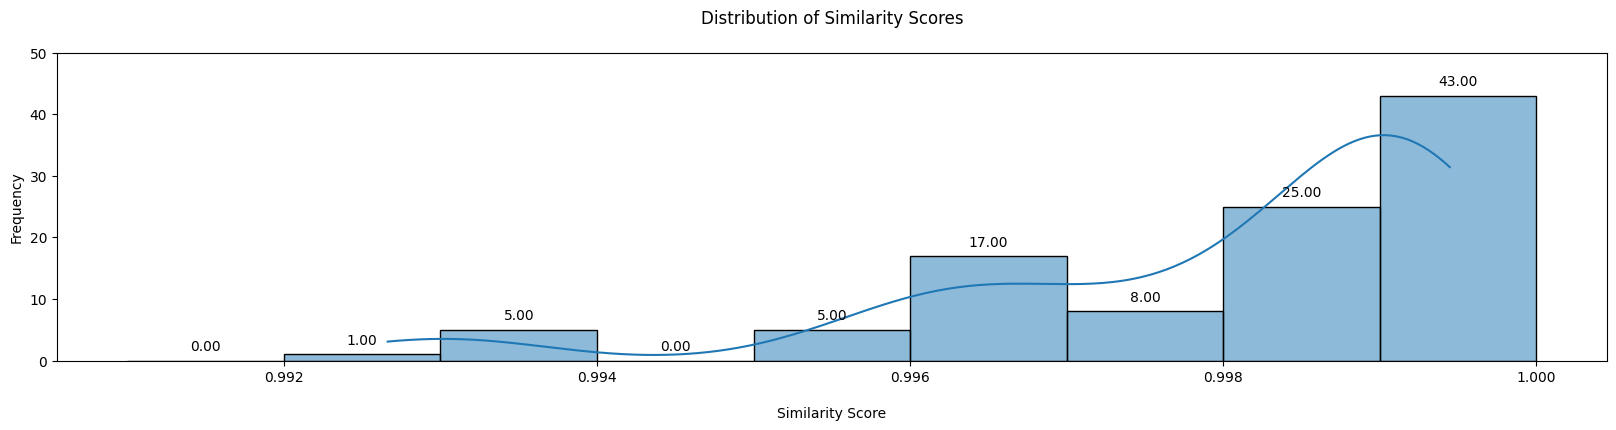

In [ ]:
# Define the bins for the histogram to focus on a specific range of similarity scores
bins_list = np.arange(0.991, 1.000, 0.001).round(3)

# Create a figure with specified size
plt.figure(figsize=(20, 4))

# Plot the histogram of similarity scores with a kernel density estimate (KDE)
ax = sns.histplot(data=df_recommendations_fasttext, x='similarity_score', kde=True, bins=bins_list)

# Loop through the bars (patches) in the histogram and annotate their heights
for p in ax.patches:
    ax.annotate(
        f'{p.get_height():.2f}',  # Format the height of the bar as a string with two decimals
        (p.get_x() + p.get_width() / 2., p.get_height()),  # Position the annotation at the center-top of each bar
        ha='center', va='center',  # Align horizontally and vertically at the center
        xytext=(0, 10),  # Offset the text vertically by 10 points
        textcoords='offset points'  # Specify the text offset in points
    )

# Set the title of the plot
plt.title("Distribution of Similarity Scores\n")

# Label the x-axis
plt.xlabel("\nSimilarity Score")

# Label the y-axis
plt.ylabel("Frequency")

# Set the limit for the y-axis to control the maximum frequency shown
plt.ylim(0, 50)

# Display the plot
plt.show()


we set similarity thresholds for FastText-based and transformer-based recommendations.

In [ ]:
threshold = 0.9991  # Set a high similarity threshold for the FastText-based recommendations

##### **Assigning Supervisor Signals for FastText Recommendations**

Next, we create a column to indicate whether a similarity score meets or exceeds the threshold.

In [ ]:
# Add a column to indicate if a similarity score meets or exceeds the threshold (1 for yes, 0 for no)
df_recommendations_fasttext['Supervisor_Signal'] = df_recommendations_fasttext['similarity_score'].apply(
    lambda x: 1 if x >= threshold else 0
)  # Apply a lambda function to assign the signal based on the threshold

##### **Counting Supervisor Signals for FastText Recommendations**

We then count the number of recommendations with a supervisor signal.


In [ ]:
# Count the number of recommendations flagged with a "Supervisor_Signal"
df_recommendations_fasttext['Supervisor_Signal'].value_counts()  # Count and display the occurrences of 0s and 1s

Supervisor_Signal
0    68
1    36
Name: count, dtype: int64

##### **Setting Similarity Thresholds for Transformer-Based Recommendations**

Next, we set a lower similarity threshold for transformer-based recommendations.

In [ ]:
threshold = 0.8  # Set a lower similarity threshold for the transformer-based recommendations

##### **Assigning Supervisor Signals for Transformer-Based Recommendations**

We create a column to indicate whether a similarity score meets or exceeds the threshold.

In [ ]:
# Add a column to indicate if a similarity score meets or exceeds the threshold (1 for yes, 0 for no)
df_recommendations_transformer['Supervisor_Signal'] = df_recommendations_transformer['similarity_score'].apply(
    lambda x: 1 if x >= threshold else 0
)  # Apply a lambda function to assign the signal based on the threshold

# Count the number of recommendations flagged with a "Supervisor_Signal"
df_recommendations_transformer['Supervisor_Signal'].value_counts()  # Count and display the occurrences of 0s and 1s

# Display the first few rows of the transformer-based recommendations with the added "Supervisor_Signal" column
df_recommendations_transformer.head()  # Show the first few rows to inspect the structure and values

# Remove the "Supervisor_Signal" column from the transformer-based recommendations
recommendations_transformer = df_recommendations_transformer.drop(columns=['Supervisor_Signal'])  # Drop the signal column

# Display the first few rows of the modified transformer-based recommendations
recommendations_transformer.head()  # Show the first few rows to ensure the column was removed correctly


job_title                    location  \
48  Aspiring Human Resources Specialist  Greater New York City Area   
35  Aspiring Human Resources Specialist  Greater New York City Area   
5   Aspiring Human Resources Specialist  Greater New York City Area   
23  Aspiring Human Resources Specialist  Greater New York City Area   
59  Aspiring Human Resources Specialist  Greater New York City Area   

   connection                          job_title_tokens  \
48          1  [Aspiring, Human, Resources, Specialist]   
35          1  [Aspiring, Human, Resources, Specialist]   
5           1  [Aspiring, Human, Resources, Specialist]   
23          1  [Aspiring, Human, Resources, Specialist]   
59          1  [Aspiring, Human, Resources, Specialist]   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                       job_title_embedding  \
48  [-0.0020921852, 0.0040473705, 0.0027973852, 0.0026652245, -0.0019447521, -0.005989425, 0.0029002724, 0.0073241265, -0.004890063, -0.005830184, 0.001789548, -0.0028898069, -0.0051748795, 0.00063079473, 0.00061470264, -0.0022502937, 0.0004172754, -0.0011368473, -0.004987378, -0.005907831, -0.0009401351, -0.0020474843, 0.0064055617, -0.0026110716, -0.0011027169, -0.0029601478, -0.002827147, 0.0016346569, -0.0013939827, 0.00253465, 0.0017087444, -0.0054150843, 0.0013989516, -0.0060020625, 0.00016585963, 0.0032999287, 0.005721286, 0.0012428723, 0.0016713652, -0.0015954177, -6.953045e-05, -0.003145694, -0.005693531, 6.666593e-05, -0.0010195815, 0.0003283664, 0.0013520945, 0.0037454753, 0.0013030522, 0.0049322825, 0.0016323186, -0.0048226723, 0.0024903568, 0.0039040316, -0.002226077, 0.0016252978, 0.006343886, -0.00049483066, -0.0037519138, 0.0018149201, 4.0617306e-05, 0.0011026026, 0.0005215038, -0.005793709, -0.00035844475, 0.004854425, 0.004242922, 0.0031597437, -0.0033796579, 0.001128216, 5.0621864e-05, 0.0037927884, 0.004005323, 0.0017942756, 0.0020388192, 0.0020841733, -0.003723988, 0.0022972936, -0.00012620393, -0.0034515867, -0.0015885802, 0.0025283801, 0.0015114527, -0.0021495486, 0.00022892992, -0.002197573, -0.0006785801, -0.0024918045, 0.0020103373, 0.0027388628, 0.0048799943, 0.0011545286, -0.002534673, -0.001735125, 0.006834711, 0.0020811576, -0.0030821399, -0.005465798, -0.0029780902, 0.00034090522]   
35  [-0.0020921852, 0.0040473705, 0.0027973852, 0.0026652245, -0.0019447521, -0.005989425, 0.0029002724, 0.0073241265, -0.004890063, -0.005830184, 0.001789548, -0.0028898069, -0.0051748795, 0.00063079473, 0.00061470264, -0.0022502937, 0.0004172754, -0.0011368473, -0.004987378, -0.005907831, -0.0009401351, -0.0020474843, 0.0064055617, -0.0026110716, -0.0011027169, -0.002

To ensure that the model prioritizes correctly the *Supervisor Signal*, we will apply a manuality to increase such records by +0.3 .

In [ ]:
# Iterate over each row in the FastText recommendations DataFrame
for index, row in df_recommendations_fasttext.iterrows():  # Loop through rows with their indices
    if row['Supervisor_Signal'] == 1:  # Check if the "Supervisor_Signal" column equals 1
        # Increase the similarity score by 0.4 for flagged rows in the FastText DataFrame
        df_recommendations_fasttext.at[index, 'similarity_score'] += 0.4
        # Similarly, increase the similarity score by 0.4 for the corresponding rows in the transformer DataFrame
        df_recommendations_transformer.at[index, 'similarity_score'] += 0.4

# Display the first 104 rows of the transformer-based recommendations DataFrame for inspection
df_recommendations_transformer.head(104)  # Show the specified number of rows to validate the updates


<ipython-input-114-7c6056d7826f>:5: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '1.3994466304779052' has dtype incompatible with float32, please explicitly cast to a compatible dtype first.
  df_recommendations_fasttext.at[index, 'similarity_score'] += 0.4
<ipython-input-114-7c6056d7826f>:7: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '1.3486647844314574' has dtype incompatible with float32, please explicitly cast to a compatible dtype first.
  df_recommendations_transformer.at[index, 'similarity_score'] += 0.4


job_title  \
48                                                                                     Aspiring Human Resources Specialist   
35                                                                                     Aspiring Human Resources Specialist   
5                                                                                      Aspiring Human Resources Specialist   
23                                                                                     Aspiring Human Resources Specialist   
59                                                                                     Aspiring Human Resources Specialist   
32                                                                                   Aspiring Human Resources Professional   
2                                                                                    Aspiring Human Resources Professional   
57                                                                                   Aspiring Human Resources Professional   
20                                                                                   Aspiring Human Resources Professional   
45                                                                                   Aspiring Human Resources Professional   
96                                                                                   Aspiring Human Resources Professional   
16                                                                                   Aspiring Human Resources Professional   
73                                                                                            Human Resources Professional   
81                                            Aspiring Human Resources Professional | An energetic and Team-Focused Leader   
98                                                                                        Seeking Human Resources Position   
99   Aspiring Human Resources Manager | Graduating May 2020 | Seeking an Entry-Level Human Resources Position in St. Louis   
87                                                                                        Human Resources Management Major   
9                                                                    Seeking Human Resources HRIS and Generalist Positions   
61                                                                   Seeking Human Resources HRIS and Generalist Positions   
39                                                                   Seeking Human Resources HRIS and Generalist Positions   
52                                                                   Seeking Human Resources HRIS and Generalist Positions   
66                                                                   Human Resources, Staffing and Recruiting Professional   
49                                                       Student at Humber College and Aspiring Human Resources Generalist   
8                                                        Student at Humber College and Aspiring Human Resources Generalist   
51                                                       Student at Humber College and Aspiring Human Resources Generalist   
6                                                        Student at Humber College and Aspiring Human Resources Generalist   
24                                                       Student at Humber College and Aspiring Human Resources Generalist   
38                                                       Student at Humber College and Aspiring Human Resources Generalist   
36                                                       Student at Humber College and Aspiring Human Resources Generalist   
71                                                          Business Management Major and Aspiring Human Resources Manager   
27                                                                                   Seeking Human Resources Opportunities   
29                                                                               

We will set up the dataframe for the following for the following RankNet and LambdaRank processes.

In [ ]:
# Remove duplicate rows from the transformer-based recommendations DataFrame
df_recommendations_transformer_nodup = df_recommendations_transformer.drop_duplicates(
    subset=['job_title', 'location', 'connection'],  # Specify the columns to check for duplicate rows
    keep='first'  # Retain only the first occurrence of each duplicate entry
)  # Generate a new DataFrame excluding duplicates based on the defined columns

# Remove duplicate rows from the FastText-based recommendations DataFrame
df_recommendations_fasttext_nodup = df_recommendations_fasttext.drop_duplicates(
    subset=['job_title', 'location', 'connection'],  # Specify the columns to identify duplicates
    keep='first'  # Retain the first occurrence of duplicates
)  # Create a new DataFrame without duplicates based on the selected columns


In [ ]:
# Count the occurrences of each value in the "Supervisor_Signal" column of the transformer-based recommendations DataFrame without duplicates
df_recommendations_transformer_nodup['Supervisor_Signal'].value_counts()  # Display the count of 0s and 1s in the column

Supervisor_Signal
0    47
1     6
Name: count, dtype: int64

In [ ]:
# Count the occurrences of each value in the "Supervisor_Signal" column of the FastText-based recommendations DataFrame
df_recommendations_fasttext['Supervisor_Signal'].value_counts()  # Display the count of 0s and 1s in the column

Supervisor_Signal
0    68
1    36
Name: count, dtype: int64

We will count the number of positive "Supervisor Signal"

In [ ]:
# Count the occurrences of each value in the "Supervisor_Signal" column of the FastText-based recommendations DataFrame without duplicates
df_recommendations_fasttext_nodup['Supervisor_Signal'].value_counts()  # Display the count of 0s and 1s in the column

Supervisor_Signal
0    40
1    13
Name: count, dtype: int64

In [ ]:
# Display the first few rows of the FastText-based recommendations DataFrame without duplicates
df_recommendations_fasttext_nodup.head()  # Show the structure and content of the DataFrame

job_title  \
2                                                                      Aspiring Human Resources Professional   
96                                                                     Aspiring Human Resources Professional   
65                                      Experienced Retail Manager and aspiring Human Resources Professional   
5                                                                        Aspiring Human Resources Specialist   
0   2019 C.T. Bauer College of Business Graduate (Magna Cum Laude) and aspiring Human Resources professional   

                               location connection  similarity_score  \
2   Raleigh-Durham, North Carolina Area         44          1.399447   
96                 Kokomo, Indiana Area         71          1.399447   
65                   Austin, Texas Area         57          1.399342   
5            Greater New York City Area          1          1.399334   
0                        Houston, Texas         85          1.399255   

    Supervisor_Signal  
2                   1  
96                  1  
65                  1  
5                   1  
0                   1

In [ ]:
# Merge the FastText job title embeddings DataFrame with the non-duplicate recommendations DataFrame
df_job_title_embeddings_fasttext_nodup = pd.merge(
    df_job_title_embeddings_fasttext,  # Original embeddings DataFrame
    df_recommendations_fasttext_nodup[['Supervisor_Signal']],  # Non-duplicate recommendations with 'Supervisor_Signal'
    left_index=True,  # Use the index from the embeddings DataFrame
    right_index=True,  # Match it with the index from the recommendations DataFrame
    how='inner'  # Perform an inner join to keep only matching rows
)

# Display the first few rows of the merged DataFrame
df_job_title_embeddings_fasttext_nodup.head()  # Show the structure and content of the new DataFrame

0         1         2         3         4         5         6  \
0 -0.034115  0.016186 -0.035704  0.003416  0.021571 -0.012899 -0.000920   
1 -0.030496  0.015246 -0.032225  0.002293  0.019869 -0.010030 -0.000389   
2 -0.050281  0.024907 -0.054075  0.005074  0.031612 -0.018440 -0.000774   
3 -0.018879  0.009810 -0.021335  0.001916  0.013132 -0.006449  0.000093   
4 -0.017260  0.008967 -0.018826  0.002162  0.011639 -0.005252  0.000251   

          7         8         9        10        11        12        13  \
0  0.017536  0.015127  0.020636  0.003011  0.017766  0.025404  0.001886   
1  0.014712  0.013662  0.018313  0.002362  0.016522  0.022040  0.001628   
2  0.025451  0.023017  0.030587  0.003697  0.026129  0.037336  0.003084   
3  0.009211  0.008652  0.012182  0.001831  0.010702  0.014729  0.000664   
4  0.008514  0.007957  0.010888  0.000889  0.009301  0.013115  0.001123   

         14        15        16        17        18        19        20  \
0 -0.016791  0.011917  0.002788  0.013452 -0.009918 -0.018211  0.001997   
1 -0.013844  0.010080  0.001016  0.012044 -0.008075 -0.016232  0.001941   
2 -0.024610  0.017388  0.004556  0.019949 -0.014778 -0.026638  0.002423   
3 -0.008810  0.006042  0.000560  0.007436 -0.004362 -0.010203  0.001254   
4 -0.008072  0.004595  0.000721  0.007029 -0.004115 -0.008829  0.000216   

         21        22        23        24        25        26        27  \
0 -0.003467  0.010006 -0.043812  0.000561 -0.002149  0.028752  0.009923   
1 -0.002785  0.009137 -0.038650  0.000797 -0.002049  0.025725  0.008535   
2 -0.005574  0.015172 -0.066078  0.000382 -0.004227  0.043404  0.015433   
3 -0.001944  0.005037 -0.024297  0.000867 -0.001277  0.015714  0.006381   
4 -0.002499  0.004950 -0.022531  0.000645 -0.001262  0.013944  0.006406   

         28        29        30        31        32        33        34  \
0  0.006120  0.023363  0.001137 -0.012732 -0.025905 -0.014986 -0.008689   
1  0.005527  0.020616  0.001516 -0.010859 -0.023804 -0.012993 -0.007961   
2  0.010384  0.034903  0.002248 -0.019262 -0.039181 -0.022997 -0.013453   
3  0.002830  0.012569  0.000864 -0.006573 -0.014563 -0.008060 -0.005110   
4  0.002850  0.010755  0.001461 -0.006242 -0.013261 -0.007265 -0.004870   

         35        36        37        38        39        40        41  \
0 -0.006656  0.028618 -0.003960 -0.014591 -0.009582  0.012105  0.003766   
1 -0.005408  0.026268 -0.003776 -0.012911 -0.010062  0.010494  0.003338   
2 -0.010306  0.042849 -0.006197 -0.020908 -0.014163  0.017594  0.006462   
3 -0.003034  0.016897 -0.003352 -0.008101 -0.006300  0.007102  0.002485   
4 -0.003005  0.014507 -0.002800 -0.007304 -0.005350  0.006718  0.001762   

         42        43        44        45        46        47        48  \
0  0.011477  0.004771 -0.002489 -0.009900  0.007977 -0.003257 -0.007696   
1  0.008775  0.003599 -0.002972 -0.008619  0.008065 -0.003275 -0.005996   
2  0.016765  0.006763 -0.004565 -0.014395  0.011883 -0.004566 -0.011830   
3  0.005550  0.002087 -0.003099 -0.005360  0.005709 -0.002931 -0.003757   
4  0.004406  0.001548 -0.002934 -0.005367  0.005073 -0.002712 -0.003763   

         49        50        51        52        53        54        55  \
0  0.028938 -0.051102  0.003731  0.005687  0.002418  0.001044 -0.008547   
1  0.024354 -0.045946  0.003247  0.005189  0.002303 -0.000320 -0.007843   
2  0.043236 -0.076608  0.006327  0.008518  0.003533  0.001366 -0.012129   
3  0.015566 -0.029593  0.002815  0.003742  0.001101 -0.000720 -0.005664   
4  0.013689 -0.026479  0.001734  0.003396  0.001159 -0.000432 -0.003992   

         56        57        58        59        60        61        62  \
0  0.000748 -0.001700  0.008067  0.008015  0.003649  0.013876  0.016179   
1  0.000673 -0.001240  0.007348  0.007472  0.003771  0.012280  0.013495   
2  0.000736 -0.002688  0.012027  0.011470  0.005681  0.021376  0.023004   
3  0.000471  0.000639  0.004956  0.005444  0.002353  0.007974  0.008051   
4  0.000292  0.000948  0.00

In [ ]:
# Reorder the rows of the FastText job title embeddings DataFrame to match the index of the non-duplicate recommendations DataFrame
df_job_title_embeddings_fasttext_nodup = df_job_title_embeddings_fasttext_nodup.reindex(
    df_recommendations_fasttext_nodup.index  # Use the index from the non-duplicate recommendations DataFrame
)

# Display the first few rows of the reordered DataFrame
df_job_title_embeddings_fasttext_nodup.head()  # Show the updated structure and content of the DataFrame


0         1         2         3         4         5         6  \
2  -0.050281  0.024907 -0.054075  0.005074  0.031612 -0.018440 -0.000774   
96 -0.050281  0.024907 -0.054075  0.005074  0.031612 -0.018440 -0.000774   
65 -0.038899  0.019250 -0.041421  0.003286  0.024418 -0.014337 -0.000559   
5  -0.039623  0.019553 -0.042459  0.003699  0.024591 -0.014745 -0.000797   
0  -0.034115  0.016186 -0.035704  0.003416  0.021571 -0.012899 -0.000920   

           7         8         9        10        11        12        13  \
2   0.025451  0.023017  0.030587  0.003697  0.026129  0.037336  0.003084   
96  0.025451  0.023017  0.030587  0.003697  0.026129  0.037336  0.003084   
65  0.019900  0.017441  0.023383  0.003110  0.020257  0.029407  0.002375   
5   0.020094  0.018275  0.024102  0.002526  0.020416  0.029055  0.002589   
0   0.017536  0.015127  0.020636  0.003011  0.017766  0.025404  0.001886   

          14        15        16        17        18        19        20  \
2  -0.024610  0.017388  0.004556  0.019949 -0.014778 -0.026638  0.002423   
96 -0.024610  0.017388  0.004556  0.019949 -0.014778 -0.026638  0.002423   
65 -0.019029  0.013703  0.003515  0.015200 -0.011544 -0.020757  0.002254   
5  -0.019611  0.013283  0.003803  0.016309 -0.011629 -0.020629  0.001700   
0  -0.016791  0.011917  0.002788  0.013452 -0.009918 -0.018211  0.001997   

          21        22        23        24        25        26        27  \
2  -0.005574  0.015172 -0.066078  0.000382 -0.004227  0.043404  0.015433   
96 -0.005574  0.015172 -0.066078  0.000382 -0.004227  0.043404  0.015433   
65 -0.004153  0.012015 -0.051149  0.000316 -0.002933  0.033352  0.011418   
5  -0.004377  0.011964 -0.051938  0.000639 -0.003609  0.034374  0.012585   
0  -0.003467  0.010006 -0.043812  0.000561 -0.002149  0.028752  0.009923   

          28        29        30        31        32        33        34  \
2   0.010384  0.034903  0.002248 -0.019262 -0.039181 -0.022997 -0.013453   
96  0.010384  0.034903  0.002248 -0.019262 -0.039181 -0.022997 -0.013453   
65  0.007721  0.026809  0.001702 -0.014569 -0.029516 -0.017629 -0.010055   
5   0.008474  0.027565  0.001592 -0.015018 -0.030916 -0.018583 -0.010545   
0   0.006120  0.023363  0.001137 -0.012732 -0.025905 -0.014986 -0.008689   

          35        36        37        38        39        40        41  \
2  -0.010306  0.042849 -0.006197 -0.020908 -0.014163  0.017594  0.006462   
96 -0.010306  0.042849 -0.006197 -0.020908 -0.014163  0.017594  0.006462   
65 -0.008060  0.032969 -0.004541 -0.015713 -0.011161  0.014124  0.003902   
5  -0.008035  0.033639 -0.005284 -0.016398 -0.011181  0.014487  0.005709   
0  -0.006656  0.028618 -0.003960 -0.014591 -0.009582  0.012105  0.003766   

          42        43        44        45        46        47        48  \
2   0.016765  0.006763 -0.004565 -0.014395  0.011883 -0.004566 -0.011830   
96  0.016765  0.006763 -0.004565 -0.014395  0.011883 -0.004566 -0.011830   
65  0.013134  0.005782 -0.003276 -0.010906  0.008913 -0.004024 -0.009294   
5   0.013472  0.005295 -0.003584 -0.011149  0.009280 -0.003315 -0.009279   
0   0.011477  0.004771 -0.002489 -0.009900  0.007977 -0.003257 -0.007696   

          49        50        51        52        53        54        55  \
2   0.043236 -0.076608  0.006327  0.008518  0.003533  0.001366 -0.012129   
96  0.043236 -0.076608  0.006327  0.008518  0.003533  0.001366 -0.012129   
65  0.033136 -0.059165  0.004988  0.006667  0.002853  0.000931 -0.009835   
5   0.034328 -0.060265  0.004904  0.006452  0.002893  0.000770 -0.009908   
0   0.028938 -0.051102  0.003731  0.005687  0.002418  0.001044 -0.008547   

          56        57        58        59        60        61        62  \
2   0.000736 -0.002688  0.012027  0.011470  0.005681  0.021376  0.023004   
96  0.000736 -0.002688  0.012027  0.011470  0.005681  0.021376  0.023004   
65  0.000747 -0.001865  0.009559  0.008594  0.003695  0.016269  0.018360   
5   0.000936 -0.002194  0.009222  0.009181  0.00470

In [ ]:
# Count the occurrences of each value in the "Supervisor_Signal" column of the reordered FastText job title embeddings DataFrame
df_job_title_embeddings_fasttext_nodup['Supervisor_Signal'].value_counts()  # Display the count of 0s and 1s in the column

Supervisor_Signal
0    40
1    13
Name: count, dtype: int64

In [ ]:
# Count the occurrences of each value in the "Supervisor_Signal" column of the FastText-based recommendations DataFrame without duplicates
df_recommendations_fasttext_nodup['Supervisor_Signal'].value_counts()  # Display the count of 0s and 1s in the column

Supervisor_Signal
0    40
1    13
Name: count, dtype: int64

In [ ]:
# Merge the transformer-based job title embeddings DataFrame with the non-duplicate recommendations DataFrame
df_job_title_embeddings_transformer_nodup = pd.merge(
    df_job_embeddings_transformer,  # Original transformer embeddings DataFrame
    df_recommendations_transformer_nodup[['Supervisor_Signal']],  # Non-duplicate recommendations with 'Supervisor_Signal'
    left_index=True,  # Use the index from the embeddings DataFrame
    right_index=True,  # Match it with the index from the recommendations DataFrame
    how='inner'  # Perform an inner join to keep only matching rows
)

# Drop unnecessary columns from the merged DataFrame
df_job_title_embeddings_transformer_nodup.drop(
    columns=['similarity_score', 'job_title'],  # Specify the columns to remove
    inplace=True  # Modify the DataFrame in place without creating a copy
)

# Display the first few rows of the cleaned and merged DataFrame
df_job_title_embeddings_transformer_nodup.head()  # Show the updated structure


0         1         2         3         4         5         6  \
48 -0.002092  0.004047  0.002797  0.002665 -0.001945 -0.005989  0.002900   
32 -0.002760  0.001583  0.004447 -0.000995 -0.004312 -0.006011  0.002262   
96 -0.002760  0.001583  0.004447 -0.000995 -0.004312 -0.006011  0.002262   
73 -0.000752  0.001335  0.006202  0.001771 -0.002686 -0.007455  0.001488   
81 -0.004749  0.002327  0.000293 -0.001243  0.000199 -0.004252  0.000055   

           7         8         9        10        11        12        13  \
48  0.007324 -0.004890 -0.005830  0.001790 -0.002890 -0.005175  0.000631   
32  0.006922 -0.004677 -0.006901  0.002655 -0.004485 -0.002542  0.000123   
96  0.006922 -0.004677 -0.006901  0.002655 -0.004485 -0.002542  0.000123   
73  0.007850 -0.004036 -0.006818  0.005199 -0.005132 -0.000927  0.003319   
81  0.002813 -0.002896 -0.001662  0.002096 -0.000770 -0.001262 -0.002552   

          14        15        16        17        18        19        20  \
48  0.000615 -0.002250  0.000417 -0.001137 -0.004987 -0.005908 -0.000940   
32  0.000069  0.000429  0.001811 -0.000234 -0.003203 -0.005813 -0.000495   
96  0.000069  0.000429  0.001811 -0.000234 -0.003203 -0.005813 -0.000495   
73  0.000980  0.003366  0.004386  0.001606 -0.003433 -0.007036  0.002314   
81  0.001328  0.000854  0.001561 -0.001624 -0.000652 -0.003571  0.000399   

          21        22        23        24        25        26        27  \
48 -0.002047  0.006406 -0.002611 -0.001103 -0.002960 -0.002827  0.001635   
32 -0.000545  0.007851 -0.001332 -0.000275  0.000171 -0.001240 -0.000938   
96 -0.000545  0.007851 -0.001332 -0.000275  0.000171 -0.001240 -0.000938   
73 -0.000505  0.007710 -0.004330  0.002045  0.001431 -0.002631  0.001989   
81 -0.001822  0.004479 -0.000026 -0.004239  0.001700 -0.000490 -0.000364   

          28        29        30        31        32        33        34  \
48 -0.001394  0.002535  0.001709 -0.005415  0.001399 -0.006002  0.000166   
32 -0.000595  0.003399  0.001461 -0.003358  0.003531 -0.004171  0.001720   
96 -0.000595  0.003399  0.001461 -0.003358  0.003531 -0.004171  0.001720   
73 -0.001222  0.002336 -0.000014 -0.001544  0.006176 -0.002727  0.002329   
81 -0.000066 -0.000165  0.001122  0.000824 -0.001080 -0.002068  0.002386   

          35        36        37        38        39        40        41  \
48  0.003300  0.005721  0.001243  0.001671 -0.001595 -0.000070 -0.003146   
32  0.004208  0.006092  0.000810  0.002079 -0.000203  0.001638 -0.002949   
96  0.004208  0.006092  0.000810  0.002079 -0.000203  0.001638 -0.002949   
73  0.002428  0.006094 -0.000595  0.001099  0.000898 -0.001001 -0.001418   
81  0.003628  0.002800 -0.000765  0.000304  0.000850  0.000959 -0.004288   

          42        43        44        45        46        47        48  \
48 -0.005694  0.000067 -0.001020  0.000328  0.001352  0.003745  0.001303   
32 -0.007722  0.000071 -0.002180 -0.000898 -0.001699  0.003356 -0.000031   
96 -0.007722  0.000071 -0.002180 -0.000898 -0.001699  0.003356 -0.000031   
73 -0.007875  0.000838 -0.002725 -0.000113 -0.001997  0.001996  0.000120   
81 -0.004216 -0.000710  0.000670 -0.002223 -0.001076  0.002800 -0.000813   

          49        50        51        52        53        54        55  \
48  0.004932  0.001632 -0.004823  0.002490  0.003904 -0.002226  0.001625   
32  0.002950 -0.000394 -0.003802 -0.000989  0.003284  0.000376  0.001681   
96  0.002950 -0.000394 -0.003802 -0.000989  0.003284  0.000376  0.001681   
73  0.004404 -0.001485 -0.002250 -0.003936  0.001595  0.003692  0.001425   
81  0.001137  0.000493  0.000296  0.001265 -0.000219 -0.001058 -0.000936   

          56        57        58        59        60        61        62  \
48  0.006344 -0.000495 -0.003752  0.001815  0.000041  0.001103  0.000522   
32  0.004776 -0.002348 -0.001537  0.003456 -0.002612  0.000025  0.000817   
96  0.004776 -0.002348 -0.001537  0.003456 -0.002612  0.000025  0.000817   
73  0.003039 -0.000577  0.000359  0.007160 -0.00629

In [ ]:
# Reorder the rows of the transformer-based recommendations DataFrame to match the index of the transformer embeddings DataFrame
df_recommendations_transformer_nodup = df_recommendations_transformer_nodup.reindex(
    df_job_title_embeddings_transformer_nodup.index  # Use the index from the transformer embeddings DataFrame
)

# Save the updated index of the transformer recommendations DataFrame
df_recommendations_transformer_nodup_index = df_recommendations_transformer_nodup.index  # Store the new index for later use

# Display the first few rows of the reordered transformer recommendations DataFrame
df_recommendations_transformer_nodup.head()  # Show the structure and content of the updated DataFrame


job_title  \
48                                           Aspiring Human Resources Specialist   
32                                         Aspiring Human Resources Professional   
96                                         Aspiring Human Resources Professional   
73                                                  Human Resources Professional   
81  Aspiring Human Resources Professional | An energetic and Team-Focused Leader   

                               location connection  \
48           Greater New York City Area          1   
32  Raleigh-Durham, North Carolina Area         44   
96                 Kokomo, Indiana Area         71   
73                  Greater Boston Area         16   
81                   Austin, Texas Area        174   

                                                                           job_title_tokens  \
48                                                 [Aspiring, Human, Resources, Specialist]   
32                                               [Aspiring, Human, Resources, Professional]   
96                                               [Aspiring, Human, Resources, Professional]   
73                                                         [Human, Resources, Professional]   
81  [Aspiring, Human, Resources, Professional, |, An, energetic, and, Team-Focused, Leader]   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                job_title_embedding  \
48                           [-0.0020921852, 0.0040473705, 0.0027973852, 0.0026652245, -0.0019447521, -0.005989425, 0.0029002724, 0.0073241265, -0.004890063, -0.005830184, 0.001789548, -0.0028898069, -0.0051748795, 0.00063079473, 0.00061470264, -0.0022502937, 0.0004172754, -0.0011368473, -0.004987378, -0.005907831, -0.0009401351, -0.0020474843, 0.0064055617, -0.0026110716, -0.0011027169, -0.0029601478, -0.002827147, 0.0016346569, -0.0013939827, 0.00253465, 0.0017087444, -0.0054150843, 0.0013989516, -0.0060020625, 0.00016585963, 0.0032999287, 0.005721286, 0.0012428723, 0.0016713652, -0.0015954177, -6.953045e-05, -0.003145694, -0.005693531, 6.666593e-05, -0.0010195815, 0.0003283664, 0.0013520945, 0.0037454753, 0.0013030522, 0.0049322825, 0.0016323186, -0.0048226723, 0.0024903568, 0.0039040316, -0.002226077, 0.0016252978, 0.006343886, -0.00049483066, -0.0037519138, 0.0018149201, 4.0617306e-05, 0.0011026026, 0.0005215038, -0.005793709, -0.00035844475, 0.004854425, 0.004242922, 0.0031597437, -0.0033796579, 0.001128216, 5.0621864e-05, 0.0037927884, 0.004005323, 0.0017942756, 0.0020388192, 0.0020841733, -0.003723988, 0.0022972936, -0.00012620393, -0.0034515867, -0.0015885802, 0.0025283801, 0.001

In [ ]:
# Count the occurrences of each value in the "Supervisor_Signal" column of the transformer-based job title embeddings DataFrame without duplicates
df_job_title_embeddings_transformer_nodup['Supervisor_Signal'].value_counts()  # Display the count of 0s and 1s in the column

Supervisor_Signal
0    47
1     6
Name: count, dtype: int64

In [ ]:
df_recommendations_transformer_nodup['Supervisor_Signal'].value_counts() #df_recommendations_fasttext_nodup

Supervisor_Signal
0    47
1     6
Name: count, dtype: int64

Now that we have arranged the dataset, we will proceed with the ranking methods.

## **RankNet**

To include the **Supervisor Signal** in the analysis, it will be kept as a new feature throughout the process.

##### **Defining the RankNet Model Architecture and the Forward Pass of the Model**

In this section, we define the RankNet model architecture using the Keras API.We define the forward pass of the model, which takes input data and returns the output scores or ranking probability. The model architecture can be reviewd in the figure.

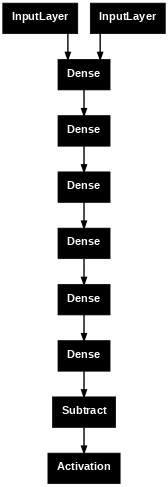

In [ ]:
# Model architecture definition ----> Leaky ReLU is used to avoid dead neurons
class RankNet(Model):  # Define the custom RankNet model class
    def __init__(self):  # Initialize the model components
        super().__init__()  # Call the parent class initializer
        # Define a series of dense layers with Leaky ReLU activation to process input data
        self.dense = [
            layers.Dense(64, activation=leaky_relu),  # First dense layer with 64 units
            layers.Dense(32, activation=leaky_relu),  # Second dense layer with 32 units
            layers.Dense(16, activation=leaky_relu),  # Third dense layer with 16 units
            layers.Dense(8, activation=leaky_relu),   # Fourth dense layer with 8 units
            layers.Dense(4, activation=leaky_relu)    # Fifth dense layer with 4 units
        ]
        # Define the final output layer with a linear activation for regression
        self.o = layers.Dense(1, activation='linear')
        # Define a subtraction layer for comparing relevance scores
        self.oi_minus_oj = layers.Subtract()

    def call(self, inputs, return_scores=False):  # Define the forward pass of the model
        xi, xj = inputs  # Split the input into xi and xj for pairwise ranking
        # Pass xi and xj through the first dense layer
        densei = self.dense[0](xi)
        densej = self.dense[0](xj)
        # Pass xi and xj through the remaining dense layers
        for dense in self.dense[1:]:
            densei = dense(densei)
            densej = dense(densej)
        # Compute the output scores for xi and xj
        oi = self.o(densei)
        oj = self.o(densej)
        if return_scores:  # If raw scores are requested
            return oi, oj  # Return the scores for xi and xj
        else:  # Otherwise, compute the ranking probability
            oij = self.oi_minus_oj([oi, oj])  # Compute the difference between scores
            output = layers.Activation('sigmoid')(oij)  # Apply sigmoid activation for ranking probability
            return output  # Return the ranking probability

    def build_graph(self):  # Build a model graph for visualization
        # Define input tensors with shape (101,), where 101 includes features + supervisor signal
        x = [Input(shape=(101,)), Input(shape=(101,))]
        return Model(inputs=x, outputs=self.call(x))  # Return a complete model for visualization

# Visualize the model architecture
plot_model(
    RankNet().build_graph(),  # Build the model graph for visualization
    dpi=50,  # Set the resolution of the plot
    to_file='model.png',  # Save the plot as an image file
    show_shapes=False  # Do not display shapes of the layers
)

##### **Generating Pairwise Data for Training a Ranking Model**

In this section, we generate pairwise data for training a ranking model. We start by importing the necessary modules and defining empty lists to store the pairwise data.

In [ ]:
import random  # Import the random module for shuffling and randomization

# Initialize empty lists to store pairwise data
xi = []  # Features for document i
xj = []  # Features for document j
pij = []  # Pairwise preference labels (probabilities)
pair_id = []  # List of unique pair IDs
pair_query_id = []  # Query ID for each pair
xi_indices = []  # Indices of document i
xj_indices = []  # Indices of document j

##### **Selecting Features for Ranking**

We select the relevant features for ranking from the FastText recommendations DataFrame.

In [ ]:
# Select features for ranking from the FastText recommendations DataFrame
doc_features = df_recommendations_fasttext_nodup[['similarity_score', 'Supervisor_Signal']]  # Select relevant features
doc_features_2 = df_recommendations_fasttext_nodup[['job_title', 'similarity_score', 'Supervisor_Signal']]  # Extended set for debugging or exploration

# Define a function to generate random pairs of indices
def generate_random_pairs(indices):
    all_pairs = []  # Initialize a list to store all pairs
    n = len(indices)  # Get the number of indices

    # Create all possible pairs from the given indices
    for i in range(n):
        for j in range(i + 1, n):  # Ensure i < j for unique pairs
            all_pairs.append((indices[i], indices[j]))

    # Shuffle the pairs randomly
    random.shuffle(all_pairs)

    return all_pairs  # Return the shuffled list of pairs

##### **Generating Pairwise Data**

We generate pairwise data by iterating over the random pairs of indices and extracting the features and preference labels.

In [ ]:
# Get the indices of the documents from the DataFrame
query_idx = doc_features.index.tolist()  # Convert the index to a list for consistency

# Generate random pairs from the document indices
random_pairs = generate_random_pairs(query_idx)

# Iterate over the generated random pairs
for pair_idx in random_pairs:
    i, j = pair_idx  # Unpack the indices of the pair

    # Verify that both indices exist in the DataFrame to avoid out-of-range errors
    if i in doc_features.index and j in doc_features.index:
        pair_query_id.append(1)  # Assign a fixed value as we assume a single query
        pair_id.append(pair_idx)  # Store the pair ID for reference
    else:
        print(f"Indices out of range: {i}, {j}")  # Debug message for missing indices

    # Append the features of documents i and j to their respective lists
    xi.append(doc_features.loc[i])  # Add features of document i
    xj.append(doc_features.loc[j])  # Add features of document j

    # Track the indices of document i and j
    xi_indices.append(i)
    xj_indices.append(j)

    # Compare the similarity scores for the pair
    score_i = doc_features.loc[i, 'similarity_score']  # Get similarity score for document i
    score_j = doc_features.loc[j, 'similarity_score']  # Get similarity score for document j

    # Assign pairwise preference labels based on similarity scores
    if score_i == score_j:
        _pij = 0.5  # Assign 0.5 if scores are equal
    elif score_i > score_j:
        _pij = 1  # Assign 1 if i is preferred over j
    else:
        _pij = 0  # Assign 0 if j is preferred over i
    pij.append(_pij)  # Append the preference label to the list


##### **Converting Lists to Numpy Arrays**

We convert the lists to Numpy arrays for efficient computation.

In [ ]:

# Convert the lists to Numpy arrays for efficient computation
xi = np.array(xi)  # Convert xi to a Numpy array
xj = np.array(xj)  # Convert xj to a Numpy array
pij = np.array(pij)  # Convert pij to a Numpy array
pair_query_id = np.array(pair_query_id)  # Convert pair_query_id to a Numpy array


##### **Splitting Data into Training and Test Sets**

We split the data into training and test sets for model training and evaluation.

In [ ]:
# Split the data into training and test sets for model training and evaluation
xi_train, xi_test, xj_train, xj_test, pij_train, pij_test, xi_train_indices, xi_test_indices, xj_train_indices, xj_test_indices, pair_id_train, pair_id_test = train_test_split(
    xi, xj, pij, xi_indices, xj_indices, pair_id,  # Data to split
    test_size=0.3,  # Set 30% of data for testing
    stratify=pair_query_id,  # Stratify by query ID to ensure balanced splits
    random_state=seed  # Set a random seed for reproducibility
)


##### **Implementing EarlyStopping in Keras**



In this block, we implement the EarlyStopping technique in Keras to stop training when the validation loss does not improve for a set number of epochs.

In [ ]:
# Keras EarlyStopping ----> Stops training when validation loss does not improve for a set number of epochs
from keras.callbacks import EarlyStopping  # Import EarlyStopping callback from Keras

# Define the EarlyStopping callback
early_stopping = EarlyStopping(
    monitor='val_loss',  # Monitor the validation loss during training
    patience=10,  # Stop training if validation loss does not improve for 10 consecutive epochs
    restore_best_weights=True  # Restore the model weights from the epoch with the lowest validation loss
)

##### **Initializing and Compiling the RankNet Model**

Next, we initialize and compile the RankNet model with the RMSProp optimizer and binary cross-entropy loss function.

In [ ]:
# Initialize the RankNet model
ranknet = RankNet()  # Create an instance of the RankNet model

# Compile the model with the optimizer and loss function
ranknet.compile(
    optimizer='RMSProp',  # Use the RMSProp optimizer for gradient descent
    loss='binary_crossentropy'  # Use binary crossentropy as the loss function for ranking probabilities
)

##### **Training the Model with EarlyStopping**

Finally, we train the model using the fit method and include the EarlyStopping callback to stop training when the validation loss does not improve.

In [ ]:
# Train the model using the fit method
history = ranknet.fit(
    [xi_train, xj_train], pij_train,  # Provide training inputs (xi, xj) and labels (pij)
    epochs=200,  # Train for a maximum of 200 epochs
    batch_size=64,  # Use a batch size of 64 for training
    validation_data=([xi_test, xj_test], pij_test),  # Provide validation data for evaluation during training
    callbacks=[early_stopping],  # Include the EarlyStopping callback to monitor training
    verbose=0  # Suppress detailed output during training
)

##### **Plotting Training and Validation Metrics**

In this section, we define a function plot_metrics to visualize the training and validation metrics during the model training process.

In [ ]:
# Function for plotting training and validation metrics
def plot_metrics(train_metric, val_metric=None, metric_name=None, title=None, ylim=5):
    plt.title(title)  # Set the title of the plot
    plt.ylim(0, ylim)  # Set the y-axis limits to control the scale of the plot
    plt.plot(train_metric, color='blue', label=metric_name)  # Plot the training metric in blue
    if val_metric is not None:  # Check if validation metric is provided
        plt.plot(val_metric, color='green', label='val_' + metric_name)  # Plot validation metric in green
    plt.legend(loc="upper right")  # Add a legend in the upper-right corner of the plot

##### **Visualizing Loss History During Training**

We use the plot_metrics function to visualize the loss history during the training process.
This plot provides valuable insights into the model's performance during training, allowing us to:
* Monitor the training loss and validation loss over time
* Identify potential overfitting or underfitting issues
* Adjust hyperparameters or training strategies to improve model performance

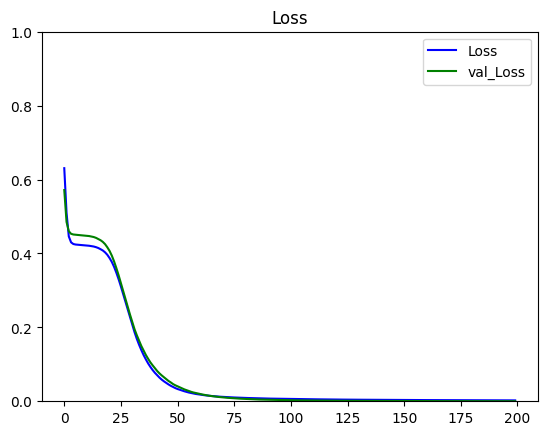

In [ ]:
# Plot the loss history from the training process
plot_metrics(
    history.history['loss'],  # Training loss values
    history.history['val_loss'],  # Validation loss values
    metric_name="Loss",  # Label for the training metric
    title="Loss",  # Title of the plot
    ylim=1.0  # Set the y-axis limit to focus on relevant loss values
)


In [ ]:
# Display the first 100 rows of the extended document features DataFrame
doc_features_2.head(100)  # Show the first 100 rows to inspect the structure and content

job_title  \
2                                                                                    Aspiring Human Resources Professional   
96                                                                                   Aspiring Human Resources Professional   
65                                                    Experienced Retail Manager and aspiring Human Resources Professional   
5                                                                                      Aspiring Human Resources Specialist   
0                 2019 C.T. Bauer College of Business Graduate (Magna Cum Laude) and aspiring Human Resources professional   
72                                                Aspiring Human Resources Manager, seeking internship in Human Resources.   
66                                                                   Human Resources, Staffing and Recruiting Professional   
75   Aspiring Human Resources Professional | Passionate about helping to create an inclusive and engaging work environment   
71                                                          Business Management Major and Aspiring Human Resources Manager   
6                                                        Student at Humber College and Aspiring Human Resources Generalist   
26                                                       Aspiring Human Resources Management student seeking an internship   
27                                                                                   Seeking Human Resources Opportunities   
93                                                  Seeking Human  Resources Opportunities. Open to travel and relocation.   
73                                                                                            Human Resources Professional   
74                    Nortia Staffing is seeking Human Resources, Payroll & Administrative Professionals!!  (408) 709-2621   
98                                                                                        Seeking Human Resources Position   
9                                                                    Seeking Human Resources HRIS and Generalist Positions   
78                                                                   Liberal Arts Major. Aspiring Human Resources Analyst.   
81                                            Aspiring Human Resources Professional | An energetic and Team-Focused Leader   
84                                                      RRP Brand Portfolio Executive at JTI (Japan Tobacco International)   
99   Aspiring Human Resources Manager | Graduating May 2020 | Seeking an Entry-Level Human Resources Position in St. Louis   
1                                                                Native English Teacher at EPIK (English Program in Korea)   
83                                                       Human Resources professional for the world leader in GIS software   
92                                                        Admissions Representative at Community medical center long beach   
91                                                Seeking employment opportunities within Customer Service or Patient Care   
69                          Retired Army National Guard Recruiter, office manager,  seeking a position in Human Resources.   
87                                                                                        Human Resources Management Major   
68                                                              Director of Human Resources North America, Groupe Beneteau   
80                                                           Senior Human Resources Business Partner at Heil Environmental   
12                                                        Human Resources Coordinator at InterContinental Buckhead Atlanta   
85                                    Information Systems Specialist and Programmer with a love for data and organization.   
67                                                                               

##### **Calculating Relevance Scores and Ranking Recommendations**

In this section, we calculate the relevance scores for each document using the trained RankNet model and rank the recommendations based on these scores.

In [ ]:
# Initialize an empty list to store relevance scores
relevance_scores = []

# Create a dummy input array with the same shape as xi for the second input to the model
oj = np.zeros_like(xi)  # Initialize with zeros as the model expects two inputs

# Iterate over the indices of the document features DataFrame
for i in doc_features.index:  # 'i' represents the original index of the DataFrame
    xi = doc_features.loc[[i]]  # Select the row corresponding to index 'i' and retain DataFrame format
    relevance_score_xi, _ = ranknet.call([xi, oj], return_scores=True)  # Get the relevance score for xi from the model

    # Append the original index and relevance score to the list
    relevance_scores.append((i, relevance_score_xi.numpy().flatten()[0]))


##### **Creating a DataFrame with Relevance Scores**

We convert the list of tuples into a DataFrame and set the original index.

In [ ]:
# Convert the list of tuples into a DataFrame
df_relevance_scores = pd.DataFrame(relevance_scores, columns=['original_index', 'relevance_score'])

# Set the original index of the relevance scores DataFrame
df_relevance_scores.set_index('original_index', inplace=True)

##### **Sorting and Merging Relevance Scores with Additional Features**

We sort the relevance scores in descending order and merge them with additional features from *doc_features_2.*

In [ ]:
# Sort the relevance scores in descending order
df_relevance_scores = df_relevance_scores.sort_values(by='relevance_score', ascending=False)

# Merge the relevance scores with additional features from doc_features_2
df_relevance_scores = pd.merge(
    df_relevance_scores,  # Relevance scores DataFrame
    doc_features_2[['job_title', 'similarity_score']],  # Features to merge
    left_index=True,  # Use the index from the relevance scores DataFrame
    right_index=True,  # Use the index from the document features DataFrame
    how='left'  # Perform a left join
)

##### **Merging Relevance Scores with FastText Recommendations**

We merge the relevance scores with the FastText recommendations DataFrame.

In [ ]:
# Create a copy of the FastText recommendations DataFrame
df_recommendations_fasttext_temp = df_recommendations_fasttext.copy()

# Add a column with the original index to the temporary recommendations DataFrame
df_recommendations_fasttext_temp['original_index'] = df_recommendations_fasttext.index

# Merge the temporary recommendations DataFrame with the relevance scores DataFrame
ranknet_ranking = pd.merge(
    df_recommendations_fasttext_temp,  # Temporary recommendations DataFrame
    df_relevance_scores,  # Relevance scores DataFrame
    on=['job_title', 'similarity_score'],  # Merge on job title and similarity score
    how='left'  # Perform a left join
)

##### **Finalizing the Ranked Recommendations DataFrame**

We restore the original index, remove duplicate indices, and display the first 104 rows of the final ranked recommendations DataFrame.

In [ ]:

# Restore the original index in the merged DataFrame
ranknet_ranking.set_index('original_index', inplace=True)

# Remove duplicate indices from the merged DataFrame, keeping the first occurrence
ranknet_ranking = ranknet_ranking[~ranknet_ranking.index.duplicated(keep='first')]

# Display the first 104 rows of the final ranked recommendations DataFrame
ranknet_ranking.head(104)

job_title  \
original_index                                                                                                                          
2                                                                                               Aspiring Human Resources Professional   
16                                                                                              Aspiring Human Resources Professional   
20                                                                                              Aspiring Human Resources Professional   
32                                                                                              Aspiring Human Resources Professional   
45                                                                                              Aspiring Human Resources Professional   
57                                                                                              Aspiring Human Resources Professional   
96                                                                                              Aspiring Human Resources Professional   
65                                                               Experienced Retail Manager and aspiring Human Resources Professional   
5                                                                                                 Aspiring Human Resources Specialist   
23                                                                                                Aspiring Human Resources Specialist   
35                                                                                                Aspiring Human Resources Specialist   
48                                                                                                Aspiring Human Resources Specialist   
59                                                                                                Aspiring Human Resources Specialist   
0                            2019 C.T. Bauer College of Business Graduate (Magna Cum Laude) and aspiring Human Resources professional   
13                           2019 C.T. Bauer College of Business Graduate (Magna Cum Laude) and aspiring Human Resources professional   
14                           2019 C.T. Bauer College of Business Graduate (Magna Cum Laude) and aspiring Human Resources professional   
18                           2019 C.T. Bauer College of Business Graduate (Magna Cum Laude) and aspiring Human Resources professional   
30                           2019 C.T. Bauer College of Business Graduate (Magna Cum Laude) and aspiring Human Resources professional   
43                           2019 C.T. Bauer College of Business Graduate (Magna Cum Laude) and aspiring Human Resources professional   
56                           2019 C.T. Bauer College of Business Graduate (Magna Cum Laude) and aspiring Human Resources professional   
72                                                           Aspiring Human Resources Manager, seeking internship in Human Resources.   
66                                                                              Human Resources, Staffing and Recruiting Professional   
75              Aspiring Human Resources Professional | Passionate about helping to create an inclusive and engaging work environment   
71                                                                     Business Management Major and Aspiring Human Resources Manager   
6                                                                   Student at Humber College and Aspiring Human Resources Generalist   
8                                                                   Student at Humber College and Aspiring Human Resources Generalist   
24                                                                  Student at Humber College and Aspiring Human Resources Generalist   
36                                                                  Student at Humber College and Aspiring Human Resources Generalist   
38            

In [ ]:
ranknet_ranking.info()

<class 'pandas.core.frame.DataFrame'>
Index: 104 entries, 2 to 102
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   job_title          104 non-null    object 
 1   location           104 non-null    object 
 2   connection         104 non-null    object 
 3   similarity_score   104 non-null    float64
 4   Supervisor_Signal  104 non-null    int64  
 5   relevance_score    104 non-null    float32
dtypes: float32(1), float64(1), int64(1), object(3)
memory usage: 5.3+ KB


## **LambdaRank (list) Implementation**

### **Pytorch**

##### **Merging FastText Job Title Embeddings with RankNet Ranking**

In this block, we merge the FastText job title embeddings DataFrame with the RankNet ranking DataFrame to create a new DataFrame that integrates the information from both models.

In [ ]:
# Merge the FastText job title embeddings DataFrame with the RankNet ranking DataFrame
df_job_title_embeddings_fasttext_R = pd.merge(
    df_job_title_embeddings_fasttext,  # Original FastText embeddings DataFrame
    ranknet_ranking[['Supervisor_Signal', 'relevance_score']],  # Columns to merge from the RankNet ranking DataFrame
    left_index=True,  # Use the index from the embeddings DataFrame
    right_index=True,  # Use the index from the RankNet ranking DataFrame
    how='left'  # Perform a left join to include all rows from the embeddings DataFrame
)

# Display information about the merged DataFrame
df_job_title_embeddings_fasttext_R.info()  # Shows details such as column names, data types, and memory usage

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104 entries, 0 to 103
Columns: 102 entries, 0 to relevance_score
dtypes: float32(101), int64(1)
memory usage: 42.0 KB


In [ ]:
# Display the first few rows of the merged FastText job title embeddings DataFrame
df_job_title_embeddings_fasttext_R.head()  # Show the structure and content of the DataFrame

0         1         2         3         4         5         6  \
0 -0.034115  0.016186 -0.035704  0.003416  0.021571 -0.012899 -0.000920   
1 -0.030496  0.015246 -0.032225  0.002293  0.019869 -0.010030 -0.000389   
2 -0.050281  0.024907 -0.054075  0.005074  0.031612 -0.018440 -0.000774   
3 -0.018879  0.009810 -0.021335  0.001916  0.013132 -0.006449  0.000093   
4 -0.017260  0.008967 -0.018826  0.002162  0.011639 -0.005252  0.000251   

          7         8         9        10        11        12        13  \
0  0.017536  0.015127  0.020636  0.003011  0.017766  0.025404  0.001886   
1  0.014712  0.013662  0.018313  0.002362  0.016522  0.022040  0.001628   
2  0.025451  0.023017  0.030587  0.003697  0.026129  0.037336  0.003084   
3  0.009211  0.008652  0.012182  0.001831  0.010702  0.014729  0.000664   
4  0.008514  0.007957  0.010888  0.000889  0.009301  0.013115  0.001123   

         14        15        16        17        18        19        20  \
0 -0.016791  0.011917  0.002788  0.013452 -0.009918 -0.018211  0.001997   
1 -0.013844  0.010080  0.001016  0.012044 -0.008075 -0.016232  0.001941   
2 -0.024610  0.017388  0.004556  0.019949 -0.014778 -0.026638  0.002423   
3 -0.008810  0.006042  0.000560  0.007436 -0.004362 -0.010203  0.001254   
4 -0.008072  0.004595  0.000721  0.007029 -0.004115 -0.008829  0.000216   

         21        22        23        24        25        26        27  \
0 -0.003467  0.010006 -0.043812  0.000561 -0.002149  0.028752  0.009923   
1 -0.002785  0.009137 -0.038650  0.000797 -0.002049  0.025725  0.008535   
2 -0.005574  0.015172 -0.066078  0.000382 -0.004227  0.043404  0.015433   
3 -0.001944  0.005037 -0.024297  0.000867 -0.001277  0.015714  0.006381   
4 -0.002499  0.004950 -0.022531  0.000645 -0.001262  0.013944  0.006406   

         28        29        30        31        32        33        34  \
0  0.006120  0.023363  0.001137 -0.012732 -0.025905 -0.014986 -0.008689   
1  0.005527  0.020616  0.001516 -0.010859 -0.023804 -0.012993 -0.007961   
2  0.010384  0.034903  0.002248 -0.019262 -0.039181 -0.022997 -0.013453   
3  0.002830  0.012569  0.000864 -0.006573 -0.014563 -0.008060 -0.005110   
4  0.002850  0.010755  0.001461 -0.006242 -0.013261 -0.007265 -0.004870   

         35        36        37        38        39        40        41  \
0 -0.006656  0.028618 -0.003960 -0.014591 -0.009582  0.012105  0.003766   
1 -0.005408  0.026268 -0.003776 -0.012911 -0.010062  0.010494  0.003338   
2 -0.010306  0.042849 -0.006197 -0.020908 -0.014163  0.017594  0.006462   
3 -0.003034  0.016897 -0.003352 -0.008101 -0.006300  0.007102  0.002485   
4 -0.003005  0.014507 -0.002800 -0.007304 -0.005350  0.006718  0.001762   

         42        43        44        45        46        47        48  \
0  0.011477  0.004771 -0.002489 -0.009900  0.007977 -0.003257 -0.007696   
1  0.008775  0.003599 -0.002972 -0.008619  0.008065 -0.003275 -0.005996   
2  0.016765  0.006763 -0.004565 -0.014395  0.011883 -0.004566 -0.011830   
3  0.005550  0.002087 -0.003099 -0.005360  0.005709 -0.002931 -0.003757   
4  0.004406  0.001548 -0.002934 -0.005367  0.005073 -0.002712 -0.003763   

         49        50        51        52        53        54        55  \
0  0.028938 -0.051102  0.003731  0.005687  0.002418  0.001044 -0.008547   
1  0.024354 -0.045946  0.003247  0.005189  0.002303 -0.000320 -0.007843   
2  0.043236 -0.076608  0.006327  0.008518  0.003533  0.001366 -0.012129   
3  0.015566 -0.029593  0.002815  0.003742  0.001101 -0.000720 -0.005664   
4  0.013689 -0.026479  0.001734  0.003396  0.001159 -0.000432 -0.003992   

         56        57        58        59        60        61        62  \
0  0.000748 -0.001700  0.008067  0.008015  0.003649  0.013876  0.016179   
1  0.000673 -0.001240  0.007348  0.007472  0.003771  0.012280  0.013495   
2  0.000736 -0.002688  0.012027  0.011470  0.005681  0.021376  0.023004   
3  0.000471  0.000639  0.004956  0.005444  0.002353  0.007974  0.008051   
4  0.000292  0.000948  0.00

##### **Filtering the FastText Job Title Embeddings DataFrame to Remove Duplicate Recommendations**

In this block, we filter the FastText job title embeddings DataFrame to keep only the rows with indices present in the non-duplicate recommendations.

In [ ]:
# Filter the merged FastText job title embeddings DataFrame to keep only rows with indices present in the non-duplicate recommendations
df_job_title_embeddings_fasttext_R_nodup = df_job_title_embeddings_fasttext_R[
    df_job_title_embeddings_fasttext_R.index.isin(df_recommendations_fasttext_nodup.index)  # Check if indices are in the non-duplicate recommendations
]

##### **Displaying Information about the Filtered DataFrame**

Finally, we display information about the filtered DataFrame using the info() method.

In [ ]:
# Display information about the filtered DataFrame
df_job_title_embeddings_fasttext_R_nodup.info()  # Shows details such as column names, data types, and memory usage

<class 'pandas.core.frame.DataFrame'>
Index: 53 entries, 0 to 103
Columns: 102 entries, 0 to relevance_score
dtypes: float32(101), int64(1)
memory usage: 21.7 KB


###### **Reorganizing the FastText Job Title Embeddings DataFrame**

In this block, we reorganize the FastText job title embeddings DataFrame to change the order of the columns.

In [ ]:
# Extract the column names from the filtered DataFrame
columns_1 = df_job_title_embeddings_fasttext_R_nodup.columns  # Get all column names

# Separate the columns into two groups: all except the last two, and the last two reversed
first_columns = columns_1[:-2]  # Select all columns except the last two
last_columns = columns_1[-2:][::-1]  # Reverse the order of the last two columns

# Reorganize the DataFrame with the first group of columns followed by the reversed last two columns
df_job_title_embeddings_fasttext_R_nodup = df_job_title_embeddings_fasttext_R_nodup[
    list(first_columns) + list(last_columns)  # Combine the column groups into a new order
]

# Display the first few rows of the reorganized DataFrame
df_job_title_embeddings_fasttext_R_nodup.head()  # Show the structure and content of the updated DataFrame


0         1         2         3         4         5         6  \
0 -0.034115  0.016186 -0.035704  0.003416  0.021571 -0.012899 -0.000920   
1 -0.030496  0.015246 -0.032225  0.002293  0.019869 -0.010030 -0.000389   
2 -0.050281  0.024907 -0.054075  0.005074  0.031612 -0.018440 -0.000774   
3 -0.018879  0.009810 -0.021335  0.001916  0.013132 -0.006449  0.000093   
4 -0.017260  0.008967 -0.018826  0.002162  0.011639 -0.005252  0.000251   

          7         8         9        10        11        12        13  \
0  0.017536  0.015127  0.020636  0.003011  0.017766  0.025404  0.001886   
1  0.014712  0.013662  0.018313  0.002362  0.016522  0.022040  0.001628   
2  0.025451  0.023017  0.030587  0.003697  0.026129  0.037336  0.003084   
3  0.009211  0.008652  0.012182  0.001831  0.010702  0.014729  0.000664   
4  0.008514  0.007957  0.010888  0.000889  0.009301  0.013115  0.001123   

         14        15        16        17        18        19        20  \
0 -0.016791  0.011917  0.002788  0.013452 -0.009918 -0.018211  0.001997   
1 -0.013844  0.010080  0.001016  0.012044 -0.008075 -0.016232  0.001941   
2 -0.024610  0.017388  0.004556  0.019949 -0.014778 -0.026638  0.002423   
3 -0.008810  0.006042  0.000560  0.007436 -0.004362 -0.010203  0.001254   
4 -0.008072  0.004595  0.000721  0.007029 -0.004115 -0.008829  0.000216   

         21        22        23        24        25        26        27  \
0 -0.003467  0.010006 -0.043812  0.000561 -0.002149  0.028752  0.009923   
1 -0.002785  0.009137 -0.038650  0.000797 -0.002049  0.025725  0.008535   
2 -0.005574  0.015172 -0.066078  0.000382 -0.004227  0.043404  0.015433   
3 -0.001944  0.005037 -0.024297  0.000867 -0.001277  0.015714  0.006381   
4 -0.002499  0.004950 -0.022531  0.000645 -0.001262  0.013944  0.006406   

         28        29        30        31        32        33        34  \
0  0.006120  0.023363  0.001137 -0.012732 -0.025905 -0.014986 -0.008689   
1  0.005527  0.020616  0.001516 -0.010859 -0.023804 -0.012993 -0.007961   
2  0.010384  0.034903  0.002248 -0.019262 -0.039181 -0.022997 -0.013453   
3  0.002830  0.012569  0.000864 -0.006573 -0.014563 -0.008060 -0.005110   
4  0.002850  0.010755  0.001461 -0.006242 -0.013261 -0.007265 -0.004870   

         35        36        37        38        39        40        41  \
0 -0.006656  0.028618 -0.003960 -0.014591 -0.009582  0.012105  0.003766   
1 -0.005408  0.026268 -0.003776 -0.012911 -0.010062  0.010494  0.003338   
2 -0.010306  0.042849 -0.006197 -0.020908 -0.014163  0.017594  0.006462   
3 -0.003034  0.016897 -0.003352 -0.008101 -0.006300  0.007102  0.002485   
4 -0.003005  0.014507 -0.002800 -0.007304 -0.005350  0.006718  0.001762   

         42        43        44        45        46        47        48  \
0  0.011477  0.004771 -0.002489 -0.009900  0.007977 -0.003257 -0.007696   
1  0.008775  0.003599 -0.002972 -0.008619  0.008065 -0.003275 -0.005996   
2  0.016765  0.006763 -0.004565 -0.014395  0.011883 -0.004566 -0.011830   
3  0.005550  0.002087 -0.003099 -0.005360  0.005709 -0.002931 -0.003757   
4  0.004406  0.001548 -0.002934 -0.005367  0.005073 -0.002712 -0.003763   

         49        50        51        52        53        54        55  \
0  0.028938 -0.051102  0.003731  0.005687  0.002418  0.001044 -0.008547   
1  0.024354 -0.045946  0.003247  0.005189  0.002303 -0.000320 -0.007843   
2  0.043236 -0.076608  0.006327  0.008518  0.003533  0.001366 -0.012129   
3  0.015566 -0.029593  0.002815  0.003742  0.001101 -0.000720 -0.005664   
4  0.013689 -0.026479  0.001734  0.003396  0.001159 -0.000432 -0.003992   

         56        57        58        59        60        61        62  \
0  0.000748 -0.001700  0.008067  0.008015  0.003649  0.013876  0.016179   
1  0.000673 -0.001240  0.007348  0.007472  0.003771  0.012280  0.013495   
2  0.000736 -0.002688  0.012027  0.011470  0.005681  0.021376  0.023004   
3  0.000471  0.000639  0.004956  0.005444  0.002353  0.007974  0.008051   
4  0.000292  0.000948  0.00

In [ ]:
df_job_title_embeddings_fasttext_R_nodup['Supervisor_Signal'].value_counts()

Supervisor_Signal
0    40
1    13
Name: count, dtype: int64

##### **Defining a Custom Dataset Class for Job Ranking**

In this section, we define a custom dataset class JobRankingDataset that inherits from PyTorch's Dataset class. This class allows us to create a custom dataset for our job ranking task.

In [ ]:
# Import necessary PyTorch modules
import torch
from torch.utils.data import Dataset, DataLoader

# Define the JobRankingDataset class, inheriting from PyTorch's Dataset class
class JobRankingDataset(Dataset):  # Class definition for creating custom datasets in PyTorch
    def __init__(self, df):  # Constructor method, called when an instance of the class is created
        # Create a tensor for job title embeddings from the first 100 columns of the DataFrame
        self.embeddings = torch.tensor(
            df.iloc[:, :101].values,  # Extract the first 101 columns (100 embeddings + supervisor signal)
            dtype=torch.float32  # Set the tensor data type to float32
        )
        # Create a tensor for the supervisor signal, reshaped to (n, 1) for column format
        self.supervisor_signal = torch.tensor(
            df['Supervisor_Signal'].values,  # Extract the "Supervisor_Signal" column
            dtype=torch.float32  # Set the tensor data type to float32
        ).view(-1, 1)  # Reshape to a column tensor (n, 1)
        # Create a tensor for the relevance scores, reshaped to (n, 1) for column format
        self.relevance_score = torch.tensor(
            df['relevance_score'].values,  # Extract the "relevance_score" column
            dtype=torch.float32  # Set the tensor data type to float32
        ).view(-1, 1)  # Reshape to a column tensor (n, 1)

    def __len__(self):  # Method to return the number of examples in the dataset
        return len(self.embeddings)  # The length equals the number of rows in the embeddings tensor

    def __getitem__(self, idx):  # Method to access a specific example in the dataset by index
        # Concatenate features (embeddings) and supervisor signal into a single tensor
        x = torch.cat([self.embeddings[idx], self.supervisor_signal[idx]], dim=0)
        # Get the relevance score corresponding to the index
        y = self.relevance_score[idx]
        return x, y  # Return a tuple (x, y), where x contains the features and y is the label (relevance score)



##### **Creating a Dataset Instance and DataLoader**

We create an instance of the JobRankingDataset class using the filtered DataFrame and a DataLoader to handle batching and shuffling during training.

In [ ]:
# Create an instance of the JobRankingDataset using the filtered DataFrame
train_dataset = JobRankingDataset(df_job_title_embeddings_fasttext_R_nodup)

# Create a DataLoader to handle batching and shuffling during training
train_loader = DataLoader(
    train_dataset,  # Provide the dataset instance
    batch_size=16,  # Set the batch size to 16
    shuffle=True  # Enable shuffling to randomize the data at each epoch
)

##### **Defining the LambdaRank Model using PyTorch**

In this section, we define the LambdaRank model using PyTorch. This model is designed to learn ranking functions for job titles based on their embeddings and supervisor signals.

This code defines a LambdaRank model with the following architecture:
* Two separate branches for processing job title embeddings and supervisor signals
* Each branch consists of two fully connected layers with ReLU activation
* The outputs of both branches are combined and processed through three additional fully connected layers
* The final output is a scalar value representing the ranking score

This model is designed to learn a ranking function that takes into account both the job title embeddings and the supervisor signals. The supervisor_weight parameter allows us to control the importance of the supervisor signal in the ranking function

In [ ]:
# Define the LambdaRank model using PyTorch
# This part uses torch.nn for building neural networks
# input_dim = 101 # 100 dimensions for embeddings plus 1 for the supervisor signal

class LambdaRankModel(nn.Module):  # Define the model class inheriting from nn.Module
    def __init__(self, input_dim, supervisor_weight=100):  # Constructor to initialize the model
        super(LambdaRankModel, self).__init__()  # Call the parent class constructor
        # Define the network for processing embeddings
        self.embedding_fc1 = nn.Linear(input_dim, 256)  # First fully connected layer for embeddings
        self.embedding_fc2 = nn.Linear(256, 128)  # Second fully connected layer for embeddings

        # Define the network for processing the Supervisor_Signal separately
        self.supervisor_fc1 = nn.Linear(1, 32)  # First fully connected layer for supervisor signal
        self.supervisor_fc2 = nn.Linear(32, 64)  # Second fully connected layer for supervisor signal
        self.supervisor_weight = supervisor_weight  # Store the weight to amplify the Supervisor_Signal

        # Define the final combined network
        self.fc1 = nn.Linear(128 + 64, 64)  # Combine the outputs of both branches
        self.fc2 = nn.Linear(64, 32)  # Intermediate fully connected layer
        self.fc3 = nn.Linear(32, 1)  # Scalar output for ranking

    def forward(self, embeddings, supervisor_signal):  # Define the forward pass of the model
        # Process the embeddings through the embedding network
        x1 = torch.relu(self.embedding_fc1(embeddings))  # Apply ReLU activation after the first layer
        x1 = torch.relu(self.embedding_fc2(x1))  # Apply ReLU activation after the second layer

        # Process the Supervisor_Signal, applying the weight to amplify its importance
        x2 = torch.relu(self.supervisor_fc1(supervisor_signal * self.supervisor_weight))  # Amplify and process signal
        x2 = torch.relu(self.supervisor_fc2(x2))  # Apply ReLU activation after the second layer

        # Combine the outputs of both branches
        x = torch.cat([x1, x2], dim=1)  # Concatenate along the feature dimension
        x = torch.relu(self.fc1(x))  # Process the combined output through the first final layer
        x = torch.relu(self.fc2(x))  # Process through the second final layer
        x = self.fc3(x)  # Output the final scalar value for ranking

        return x  # Return the ranking output


##### **Defining the LambdaRank Loss Function with a Supervisor Signal and Penalty Term**

In this section, we define a custom loss function for the LambdaRank model, which incorporates a supervisor signal and a penalty term.

In [ ]:
# Define the LambdaRank loss function with a supervisor signal and penalty term
def lambdarank_loss(scores, targets, supervisor_signal, penalty_factor=100):
    # Sort elements according to the predicted scores
    weights = 1 + supervisor_signal  # Assign higher weights to samples with higher supervisor signal
    pairwise_diffs = scores.unsqueeze(1) - scores.unsqueeze(0)  # Compute pairwise score differences
    true_diffs = targets.unsqueeze(1) - targets.unsqueeze(0)  # Compute pairwise target differences

    # Apply sign to determine if ranking is preserved (positive for correct order)
    S = torch.sign(true_diffs)  # Sign matrix indicating correct ranking direction

    # LambdaRank Loss (logistic loss for pairwise comparisons)
    pairwise_loss = torch.log(1 + torch.exp(-S * pairwise_diffs))  # Logistic loss for ranking

    # Add penalization when Supervisor_Signal is not reflected in the scores
    # Penalize if Supervisor_Signal is high but predicted score is low
    supervisor_diffs = supervisor_signal.unsqueeze(1) - supervisor_signal.unsqueeze(0)  # Compute pairwise signal differences
    supervisor_penalty_mask = torch.exp(supervisor_diffs)  # Exponential penalty based on signal differences
    penalty_term = penalty_factor * torch.exp(supervisor_penalty_mask * pairwise_diffs) ** 2  # Quadratic penalty for large deviations

    # Combine the pairwise loss and the penalty term
    total_loss = pairwise_loss + penalty_term  # Add the penalty to the original pairwise loss

    # If weights are defined, apply them to the loss
    if weights is not None:
        # Ensure weights are applied to all pairs in the same dimensions as pairwise_loss
        weights_matrix = weights.unsqueeze(1) * weights.unsqueeze(0)  # Create a weight matrix for all pairs
        total_loss = total_loss * weights_matrix  # Multiply the total loss by the weights

    return total_loss.mean()  # Return the mean of the total loss across all pairs

# Add print statements during initial implementation to debug and ensure correctness (optional)
# Example: Print pairwise_loss, penalty_term, or total_loss for specific input cases to verify the logic


##### **Training the LambdaRank Model**

In this section, we train the LambdaRank model using the training data loader and the custom LambdaRank loss function.

This code trains the LambdaRank model using the following steps:
* Initialize the model and optimizer
* Train the model over a specified number of epochs
* In each epoch, iterate over the training data loader and perform the following steps:
  * Extract embeddings and Supervisor_Signal from the input data
  * Compute the model's predicted scores
  * Calculate the LambdaRank loss, including the Supervisor_Signal penalty
  * Perform backpropagation and update model parameters
  * Accumulate the loss for the epoch
* Print the average loss for each epoch

This training process optimizes the LambdaRank model to learn a ranking function that takes into account both the job title embeddings and the supervisor signals.

In [ ]:
# Initialize the LambdaRank model with the specified input dimensions
model = LambdaRankModel(input_dim=100)  # 100 dimensions for embeddings + 1 for supervisor signal

# Define the optimizer for the model parameters
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)  # Use Adam optimizer with a learning rate of 0.001

# Train the model over a specified number of epochs
for epoch in range(100):  # Loop through 100 epochs (adjustable)
    model.train()  # Set the model to training mode
    total_loss = 0  # Initialize total loss for the epoch

    # Iterate over the training data loader
    for i, (x, y) in enumerate(train_loader):  # Get batch index and data
        optimizer.zero_grad()  # Reset gradients to zero before backpropagation

        # Extract embeddings (first 100 columns) and Supervisor_Signal (last column)
        embeddings = x[:, :-2]  # Select all columns except the last two as embeddings
        supervisor_signal = x[:, -1].view(-1, 1)  # Select the last column as Supervisor_Signal and reshape to (batch_size, 1)

        # Compute the model's predicted scores
        scores = model(embeddings, supervisor_signal).squeeze()  # Squeeze to remove unnecessary dimensions

        # Calculate the LambdaRank loss, including the Supervisor_Signal penalty
        loss = lambdarank_loss(scores, y, supervisor_signal)  # Compute loss with penalization

        # Perform backpropagation
        loss.backward()  # Compute gradients
        optimizer.step()  # Update model parameters using the optimizer

        # Accumulate the loss for the epoch
        total_loss += loss.item()  # Add the current batch loss to the total loss

    # Print the average loss for the epoch
    print(f"Epoch {epoch + 1}, Loss: {total_loss / len(train_loader)}")  # Display epoch number and average loss


Epoch 1, Loss: 214.26169967651367
Epoch 2, Loss: 206.9725112915039
Epoch 3, Loss: 163.0241355895996
Epoch 4, Loss: 164.09211349487305
Epoch 5, Loss: 167.17470169067383
Epoch 6, Loss: 154.38792037963867
Epoch 7, Loss: 147.91712188720703
Epoch 8, Loss: 154.9966697692871
Epoch 9, Loss: 164.05384826660156
Epoch 10, Loss: 155.79010581970215
Epoch 11, Loss: 154.2952766418457
Epoch 12, Loss: 146.98281288146973
Epoch 13, Loss: 154.1431884765625
Epoch 14, Loss: 154.0406951904297
Epoch 15, Loss: 147.58243560791016
Epoch 16, Loss: 154.0109634399414
Epoch 17, Loss: 147.9717311859131
Epoch 18, Loss: 188.23437118530273
Epoch 19, Loss: 154.34803771972656
Epoch 20, Loss: 163.36773681640625
Epoch 21, Loss: 147.17684173583984
Epoch 22, Loss: 163.77056884765625
Epoch 23, Loss: 146.97643089294434
Epoch 24, Loss: 154.35962867736816
Epoch 25, Loss: 174.4066104888916
Epoch 26, Loss: 154.33994674682617
Epoch 27, Loss: 147.56870460510254
Epoch 28, Loss: 146.97125244140625
Epoch 29, Loss: 154.33630752563477
Epo

##### **Generating Predictions using the Trained LambdaRank Model**

In this section, we use the trained LambdaRank model to generate predictions on the full dataset.

This code generates predictions using the trained LambdaRank model by:

* Preparing the full dataset using the filtered DataFrame
* Creating a DataLoader for the full dataset without shuffling
Setting the model to evaluation mode
* Initializing a list to store predictions
* Generating predictions by iterating over all batches in the DataLoader
* Concatenating all batch predictions into a single array

This prediction process allows us to evaluate the performance of the trained LambdaRank model on the full dataset

In [ ]:
# Prepare the full dataset using the filtered DataFrame
full_dataset = JobRankingDataset(df_job_title_embeddings_fasttext_R_nodup)  # Create an instance of the dataset

# Create a DataLoader for the full dataset without shuffling
full_loader = DataLoader(
    full_dataset,  # Use the full dataset
    batch_size=16,  # Set the batch size to 16
    shuffle=False  # Disable shuffling to preserve the original order of the data
)

model.eval()  # Set the model to evaluation mode (disables dropout and batch norm)

# Initialize a list to store predictions
all_scores = []

# Generate predictions
with torch.no_grad():  # Disable gradient calculation for faster and memory-efficient evaluation
    for x, _ in full_loader:  # Iterate over all batches in the DataLoader
        embeddings = x[:, :-2]  # Extract embeddings (first 100 columns)
        supervisor_signal = x[:, -1].view(-1, 1)  # Extract the Supervisor_Signal (last column)
        scores = model(embeddings, supervisor_signal).squeeze()  # Predict scores using the model
        all_scores.append(scores)  # Append the batch scores to the list

# Concatenate all batch predictions into a single array
all_scores = torch.cat(all_scores).numpy()  # Convert the tensor to a NumPy array

##### **Post-Processing the Results: Adding Predicted Scores and Generating Rankings**

In this section, we add the predicted scores to the DataFrame as a new column, sort the DataFrame by the predicted scores, and generate rankings based on the predicted scores.

This code performs the following tasks:

* Adds the predicted scores to the DataFrame as a new column.
* Sorts the DataFrame by the predicted scores in descending order.
* Generates rankings based on the predicted scores.
* Displays the DataFrame sorted by ranking for inspection.

In [ ]:
# Add the predicted scores to the DataFrame as a new column
df_job_title_embeddings_fasttext_R_nodup['predicted_score'] = all_scores  # Assign the predicted scores to the 'predicted_score' column

# Sort the DataFrame by the predicted scores in descending order
df_job_title_embeddings_fasttext_R_nodup = df_job_title_embeddings_fasttext_R_nodup.sort_values(
    by='predicted_score',  # Sort by the predicted scores
    ascending=False  # Arrange in descending order (highest scores first)
)

# Generate a ranking based on the predicted scores
df_job_title_embeddings_fasttext_R_nodup['ranking'] = df_job_title_embeddings_fasttext_R_nodup['predicted_score'].rank(
    ascending=False,  # Rank in descending order (highest score gets rank 1)
    method='first'  # Use the 'first' method to handle ties by order of appearance
)

# Display the DataFrame sorted by ranking for inspection
df_job_title_embeddings_fasttext_R_nodup.sort_values(by='ranking', ascending=False)  # Show rows sorted by ranking
df_job_title_embeddings_fasttext_R_nodup  # Return the updated DataFrame with predicted scores and rankings


0         1         2         3         4         5         6  \
96  -0.050281  0.024907 -0.054075  0.005074  0.031612 -0.018440 -0.000774   
2   -0.050281  0.024907 -0.054075  0.005074  0.031612 -0.018440 -0.000774   
27  -0.045368  0.022521 -0.048232  0.004506  0.028600 -0.016624 -0.001231   
26  -0.044408  0.021399 -0.046870  0.004098  0.026671 -0.016526 -0.001510   
72  -0.043410  0.021245 -0.046001  0.004166  0.027432 -0.016197 -0.000890   
66  -0.044282  0.021775 -0.046455  0.003760  0.027803 -0.015706 -0.000349   
75  -0.040955  0.020056 -0.042425  0.003410  0.024864 -0.014712 -0.000603   
5   -0.039623  0.019553 -0.042459  0.003699  0.024591 -0.014745 -0.000797   
65  -0.038899  0.019250 -0.041421  0.003286  0.024418 -0.014337 -0.000559   
71  -0.038449  0.018411 -0.040598  0.003404  0.023895 -0.014349 -0.000332   
6   -0.036135  0.018050 -0.038455  0.003492  0.023116 -0.012728 -0.000945   
0   -0.034115  0.016186 -0.035704  0.003416  0.021571 -0.012899 -0.000920   
93  -0.033745  0.016867 -0.035480  0.002995  0.021267 -0.012380 -0.000828   
98  -0.050753  0.025576 -0.054867  0.004874  0.032200 -0.019008 -0.001712   
73  -0.050558  0.024959 -0.054642  0.004918  0.032570 -0.018302 -0.001130   
99  -0.045022  0.022338 -0.047058  0.004403  0.028355 -0.016359 -0.000515   
11  -0.041588  0.020511 -0.041905  0.004518  0.025907 -0.014415  0.000267   
81  -0.039461  0.019616 -0.041071  0.003645  0.024409 -0.013963 -0.000608   
9   -0.038157  0.018969 -0.040569  0.003434  0.024153 -0.014439 -0.001025   
87  -0.037181  0.017868 -0.039880  0.003541  0.023923 -0.014140 -0.000666   
69  -0.036153  0.017611 -0.038063  0.002536  0.023028 -0.014000 -0.000639   
91  -0.034088  0.016202 -0.035883  0.003251  0.021527 -0.012319 -0.001092   
92  -0.033077  0.016826 -0.035910  0.003757  0.020770 -0.011759 -0.000368   
100 -0.031526  0.016252 -0.034781  0.003071  0.020877 -0.010460 -0.000682   
83  -0.030179  0.014903 -0.032769  0.002127  0.019247 -0.010528 -0.000347   
77  -0.030710  0.016082 -0.034027  0.003246  0.020762 -0.010950 -0.000861   
67  -0.030736  0.015858 -0.033984  0.003065  0.020966 -0.010663 -0.000848   
97  -0.030111  0.013864 -0.031788  0.002983  0.018880 -0.010763 -0.002625   
1   -0.030496  0.015246 -0.032225  0.002293  0.019869 -0.010030 -0.000389   
74  -0.029894  0.015021 -0.031485  0.003073  0.017841 -0.010431 -0.000207   
88  -0.029926  0.015184 -0.033231  0.003588  0.020139 -0.010823 -0.001073   
80  -0.029260  0.014600 -0.031468  0.002998  0.018767 -0.009861 -0.000506   
85  -0.027682  0.013541 -0.029235  0.001911  0.017670 -0.010418 -0.000738   
70  -0.027047  0.014595 -0.030092  0.002728  0.018664 -0.009208 -0.000836   
12  -0.026502  0.013627 -0.028965  0.002470  0.017777 -0.009534 -0.000764   
78  -0.026158  0.013417 -0.028393  0.002678  0.016299 -0.009930 -0.000368   
103 -0.025700  0.012574 -0.028251  0.002665  0.016272 -0.008746  0.000015   
89  -0.025463  0.013525 -0.027809  0.003173  0.016623 -0.008403 -0.000356   
68  -0.024379  0.011182 -0.026497  0.002883  0.014886 -0.010146 -0.000576   
101 -0.024041  0.012230 -0.025903  0.001966  0.015910 -0.008034 -0.000433   
95  -0.024270  0.011896 -0.026595  0.002412  0.015285 -0.009615  0.000174   
84  -0.024227  0.012583 -0.025487  0.001720  0.015340 -0.009018  0.000389   
10  -0.023542  0.012545 -0.026522  0.002699  0.016017 -0.007127 -0.000636   
76  -0.021755  0.009791 -0.023114  0.002965  0.013141 -0.007999  0.000245   
94  -0.022529  0.011425 -0.024870  0.002382  0.014760 -0.006860 -0.001222   
82  -0.021743  0.012457 -0.023941  0.002838  0.014541 -0.008167 -0.000203   
90  -0.021168  0.011439 -0.022808  0.002014  0.013758 -0.007105 -0.001294   
3   -0.018879  0.009810 -0.021335  0.001916  0.013132 -0.006449  0.000093   
86  -0.017298  0.007628 -0.018108  0.002285  0.010483 -0.008290 -0.000007   
4   -0.017260  0.008967 -0.018826  0.002162  0.011639 -0.005252  0.000251   
7   -0.017344  0.008008 -0.016804  0.001901  0.010595 -0.006193 -0.000653   
79  -0.0

We validate the number of supervisor signals:

In [ ]:
# Count the occurrences of each value in the "Supervisor_Signal" column of the updated DataFrame
df_job_title_embeddings_fasttext_R_nodup['Supervisor_Signal'].value_counts()  # Display the count of 0s and 1s in the column

Supervisor_Signal
0    40
1    13
Name: count, dtype: int64

In [ ]:
# Display information about the temporary FastText recommendations DataFrame
df_recommendations_fasttext_temp.info()  # Show details such as column names, data types, and memory usage

<class 'pandas.core.frame.DataFrame'>
Index: 104 entries, 2 to 102
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   job_title          104 non-null    object 
 1   location           104 non-null    object 
 2   connection         104 non-null    object 
 3   similarity_score   104 non-null    float64
 4   Supervisor_Signal  104 non-null    int64  
 5   original_index     104 non-null    int64  
dtypes: float64(1), int64(2), object(3)
memory usage: 9.8+ KB


# **Conclusions**

1. **Enhanced Recruitment Efficiency:**
The project introduces a framework for identifying and ranking talent that significantly reduces manual effort. By automating candidate ranking based on "fitness," the model promises to save time for recruiters, enabling them to focus on high-priority candidates and strategic decision-making. This approach is particularly valuable in scaling recruitment operations, where manual reviews are impractical due to large candidate volumes.

2. **Real-Time Learning and Adaptability:**
A standout feature of the solution is its ability to learn from recruiter feedback through the starring mechanism. When a recruiter selects a less obvious candidate (e.g., the 7th-ranked option), the system dynamically adjusts rankings to prioritize candidates with similar traits. This functionality ensures the model aligns with evolving preferences and nuances in hiring criteria that may not be fully captured by the initial dataset.

3. **Data-Driven Insights for Recruitment:**
The analysis of recurring patterns in job titles and locations offers recruiters actionable insights. For example, identifying clusters of high-potential candidates in specific geographic regions or with similar educational or professional backgrounds can guide targeted outreach strategies. These insights also inform data enrichment efforts to improve the model's understanding of candidate profiles.

4. **Scalability Across Domains and Roles:**
While the current focus is on roles such as "Aspiring Human Resources Professional," the framework's adaptability allows it to be applied to various job categories. The keyword-based search and ranking methodology can accommodate diverse roles, making the solution applicable across industries, from technology to healthcare.

5. **Equity and Bias Awareness:**
Acknowledging the potential for human bias in manual reviews, the project emphasizes fairness in its automated rankings. By standardizing the evaluation of candidates, it reduces subjective biases that might arise from inconsistencies in human judgment. This shift aligns the process with best practices in diversity and inclusion.

6. **Improved Candidate Experience:**
By efficiently identifying well-matched candidates, the solution indirectly enhances their experience. Candidates receive timely responses, and their profiles are evaluated against relevant criteria, improving overall satisfaction with the recruitment process.

7. **Foundation for Advanced AI Integration:**
The project's use of machine learning provides a strong foundation for incorporating advanced AI techniques, such as natural language processing (NLP) for understanding resumes or generative models for crafting personalized engagement messages. The modular design ensures that additional capabilities can be integrated without disrupting the system.

8. **Potential for Industry Leadership:**
By pioneering this automated approach, the organization positions itself as a leader in the recruitment technology space. Success in implementing this model could provide a competitive edge, attracting more clients and candidates due to the efficiency and reliability of the system.

# **Recommendations**

1. **Deepen Feature Engineering:**

  * Include additional variables like certifications, years of experience, languages, or specialized skills to enhance the predictive power of the model.
  * Use data augmentation to simulate different scenarios, such as varying keywords or profiles, ensuring the model generalizes well across diverse roles and candidate pools.

2. **Adopt Advanced AI Models:**

  * Experiment with transformer-based models like BERT or GPT for understanding textual data (e.g., job titles and descriptions). These models excel at capturing context and nuances in unstructured text, improving candidate rankings.
  * Integrate hybrid models combining machine learning (for ranking) and rule-based systems (for filtering based on non-negotiable criteria like location or certifications).

3. **Enhance Bias Detection and Mitigation:**

  * Use fairness metrics (e.g., demographic parity or equal opportunity) to evaluate the model’s predictions and detect bias in rankings.
  * Implement explainability tools like SHAP or LIME to allow recruiters to understand why certain candidates are ranked higher, making the system transparent and trustworthy.
  * Incorporate adversarial debiasing techniques to ensure fairness without sacrificing accuracy.

4. **Streamline Automation:**

  * Build automated pipelines for data preprocessing, such as cleaning and encoding text, to eliminate repetitive tasks and minimize errors.
  * Automate model retraining cycles to adapt to new data, such as evolving job market trends or updated role requirements.

5. **Optimize the Starring Mechanism:**

  * Introduce a weighted feedback system where recruiters can rate candidates on multiple dimensions (e.g., skill fit, cultural alignment). Use this feedback to improve the model’s ranking logic dynamically.
  * Allow recruiters to specify why a candidate was starred to provide more granular supervisory signals for the re-ranking process.

6. **Define Role-Specific Thresholds:**

  * Use historical data to determine optimal cut-off points for fitness scores in different roles, balancing inclusivity with precision.
  * Simulate scenarios where candidates just below the threshold are included to assess if they outperform higher-ranked candidates in practice.

7. **Integrate with Existing Recruitment Tools:**

  * Build APIs to connect the ranking system with Applicant Tracking Systems (ATS) or CRM platforms, ensuring seamless data exchange.
  * Enable recruiters to perform actions like starring or flagging candidates directly within the ATS interface, reducing workflow interruptions.

8. **Expand Success Metrics:**

  * Beyond ranking accuracy, measure metrics like time-to-hire, candidate satisfaction, and diversity outcomes to assess the real-world impact of the system.
  * Conduct A/B testing to compare the performance of the automated system with traditional methods, ensuring measurable benefits.

9. **Implement Robust Validation and Monitoring:**

  * Regularly validate the system using fresh datasets and track its performance over time.
  * Use drift detection algorithms to identify when the model’s predictions become less relevant due to changes in data patterns.

10. **Enhance User Experience:**

  * Design a user-friendly dashboard that visualizes rankings, fitness scores, and trends. This would make it easier for recruiters to understand and trust the system.
  * Provide training sessions and user manuals to help recruiters maximize the benefits of the system and adopt it seamlessly.

11. **Address Candidate Filtering Challenges:**

  * Incorporate hard filters for must-have qualifications to remove irrelevant profiles early in the pipeline.
  * Use clustering algorithms to group similar candidates, helping recruiters identify outliers that may be less relevant.

12. **Pilot Advanced Capabilities:**

  * Test natural language generation (NLG) techniques to automatically craft tailored outreach messages based on candidate profiles.
  * Incorporate chatbots or virtual assistants to interact with candidates, gathering additional data for fitness scoring.

13. **Collaborate Across Teams:**

* Engage HR and hiring managers to refine the criteria for fitness scoring, ensuring the system aligns with real-world hiring needs.
* Involve data scientists and ethicists to ensure robust, unbiased, and effective implementation.